# **New York City Yellow Taxi Data**
- **Analysis performed by :-** Russel Anthony Reynold Chandanshiv

---

- Copyright (c) 2025 Russel Anthony Reynold Chandanshiv
- Licensed under the MIT License
  
---

## **Objective**

To analyze NYC taxi trip data and uncover trends in trip duration, pickup hotspots, fare behavior, passenger volume, and time-based ride patterns.

This analysis aims to support data-driven decisions that improve fleet utilization, pricing strategy, and passenger experience.

---

## **Project Overview**

This notebook explores NYC Yellow Taxi trip data to identify ride patterns, customer demand behavior, and operational insights that can improve ride efficiency and service performance.

---

## **Goal**

**The project focuses on:**

1. Data Loading and Inspection
2. Data Cleaning and Preparation
3. Exploratory Analysis: Univariate and Bivariate and Multivariate Analysis
4. Creating Visualisations to analyze trends and demand patterns
5. Deriving Insights and Conclusions

---

## **Data Source**

NYC Yellow Taxi Trip Records publicly provided by the NYC Taxi & Limousine Commission (TLC).

**Dataset year used:** 2023  
**File format:** Parquet (monthly files)

Source link: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

---

## **Data Understanding**

The NYC Yellow Taxi trip dataset includes fields capturing:

- Pickup and drop-off dates & times
- Pickup and drop-off locations
- Trip distances
- Itemized fares & rate types
- Payment methods
- Passenger count (driver-reported)

The dataset is provided in Parquet format (`.parquet`) and covers trips from **2009 to 2024**.  
For this project, the analysis focuses on **2023 trip data**, organized into **12 monthly files**.

The data is collected and published by the NYC TLC through licensed taxi vendors and ride-hailing platform providers.


---

###  **Data Description**

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

---

### **Taxi Zones**

Each trip record includes a field identifying the pickup and drop-off taxi zones, represented as numeric codes ranging from 1 to 263.

These Zone IDs correspond to official NYC taxi zones, which can be mapped using the publicly available TLC zone lookup table or shapefile. They can be joined to the trip data to analyze geographic ride patterns and hotspot regions.

Mapping of taxi zones is explored later in the notebook.


---

> This analysis uses the **2022 NYC TLC Data Dictionary** for field definitions and zone mapping references.


---

## **1** Data Preparation
---

### Import Libraries

In [1]:
# Import warnings.

import warnings
warnings.filterwarnings("ignore")


In [2]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Using ggplot style throughout the notebook for visualizations.

plt.style.use ('ggplot')


In [4]:
# Recommended versions

print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)


numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


---
### **1.1** Load the dataset

The dataset is split into twelve monthly Parquet files.  

In [5]:
# Reading one of the twelve files, for the month of January.

df = pd.read_parquet("Datasets and Dictionary/trip_records/2023-1.parquet")


In [6]:
# Checking the number of rows and columns --- Computationally Feasible or not.

df.shape


(3041714, 19)

In [7]:
# Let's see some information about our data in the Month of January.

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [8]:
# Let's see a statistical summary of our data in the Month of January.

df.describe().round(2).T


count                        mean  \
VendorID               3041714.0                        1.73   
tpep_pickup_datetime     3041714  2023-01-17 00:25:41.237371   
tpep_dropoff_datetime    3041714  2023-01-17 00:41:23.730543   
passenger_count        2970028.0                        1.36   
trip_distance          3041714.0                        3.86   
RatecodeID             2970028.0                         1.5   
PULocationID           3041714.0                      166.43   
DOLocationID           3041714.0                      164.44   
payment_type           3041714.0                        1.18   
fare_amount            3041714.0                       18.68   
extra                  3041714.0                        1.56   
mta_tax                3041714.0                         0.5   
tip_amount             3041714.0                        3.39   
tolls_amount           3041714.0                        0.53   
improvement_surcharge  3041714.0                         1.0   
total_amount           3041714.0                       27.44   
congestion_surcharge   2970028.0                        2.31   
airport_fee            2970028.0                        0.11   

                                       min                         25%  \
VendorID                               1.0                         1.0   
tpep_pickup_datetime   2008-12-31 23:01:42         2023-01-09 16:26:13   
tpep_dropoff_datetime  2009-01-01 14:29:11  2023-01-09 16:41:19.250000   
passenger_count                        0.0                         1.0   
trip_distance                          0.0                        1.07   
RatecodeID                             1.0                         1.0   
PULocationID                           1.0                       132.0   
DOLocationID                           1.0                       114.0   
payment_type                           0.0                         1.0   
fare_amount                            0.0                         8.6   
extra                                  0.0                         0.0   
mta_tax                               -0.5                         0.5   
tip_amount                             0.0                         1.0   
tolls_amount                           0.0                         0.0   
improvement_surcharge                 -1.0                         1.0   
total_amount                         -5.25                       15.48   
congestion_surcharge                  -2.5                         2.5   
airport_fee                          -1.25                         0.0   

                                              50%                         75%  \
VendorID                                      2.0                         2.0   
tpep_pickup_datetime          2023-01-17 08:45:54  2023-01-24 16:28:13.750000   
tpep_dropoff_datetime  2023-01-17 09:01:55.500000         2023-01-24 16:44:41   
passenger_count                               1.0                         1.0   
trip_distance                                 1.8                        3.34   
RatecodeID                                    1.0                         1.0   
PULocationID                                162.0                       234.0   
DOLocationID                                162.0                       234.0   
payment_type                                  1.0                         1.0   
fare_amount                                  12.8                        20.5   
extra                                         1.0                         2.5   
mta_tax                                       0.5                         0.5   
tip_amount                                   2.75                         4.2   
tolls_amount                                  0.0                         0.0   
improvement_surcharge                         1.0                         1.0   
total_amount                                20.16                        28.9   
congestion_surcharge      

##### Inferences from the statistical summary of the Month of January 2023.
- Negative and Missing values indicating the need for Data Cleaning.
- Records from the Year 2008 indicating outliers, since we are dealing with NYC 2023 Taxi Data.
- Trip Distances going up to 2,58,928 Miles, which is not possible. (Outliers)
- Passenger Count Zero. Passenger Count above Six. (Outliers)

***

#### Data Sampling Approach
To ensure scalability and efficient processing, a representative subset of the data was sampled from each monthly file. Sampling was performed to maintain hourly distribution patterns and preserve real-world traffic behavior.

Key steps:
- Extracted date & hour from timestamp column
- Selected proportional samples from each hour to maintain temporal integrity
- Used `sample()` method for randomized selection


---

#### **1.1.1** Sampling of the Dataset

In [9]:
# Sampling the dataset
# To optimize memory usage and performance, avoid loading all monthly files at once.

In [10]:
# Process (high-level):
#   - Iterate month → day → hour
#   - Randomly sample from each hourly segment
#   - Append samples to build a consolidated year-level dataframe
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
import os

# Progress Bar
from tqdm import tqdm

# Select the folder having data files.
os.chdir("Datasets and Dictionary/trip_records")

# Create a list of all the twelve files to read.
file_list = [files for files in os.listdir() if files.endswith(".parquet")]

# Initialise an empty dataframe.
df = pd.DataFrame()

# Initialise a list of samples to store the dataframes.
list_of_samples = list()
counter = 0

# Iterate through the list of files and sample one by one:
for file_name in tqdm(file_list):
    try:
        # File path for the current file.
        file_path = os.path.join(os.getcwd(), file_name)
        
        # Reading the current file.
        current_file = pd.read_parquet(file_path)
        
        # Making a derived column for Day and Hours.
        current_file ["Pickup Day"] = current_file ["tpep_pickup_datetime"].dt.day
        current_file ["Pickup Hour"] = current_file ["tpep_pickup_datetime"].dt.hour
        
        # Getting the unique days.
        days = current_file ["Pickup Day"].unique()
        hours = current_file ["Pickup Hour"].unique()

        # Loop through dates and then loop through every hour of each date.
        for day in days:
            # Iterate through each hour of the selected date.
            for hour in hours:
                # Sampling 10% of the hourly data randomly.
                temp_data_frame = current_file [(current_file ["Pickup Day"] == day) & (current_file ["Pickup Hour"] == hour)]
                
                if temp_data_frame.empty:
                    continue
                else:
                    sampled_data = temp_data_frame.sample(frac = 0.10, random_state = 42)
                    
                    # Add data to the list of dataframes.
                    list_of_samples.append(sampled_data)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

    else:
        counter += 1
        print (f"Successfull File Number {counter}: The new Data Frame has the NYC Yellow Taxi Cab Records for the year 2023.")
        
# Concatenate the sampled data of all the dates to a single dataframe
df = pd.concat(list_of_samples,axis=0)


  8%|▊         | 1/12 [00:08<01:37,  8.88s/it]

Successfull File Number 1: The new Data Frame has the NYC Yellow Taxi Cab Records for the year 2023.


 17%|█▋        | 2/12 [00:18<01:33,  9.31s/it]

Successfull File Number 2: The new Data Frame has the NYC Yellow Taxi Cab Records for the year 2023.


 25%|██▌       | 3/12 [00:27<01:23,  9.29s/it]

Successfull File Number 3: The new Data Frame has the NYC Yellow Taxi Cab Records for the year 2023.


 33%|███▎      | 4/12 [00:37<01:16,  9.61s/it]

Successfull File Number 4: The new Data Frame has the NYC Yellow Taxi Cab Records for the year 2023.


 42%|████▏     | 5/12 [00:47<01:07,  9.67s/it]

Successfull File Number 5: The new Data Frame has the NYC Yellow Taxi Cab Records for the year 2023.


 50%|█████     | 6/12 [00:57<00:57,  9.66s/it]

Successfull File Number 6: The new Data Frame has the NYC Yellow Taxi Cab Records for the year 2023.


 58%|█████▊    | 7/12 [01:05<00:45,  9.18s/it]

Successfull File Number 7: The new Data Frame has the NYC Yellow Taxi Cab Records for the year 2023.


 67%|██████▋   | 8/12 [01:13<00:35,  8.90s/it]

Successfull File Number 8: The new Data Frame has the NYC Yellow Taxi Cab Records for the year 2023.


 75%|███████▌  | 9/12 [01:22<00:26,  8.95s/it]

Successfull File Number 9: The new Data Frame has the NYC Yellow Taxi Cab Records for the year 2023.


 83%|████████▎ | 10/12 [01:32<00:18,  9.18s/it]

Successfull File Number 10: The new Data Frame has the NYC Yellow Taxi Cab Records for the year 2023.


 92%|█████████▏| 11/12 [01:41<00:09,  9.07s/it]

Successfull File Number 11: The new Data Frame has the NYC Yellow Taxi Cab Records for the year 2023.


100%|██████████| 12/12 [01:50<00:00,  9.17s/it]

Successfull File Number 12: The new Data Frame has the NYC Yellow Taxi Cab Records for the year 2023.


*After merging all monthly files into a single DataFrame, the final sampled dataset was saved in CSV/Parquet format for efficient reuse. The dataset was reduced to approximately 3,792,880 rows to maintain performance and ensure smooth processing during analysis.*

In [11]:
# Store the df in csv/parquet
# df.to_parquet('')
df.to_parquet("Yellow Taxi Trip Records.parquet")


In [12]:
# df.to_csv("Yellow Taxi Trip Records.csv")

*Checking the data, by days and hours. To ensure correct sampling of the data.*

In [13]:
df["Pickup Day"].value_counts(normalize=True).sort_index()


Pickup Day
1     0.033007
2     0.032236
3     0.032369
4     0.031569
5     0.032790
6     0.033379
7     0.034495
8     0.033880
9     0.033655
10    0.034115
11    0.034499
12    0.034739
13    0.034888
14    0.035980
15    0.035623
16    0.034306
17    0.033836
18    0.034387
19    0.033734
20    0.033273
21    0.031923
22    0.030076
23    0.028215
24    0.029023
25    0.031330
26    0.031815
27    0.032564
28    0.033268
29    0.028639
30    0.028479
31    0.017908
Name: proportion, dtype: float64

In [14]:
df["Pickup Hour"].value_counts(normalize=True).sort_index()


Pickup Hour
0     0.028309
1     0.018999
2     0.012536
3     0.008270
4     0.005609
5     0.005875
6     0.013881
7     0.027328
8     0.037866
9     0.042710
10    0.046357
11    0.050314
12    0.054618
13    0.056321
14    0.060357
15    0.061915
16    0.061973
17    0.067432
18    0.070629
19    0.063093
20    0.056205
21    0.056160
22    0.052037
23    0.041205
Name: proportion, dtype: float64

---

## **2** Data Cleaning

---

Now we can load the new data directly.

In [15]:
# Load the new data file.

df = pd.read_parquet("Yellow Taxi Trip Records.parquet")


In [16]:
# Checking the number of rows and columns in our Data Frame.

print (f"The number of Rows / Observations in our Data Frame : {df.shape[0]:,} Observations.")
print (f"The number of Columns / Features in our Data Frame : {df.shape[1]} Features.")


The number of Rows / Observations in our Data Frame : 3,792,880 Observations.
The number of Columns / Features in our Data Frame : 22 Features.


In [17]:
# Lets see the first five rows in our Data Frame.

df.head(n=5)


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3703            2  2023-01-01 00:31:50   2023-01-01 00:44:17              2.0   
4166            2  2023-01-01 00:10:50   2023-01-01 00:24:12              4.0   
3847            2  2023-01-01 00:25:37   2023-01-01 00:34:52              1.0   
1882            2  2023-01-01 00:27:26   2023-01-01 00:52:20              2.0   
2995366         2  2023-01-01 00:59:15   2023-01-01 01:23:15              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
3703              2.85         1.0                  N           263   
4166              1.32         1.0                  N            90   
3847              3.17         1.0                  N            79   
1882              3.80         1.0                  N           142   
2995366           7.97         NaN               None           140   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
3703               41             1  ...      0.5        4.12           0.0   
4166              137             1  ...      0.5        3.56           0.0   
3847              141             1  ...      0.5        3.98           0.0   
1882              107             2  ...      0.5        0.00           0.0   
2995366            17             0  ...      0.5        8.17           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
3703                       1.0         24.72                   2.5   
4166                       1.0         21.36                   2.5   
3847                       1.0         23.88                   2.5   
1882                       1.0         29.70                   2.5   
2995366                    1.0         49.00                   NaN   

         airport_fee  Pickup Day  Pickup Hour  Airport_fee  
3703             0.0           1            0          NaN  
4166             0.0           1            0          NaN  
3847             0.0           1            0          NaN  
1882             0.0           1            0          NaN  
2995366          NaN           1            0          NaN  

[5 rows x 22 columns]

In [18]:
# Let's see information about our dataframe.

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3792880 entries, 3703 to 2699715
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            f

*By looking at the tail of the data, we can tell that the data is not organized.*

In [19]:
# Lets see the last five rows in our Data Frame.

df.tail(n=5)


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2699166         2  2023-09-30 22:11:53   2023-09-30 22:22:17              4.0   
2696954         2  2023-09-30 22:05:19   2023-09-30 22:09:48              1.0   
2694252         2  2023-09-30 22:36:19   2023-09-30 22:46:56              1.0   
2695500         2  2023-09-30 22:53:01   2023-09-30 23:05:39              1.0   
2699715         1  2023-09-30 22:57:55   2023-09-30 23:20:07              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
2699166           1.68         1.0                  N           237   
2696954           0.80         1.0                  N           144   
2694252           1.07         1.0                  N           234   
2695500           2.86         1.0                  N            65   
2699715           3.70         1.0                  N            68   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
2699166           162             1  ...      0.5        3.28          0.00   
2696954           114             2  ...      0.5        0.00          0.00   
2694252           170             1  ...      0.5        3.92          0.00   
2695500           255             1  ...      0.5        0.00          0.00   
2699715           112             1  ...      0.5        6.75          6.94   

         improvement_surcharge  total_amount  congestion_surcharge  \
2699166                    1.0         19.68                   2.5   
2696954                    1.0         11.50                   2.5   
2694252                    1.0         19.62                   2.5   
2695500                    1.0         19.50                   0.0   
2699715                    1.0         40.59                   2.5   

         airport_fee  Pickup Day  Pickup Hour  Airport_fee  
2699166          NaN          30           22          0.0  
2696954          NaN          30           22          0.0  
2694252          NaN          30           22          0.0  
2695500          NaN          30           22          0.0  
2699715          NaN          30           22          0.0  

[5 rows x 22 columns]

In [20]:
# To ensure that our data is in a particular order. We will be sorting by date.

df.sort_values(by="tpep_pickup_datetime", inplace=True)


In [21]:
# Let's now check if our data is sorted.

df.tail(n=5)


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3195064         2  2023-12-31 23:57:12   2024-01-01 00:12:53              1.0   
3194495         2  2023-12-31 23:58:06   2024-01-01 00:02:55              1.0   
3195727         2  2023-12-31 23:58:34   2024-01-01 00:22:39              1.0   
3196226         2  2023-12-31 23:59:59   2024-01-01 00:27:43              2.0   
3195659         2  2024-01-01 00:01:34   2024-01-01 00:05:41              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
3195064           4.11         1.0                  N            48   
3194495           0.59         1.0                  N           125   
3195727          17.97         2.0                  N           132   
3196226           1.46         1.0                  N           186   
3195659           0.71         1.0                  N           234   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
3195064            41             1  ...      0.5        4.96          0.00   
3194495           144             2  ...      0.5        0.00          0.00   
3195727           234             1  ...      0.5       20.23          6.94   
3196226           164             2  ...      0.5        0.00          0.00   
3195659            68             2  ...      0.5        0.00          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
3195064                    1.0         29.76                   2.5   
3194495                    1.0         11.50                   2.5   
3195727                    1.0        102.92                   2.5   
3196226                    1.0         27.60                   2.5   
3195659                    1.0         11.50                   2.5   

         airport_fee  Pickup Day  Pickup Hour  Airport_fee  
3195064          NaN          31           23         0.00  
3194495          NaN          31           23         0.00  
3195727          NaN          31           23         1.75  
3196226          NaN          31           23         0.00  
3195659          NaN           1            0         0.00  

[5 rows x 22 columns]

---
### **2.1** Fixing Columns


---

#### **2.1.1** Fixing the Index and Standardizing Columns

The DataFrame index was reset, and non-essential columns were removed to streamline the dataset and ensure clean, consistent structure for analysis.


In [22]:
# Fixing the index.

df.reset_index (inplace=True, drop=True)


In [23]:
# Let's view our column names.

df.columns


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'Pickup Day',
       'Pickup Hour', 'Airport_fee'],
      dtype='object')

In [24]:
# Analyzing the column before dropping it.

df["store_and_fwd_flag"].value_counts()


store_and_fwd_flag
N    3639852
Y      22296
Name: count, dtype: int64

In [25]:
# Dropping columns which won't be needed for further analysis.
# Pickup Day and Pickup Hour was dropped to avoid overcrowding.

df.drop (columns= ["store_and_fwd_flag","Pickup Day","Pickup Hour"], inplace= True)


In [26]:
# Let's check if our changes took place.

df.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2001-01-01 00:06:49   2001-01-01 15:42:11              2.0   
1         2  2001-01-01 00:08:31   2001-01-01 16:01:27              1.0   
2         2  2002-12-31 23:18:49   2002-12-31 23:33:34              1.0   
3         2  2003-01-01 00:04:45   2003-01-01 12:18:00              1.0   
4         2  2008-12-31 23:11:10   2009-01-01 08:14:17              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.41         1.0           161           231             1   
1          18.63         2.0           132           264             1   
2           3.03         1.0           141            79             2   
3          18.19         3.0           162           264             2   
4           2.95         1.0           132            10             2   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0         35.9    0.0      0.5        7.00          0.00   
1         70.0    0.0      0.5       16.46          6.55   
2         17.0    0.0      0.5        0.00          0.00   
3         88.8    0.0      0.0        0.00         18.83   
4         13.5    0.0      0.5        0.00          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         46.90                   2.5          NaN   
1                    1.0         98.76                   2.5          NaN   
2                    1.0         21.00                   2.5          NaN   
3                    1.0        108.63                   0.0          NaN   
4                    1.0         16.25                   0.0          NaN   

   Airport_fee  
0         0.00  
1         1.75  
2         0.00  
3         0.00  
4         1.25

---

#### **2.1.2** Duplicate Airport Fee Columns

Two airport fee columns were present in the dataset, likely due to a naming inconsistency. These fields were examined and consolidated into a single column.

In [27]:
# Combining of the two airport fee columns

In [28]:
# Analyzing both the airport columns to detect the underlying issue.

df [(df ["Airport_fee"].isnull() > 0) | (df ["airport_fee"].isnull() > 0)][["Airport_fee", "airport_fee"]].head()


Airport_fee  airport_fee
0         0.00          NaN
1         1.75          NaN
2         0.00          NaN
3         0.00          NaN
4         1.25          NaN

In [29]:
# Analyzing both the airport columns to detect the underlying issue.

df [(df ["Airport_fee"].isnull() > 0) & (df ["airport_fee"] >= 1)][["Airport_fee", "airport_fee"]].head(5)


Airport_fee  airport_fee
10          NaN         1.25
38          NaN         1.25
63          NaN         1.25
67          NaN         1.25
77          NaN         1.25

In [30]:
# Combining the two airport fee columns, into a single airport fee column.

combined = np.where(df["Airport_fee"].isnull(), df["airport_fee"], df["Airport_fee"])

df.drop (columns=["airport_fee","Airport_fee"],inplace=True)

df ["Airport Fee"] = combined


In [31]:
# Let's cross-verify if our changes took place.

df.head(5)


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2001-01-01 00:06:49   2001-01-01 15:42:11              2.0   
1         2  2001-01-01 00:08:31   2001-01-01 16:01:27              1.0   
2         2  2002-12-31 23:18:49   2002-12-31 23:33:34              1.0   
3         2  2003-01-01 00:04:45   2003-01-01 12:18:00              1.0   
4         2  2008-12-31 23:11:10   2009-01-01 08:14:17              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.41         1.0           161           231             1   
1          18.63         2.0           132           264             1   
2           3.03         1.0           141            79             2   
3          18.19         3.0           162           264             2   
4           2.95         1.0           132            10             2   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0         35.9    0.0      0.5        7.00          0.00   
1         70.0    0.0      0.5       16.46          6.55   
2         17.0    0.0      0.5        0.00          0.00   
3         88.8    0.0      0.0        0.00         18.83   
4         13.5    0.0      0.5        0.00          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  Airport Fee  
0                    1.0         46.90                   2.5         0.00  
1                    1.0         98.76                   2.5         1.75  
2                    1.0         21.00                   2.5         0.00  
3                    1.0        108.63                   0.0         0.00  
4                    1.0         16.25                   0.0         1.25

---

#### **2.1.3** Handling Negative Monetary Values

Columns containing negative monetary values were identified, and these records were isolated into a separate dataset for inspection. This allowed validation of whether negative entries represented refunds, corrections, or potential data quality issues, without altering the original values in the main dataset.


In [32]:
# Let's view our column names to figure out which columns have monetary values.

df.columns


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport Fee'],
      dtype='object')

In [33]:
# Check where values of fare amount are negative.

df [df["fare_amount"] < 0]


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport Fee]
Index: []

In [34]:
# Check monetary columns where values are negative.

df [
    (df["fare_amount"] < 0) | 
    (df["extra"] < 0) | 
    (df["mta_tax"] < 0) | 
    (df["tip_amount"] < 0) | 
    (df["tolls_amount"] < 0)|
    (df["improvement_surcharge"] < 0) |
    (df["congestion_surcharge"] < 0) |
    (df["total_amount"] < 0) | 
    (df["Airport Fee"] < 0) 
]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
7934            2  2023-01-02 05:12:19   2023-01-02 05:41:45              1.0   
17973           2  2023-01-03 13:57:52   2023-01-03 14:23:09              3.0   
18215           2  2023-01-03 14:24:45   2023-01-03 14:25:14              1.0   
64434           2  2023-01-08 07:49:53   2023-01-08 08:05:24              1.0   
65383           2  2023-01-08 11:18:17   2023-01-08 11:18:24              2.0   
...           ...                  ...                   ...              ...   
3684694         2  2023-12-19 13:50:21   2023-12-19 14:02:11              1.0   
3685990         2  2023-12-19 15:33:14   2023-12-19 16:05:27              2.0   
3717839         2  2023-12-22 10:21:47   2023-12-22 10:21:57              2.0   
3772554         2  2023-12-29 14:59:58   2023-12-29 15:38:59              1.0   
3774074         2  2023-12-29 17:32:20   2023-12-29 17:33:49              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
7934             17.07         3.0           142             1             2   
17973             3.24         1.0           132           218             2   
18215             0.00         2.0           132           132             2   
64434             0.00         2.0           237            95             2   
65383             0.01         2.0           142           142             2   
...                ...         ...           ...           ...           ...   
3684694           0.00         1.0           138           179             2   
3685990           5.83         1.0           186            87             2   
3717839           0.02         1.0           233           162             2   
3772554          10.91         1.0           132            17             2   
3774074           0.02         1.0           161           161             2   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
7934             0.0    0.0      0.0         0.0           0.0   
17973            0.0    0.0     -0.5         0.0           0.0   
18215            0.0    0.0     -0.5         0.0           0.0   
64434            0.0    0.0     -0.5         0.0           0.0   
65383            0.0    0.0     -0.5         0.0           0.0   
...              ...    ...      ...         ...           ...   
3684694          0.0    0.0     -0.5         0.0           0.0   
3685990          0.0    0.0     -0.5         0.0           0.0   
3717839          3.0   -2.5      0.5         0.0           0.0   
3772554          0.0    0.0     -0.5         0.0           0.0   
3774074          0.0    0.0     -0.5         0.0           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
7934                      -1.0         -1.00                   0.0   
17973                     -1.0         -2.75                   0.0   
18215                     -1.0         -5.25                  -2.5   
64434                     -1.0         -4.00                  -2.5   
65383                     -1.0         -4.00                  -2.5   
...                        ...           ...                   ...   
3684694                   -1.0         -3.25                   0.0   
3685990                   -1.0         -4.00                  -2.5   
3717839                    1.0          7.00                   2.5   
3772554                   -1.0         -3.25                   0.0   
3774074                   -1.0         -4.00                  -2.5   

         Airport Fee  
7934            0.00  
17973          -1.25  
18215          -1.25  
64434           0.00  
65383           0.00  
...              ...  
3684694        -1.75  
3685990         0.00  
3717839         0.00  
3772554        -1.75  
3774074         0.00  

[192 rows x 18 columns]

The `RatecodeID` column was investigated, and it was found that most negative monetary entries were associated with the standard rate code.

In [35]:
# Analyse RatecodeID for the negative amounts.

df [
    (df["fare_amount"] < 0) | 
    (df["extra"] < 0) |
    (df["mta_tax"] < 0) | 
    (df["tip_amount"] < 0) | 
    (df["tolls_amount"] < 0)|
    (df["improvement_surcharge"] < 0) |
    (df["congestion_surcharge"] < 0) |
    (df["total_amount"] < 0) | 
    (df["Airport Fee"] < 0) 
]['RatecodeID'].value_counts()


RatecodeID
1.0    117
2.0     60
5.0      9
3.0      5
4.0      1
Name: count, dtype: int64

In [36]:
# Find which columns have negative values.

amount_columns = ["fare_amount", "extra", "mta_tax", "tip_amount","tolls_amount", "improvement_surcharge", "congestion_surcharge", "total_amount", "Airport Fee"]

for cols in amount_columns:
    negative_values = df[df[cols] < 0][cols].value_counts().sum()
    
    if negative_values > 0:
        print (f"Column Name : {cols} \nNumber of Negative Values : {negative_values}")
        print ()
        

Column Name : extra 
Number of Negative Values : 6

Column Name : mta_tax 
Number of Negative Values : 177

Column Name : improvement_surcharge 
Number of Negative Values : 190

Column Name : congestion_surcharge 
Number of Negative Values : 131

Column Name : total_amount 
Number of Negative Values : 190

Column Name : Airport Fee 
Number of Negative Values : 38



*Standardizing column names, for better readability.*

In [37]:
# Let's view our column names before standardizing them.

df.columns


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport Fee'],
      dtype='object')

In [38]:
# Standardizing Column Names.

df.columns = [
    "VendorID", "PickupDateTime", "DropoffDateTime", "PassengerCount", 
    "TripDistance", "RateCodeID-EndofTrip", "PULocationID",
     "DOLocationID", "PaymentType", "FareAmount", "Miscellaneous/Extras", 
    "TaxOnMeter", "TipAmount", "TollAmount", "ImprovementSurcharge",
 "TotalAmount", "CongestionSurcharge", "Airport Fee"
]

*We will be focusing more on df_positive, since there isn't much data in the negative to really concern us.*

In [39]:
# Fixing these negative values.

print (f"Before fixing negatives, the number of rows : {df.shape[0]}")

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# This is going to be our main dataframe for further analysis.

df_positive = df [ 
    ((df["FareAmount"] >= 0)            | (df["FareAmount"].isna()))           & 
    ((df["Miscellaneous/Extras"] >= 0)  | (df["Miscellaneous/Extras"].isna())) &
    ((df["TaxOnMeter"] >= 0)            | (df["TaxOnMeter"].isna()))           &
    ((df["TipAmount"] >= 0)             | (df["TipAmount"].isna()))            & 
    ((df["TollAmount"] >= 0)            | (df["TollAmount"].isna()))           &
    ((df["ImprovementSurcharge"] >= 0)  | (df["ImprovementSurcharge"].isna())) &
    ((df["CongestionSurcharge"] >= 0)   | (df["CongestionSurcharge"].isna()))  &
    ((df["TotalAmount"] >= 0)           | (df["TotalAmount"].isna()))          & 
    ((df["Airport Fee"] >= 0)           | (df["Airport Fee"].isna())) 
].copy() 
print (f"After fixing negatives, the number of rows in our main dataframe : {df_positive.shape[0]:,}")

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# This dataframe is going to be used for keeping track of anomalies, abnormality, data intergrity issues.

df_abnormality = df [
    (df["FareAmount"] < 0)           | 
    (df["Miscellaneous/Extras"] < 0) | 
    (df["TaxOnMeter"] < 0)           | 
    (df["TipAmount"] < 0)            | 
    (df["TollAmount"] < 0)           |
    (df["ImprovementSurcharge"] < 0) |
    (df["CongestionSurcharge"] < 0)  |
    (df["TotalAmount"] < 0)          | 
    (df["Airport Fee"] < 0) 
].copy()

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
print (f"Before fixing negatives, the number of rows where values were negative in the dataframe : {df_abnormality.shape[0]:,}")
print ()
print (f"{df_abnormality.shape[0]} rows have negative value, that is {(df_abnormality.shape[0]/df.shape[0])*100:.4f}% of the data.")


Before fixing negatives, the number of rows : 3792880
After fixing negatives, the number of rows in our main dataframe : 3,792,688
Before fixing negatives, the number of rows where values were negative in the dataframe : 192

192 rows have negative value, that is 0.0051% of the data.


In [40]:
# Reset Index.

df_positive.reset_index (inplace=True, drop=True)


---

### **2.2** Handling Missing Values


---

#### **2.2.1** Proportion of Missing Values

The proportion of missing values was calculated for each column to assess data completeness and identify fields requiring further cleaning or imputation consideration.

In [41]:
# Find the proportion of missing values in each column.

for cols in df_positive.columns:
    missing_value = df_positive[cols].isnull().sum()
    
    if missing_value >= 1:
        print (f"Column Name : {cols}  , Number of missing value : {missing_value:,} , Percentage of Missing Value : {missing_value/df_positive[cols].shape[0] * 100:.2f}%")
        print ()
        

Column Name : PassengerCount  , Number of missing value : 130,732 , Percentage of Missing Value : 3.45%

Column Name : RateCodeID-EndofTrip  , Number of missing value : 130,732 , Percentage of Missing Value : 3.45%

Column Name : CongestionSurcharge  , Number of missing value : 130,732 , Percentage of Missing Value : 3.45%

Column Name : Airport Fee  , Number of missing value : 130,732 , Percentage of Missing Value : 3.45%



---

#### **2.2.2** Handling Missing Values in `passenger_count`

Missing values in the `passenger_count` column were addressed to ensure consistency in trip records and maintain reliability in passenger-related analysis.


In [42]:
# Display the rows with null values.

df_positive [df_positive["PassengerCount"].isna()]


VendorID      PickupDateTime     DropoffDateTime  PassengerCount  \
14              1 2023-01-01 00:02:40 2023-01-01 00:30:36             NaN   
108             2 2023-01-01 00:16:00 2023-01-01 00:38:00             NaN   
118             2 2023-01-01 00:17:00 2023-01-01 00:46:00             NaN   
190             2 2023-01-01 00:26:43 2023-01-01 01:06:59             NaN   
208             2 2023-01-01 00:28:14 2023-01-01 00:36:50             NaN   
...           ...                 ...                 ...             ...   
3792596         2 2023-12-31 23:35:59 2023-12-31 23:39:21             NaN   
3792603         2 2023-12-31 23:37:26 2023-12-31 23:49:17             NaN   
3792611         2 2023-12-31 23:38:22 2024-01-01 00:02:48             NaN   
3792619         2 2023-12-31 23:40:37 2023-12-31 23:59:52             NaN   
3792639         1 2023-12-31 23:43:40 2023-12-31 23:49:59             NaN   

         TripDistance  RateCodeID-EndofTrip  PULocationID  DOLocationID  \
14               0.00                   NaN           142            79   
108              4.77                   NaN            90           262   
118              5.89                   NaN           144           262   
190              5.68                   NaN           144           239   
208              2.48                   NaN           224           232   
...               ...                   ...           ...           ...   
3792596          0.76                   NaN           141           140   
3792603          1.12                   NaN           261           144   
3792611          8.38                   NaN           244           137   
3792619          5.16                   NaN           239           137   
3792639          1.20                   NaN           107           233   

         PaymentType  FareAmount  Miscellaneous/Extras  TaxOnMeter  TipAmount  \
14                 0       20.13                   0.0         0.5       0.00   
108                0       27.42                   0.0         0.5       7.86   
118                0       28.19                   0.0         0.5       3.22   
190                0       32.42                   0.0         0.5       7.28   
208                0       13.93                   0.0         0.5       3.00   
...              ...         ...                   ...         ...        ...   
3792596            0        6.83                   0.0         0.5       0.00   
3792603            0       13.98                   0.0         0.5       0.00   
3792611            0       34.93                   0.0         0.5       0.00   
3792619            0       24.33                   0.0         0.5       0.00   
3792639            0       10.16                   0.0         0.5       0.00   

         TollAmount  ImprovementSurcharge  TotalAmount  CongestionSurcharge  \
14              0.0                   1.0        24.13                  NaN   
108             0.0                   1.0        39.28                  NaN   
118             0.0                   1.0        35.41                  NaN   
190             0.0                   1.0        43.70                  NaN   
208             0.0                   1.0        20.93                  NaN   
...             ...                   ...          ...                  ...   
3792596         0.0                   1.0        10.83                  NaN   
3792603         0.0                   1.0        17.98                  NaN   
3792611         0.0                   1.0        38.93                  NaN   
3792619         0.0                   1.0        28.33                  NaN   
3792639         0.0                   1.0        11.66                  NaN   

         Airport Fee  
14               NaN  
108              NaN  
118              NaN  
190              NaN  
208              NaN  
...              ...  
3792596          NaN  
3792603          NaN  
3792611          NaN  
3792619          NaN  
3792639 

In [43]:
# Let's analyze the percentage distribution of counts of the Passenger Count feature.

df_positive["PassengerCount"].value_counts(normalize=True) * 100


PassengerCount
1.0    75.217370
2.0    15.131585
3.0     3.758893
4.0     2.105323
0.0     1.623968
5.0     1.305068
6.0     0.856646
8.0     0.000573
7.0     0.000328
9.0     0.000246
Name: proportion, dtype: float64

In [44]:
print (f"Number of missing values before being treated : {df_positive["PassengerCount"].isna().sum():,} Missing Values.")


Number of missing values before being treated : 130,732 Missing Values.


In [45]:
# Impute NaN values in 'PassengerCount'.

freq = df_positive ["PassengerCount"].mode()[0]

print (f"The most common occuring element in the PassengerCount column : {freq}")

df_positive["PassengerCount"] = df_positive ["PassengerCount"].fillna(freq)


The most common occuring element in the PassengerCount column : 1.0


In [46]:
print (f"Number of missing values after it being treated : {df_positive["PassengerCount"].isna().sum()} Missing Values.")


Number of missing values after it being treated : 0 Missing Values.


*Zero‐passenger trips were flagged as anomalies and stored separately instead of being permanently removed.*


In [47]:
# Let's check how many rows have a passenger count of zero.

df_positive[df_positive["PassengerCount"] == 0]["PassengerCount"].value_counts()


PassengerCount
0.0    59469
Name: count, dtype: int64

In [48]:
# Adding trips with zero passenger count to the anomalies DataFrame.

df_abnormality = pd.concat([df_abnormality, df_positive[df_positive["PassengerCount"] == 0]],axis=0).copy()

print ()
print (f"The number of rows that need to be dropped because Passengers with Zero count cannot exist : {df_positive[df_positive ["PassengerCount"] == 0].shape[0]:,}")

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Removing trips with zero passengers and overwriting the main DataFrame.

df_positive = df_positive[df_positive ["PassengerCount"] > 0].copy()
                           
print ()
print (f"Number of Trips with Zero passenger count after it was treated : {df_positive[df_positive ["PassengerCount"] == 0].shape[0]:,}")



The number of rows that need to be dropped because Passengers with Zero count cannot exist : 59,469

Number of Trips with Zero passenger count after it was treated : 0


---

#### **2.2.3** Handling Missing Values in `RatecodeID`

Missing values in the `RatecodeID` column were identified and handled to maintain consistency in fare category classification. Strategic imputation measures were applied to address missing values while preserving the integrity of fare category information.


In [49]:
# Display the rows where "RateCodeID-EndofTrip" is null.

df_positive [df_positive["RateCodeID-EndofTrip"].isnull()]


VendorID      PickupDateTime     DropoffDateTime  PassengerCount  \
14              1 2023-01-01 00:02:40 2023-01-01 00:30:36             1.0   
108             2 2023-01-01 00:16:00 2023-01-01 00:38:00             1.0   
118             2 2023-01-01 00:17:00 2023-01-01 00:46:00             1.0   
190             2 2023-01-01 00:26:43 2023-01-01 01:06:59             1.0   
208             2 2023-01-01 00:28:14 2023-01-01 00:36:50             1.0   
...           ...                 ...                 ...             ...   
3792596         2 2023-12-31 23:35:59 2023-12-31 23:39:21             1.0   
3792603         2 2023-12-31 23:37:26 2023-12-31 23:49:17             1.0   
3792611         2 2023-12-31 23:38:22 2024-01-01 00:02:48             1.0   
3792619         2 2023-12-31 23:40:37 2023-12-31 23:59:52             1.0   
3792639         1 2023-12-31 23:43:40 2023-12-31 23:49:59             1.0   

         TripDistance  RateCodeID-EndofTrip  PULocationID  DOLocationID  \
14               0.00                   NaN           142            79   
108              4.77                   NaN            90           262   
118              5.89                   NaN           144           262   
190              5.68                   NaN           144           239   
208              2.48                   NaN           224           232   
...               ...                   ...           ...           ...   
3792596          0.76                   NaN           141           140   
3792603          1.12                   NaN           261           144   
3792611          8.38                   NaN           244           137   
3792619          5.16                   NaN           239           137   
3792639          1.20                   NaN           107           233   

         PaymentType  FareAmount  Miscellaneous/Extras  TaxOnMeter  TipAmount  \
14                 0       20.13                   0.0         0.5       0.00   
108                0       27.42                   0.0         0.5       7.86   
118                0       28.19                   0.0         0.5       3.22   
190                0       32.42                   0.0         0.5       7.28   
208                0       13.93                   0.0         0.5       3.00   
...              ...         ...                   ...         ...        ...   
3792596            0        6.83                   0.0         0.5       0.00   
3792603            0       13.98                   0.0         0.5       0.00   
3792611            0       34.93                   0.0         0.5       0.00   
3792619            0       24.33                   0.0         0.5       0.00   
3792639            0       10.16                   0.0         0.5       0.00   

         TollAmount  ImprovementSurcharge  TotalAmount  CongestionSurcharge  \
14              0.0                   1.0        24.13                  NaN   
108             0.0                   1.0        39.28                  NaN   
118             0.0                   1.0        35.41                  NaN   
190             0.0                   1.0        43.70                  NaN   
208             0.0                   1.0        20.93                  NaN   
...             ...                   ...          ...                  ...   
3792596         0.0                   1.0        10.83                  NaN   
3792603         0.0                   1.0        17.98                  NaN   
3792611         0.0                   1.0        38.93                  NaN   
3792619         0.0                   1.0        28.33                  NaN   
3792639         0.0                   1.0        11.66                  NaN   

         Airport Fee  
14               NaN  
108              NaN  
118              NaN  
190              NaN  
208              NaN  
...              ...  
3792596          NaN  
3792603          NaN  
3792611          NaN  
3792619          NaN  
3792639 

*Let's read the shapefile using geopandas and convert it to a df, since we wont be needing the geometric locations for dealing with missing values.*

In [50]:
import geopandas as gpd

# Read the shapefile using geopandas
os.chdir("..")
os.chdir("taxi_zones")

zones = gpd.read_file("taxi_zones.shp")

df_zones = pd.DataFrame (zones, columns=["zone", "LocationID", "borough"]) 


*Let's create a merged dataframe.*

In [51]:
# Merging the dataframes on pickup location id.

merged_df = pd.merge(left=df_positive , right=df_zones, how="left", left_on="PULocationID", right_on="LocationID")
merged_df.columns


Index(['VendorID', 'PickupDateTime', 'DropoffDateTime', 'PassengerCount',
       'TripDistance', 'RateCodeID-EndofTrip', 'PULocationID', 'DOLocationID',
       'PaymentType', 'FareAmount', 'Miscellaneous/Extras', 'TaxOnMeter',
       'TipAmount', 'TollAmount', 'ImprovementSurcharge', 'TotalAmount',
       'CongestionSurcharge', 'Airport Fee', 'zone', 'LocationID', 'borough'],
      dtype='object')

In [52]:
# Dropping the columns, which aren't needed for treating missing values.

merged_df.drop (columns= [
    "VendorID", "PickupDateTime", "DropoffDateTime", "PassengerCount",
    "TripDistance", "PaymentType", "FareAmount", "Miscellaneous/Extras", 
    "TaxOnMeter", "TipAmount", "ImprovementSurcharge", "TotalAmount", 
],
inplace=True) 


In [53]:
# Cross-Verify that our columns were dropped successfully.

merged_df.columns


Index(['RateCodeID-EndofTrip', 'PULocationID', 'DOLocationID', 'TollAmount',
       'CongestionSurcharge', 'Airport Fee', 'zone', 'LocationID', 'borough'],
      dtype='object')

In [54]:
# Renaming the columns for better readability and to avoid confusions with the drop offs.

merged_df.rename (columns= {"zone":"PickUpZone", "LocationID":"PickUpLocationID", "borough":"PickUpBorough"},inplace=True)


In [55]:
# Checking for equality, if the 2 dataframes are equal. The merge is successful, we can drop one.

merged_df["PULocationID"].equals(merged_df["PickUpLocationID"])


False

In [56]:
# Checking the Data Type and Missing Values to know why the equality check failed.

print(f'Data type of "PULocationID": {merged_df["PULocationID"].dtypes}')
print(f'Data type of "PickUpLocationID": {merged_df["PickUpLocationID"].dtypes}')

print ()

print(f'Number of missing values "PULocationID": {merged_df["PULocationID"].isna().sum()}')
print(f'Number of missing values "PickUpLocationID": {merged_df["PickUpLocationID"].isna().sum()}')


Data type of "PULocationID": int64
Data type of "PickUpLocationID": float64

Number of missing values "PULocationID": 0
Number of missing values "PickUpLocationID": 37621


In [57]:
# Checking for equality, if the 2 dataframes are equal after dropping the rows which couldn't be matched.

# Removing rows which couldn't be matched.
merged_df = merged_df[merged_df["PickUpLocationID"].notnull()].copy()

# Changing the Data Type.
merged_df["PULocationID"] = merged_df["PULocationID"].astype("int64")
merged_df["PickUpLocationID"] = merged_df["PickUpLocationID"].astype("int64")

# Equality Check.
print (f'Equality check if the Pickup Locations IDs match : {merged_df["PULocationID"].equals(merged_df["PickUpLocationID"])}')


Equality check if the Pickup Locations IDs match : True


In [58]:
# Merging the dataframes on Drop Off location id.

merged_df = pd.merge(left=merged_df, right=df_zones, how="left", left_on="DOLocationID", right_on="LocationID")


In [59]:
# Renaming the columns for better readability and to avoid confusions with the Pick Ups.

merged_df.rename (columns= {"zone":"DropZone", "LocationID":"DropLocationID", "borough":"DropBorough"},inplace=True)


In [60]:
# Checking for equality, if the 2 dataframes are equal after dropping the rows which couldn't be matched.

# Removing rows which couldn't be matched.
merged_df = merged_df[merged_df["DropLocationID"].notnull()].copy()

# Changing the Data Type.
merged_df["DOLocationID"] = merged_df["DOLocationID"].astype("int64")
merged_df["DropLocationID"] = merged_df["DropLocationID"].astype("int64")

# Equality Check.
print (f"Equality check if the Drop Locations IDs match : {merged_df["DOLocationID"].equals(merged_df["DropLocationID"])}")


Equality check if the Drop Locations IDs match : True


In [61]:
# Looking for repeated columns which do not provide any value.

merged_df.columns


Index(['RateCodeID-EndofTrip', 'PULocationID', 'DOLocationID', 'TollAmount',
       'CongestionSurcharge', 'Airport Fee', 'PickUpZone', 'PickUpLocationID',
       'PickUpBorough', 'DropZone', 'DropLocationID', 'DropBorough'],
      dtype='object')

In [62]:
# Dropping both columns since they're repeated.

merged_df.drop (columns=["PULocationID", "DOLocationID"], inplace=True)


*Handling Missing Values in - RateCodeID-EndofTrip*

In [63]:
# Let's perform a value count to understand the occurence of the final rate code in effect.

merged_df["RateCodeID-EndofTrip"].value_counts()


RateCodeID-EndofTrip
1.0     3357035
2.0      140064
99.0      21078
5.0       14273
3.0       10920
4.0         695
6.0           3
Name: count, dtype: int64

In [64]:
# Let's find the most frequent Drop Zone and its corresponding Rate Code ID.

# Our Data Dictionary States : The final rate code in effect at the end of the trip.

merged_df.groupby("RateCodeID-EndofTrip")["DropZone"].apply(lambda x: x.mode()[0])


RateCodeID-EndofTrip
1.0     Upper East Side North
2.0               JFK Airport
3.0            Newark Airport
4.0            Newark Airport
5.0               JFK Airport
6.0               JFK Airport
99.0        East Harlem South
Name: DropZone, dtype: object

In [65]:
# Let's get the values of the Drop Zone corresponding to the most frequent RateCodeID.

focused_values = merged_df.groupby("RateCodeID-EndofTrip")["DropZone"].apply(lambda x: x.mode()[0]).values
focused_values


array(['Upper East Side North', 'JFK Airport', 'Newark Airport',
       'Newark Airport', 'JFK Airport', 'JFK Airport',
       'East Harlem South'], dtype=object)

In [66]:
# Let's initialize an empty dictionary. (DropID will be the key, RatecodeID will be the value)
dropid_to_ratecode = dict()

# We will be iterating through the values of the Drop Zone corresponding to the most frequent RateCodeID.
for i in set(focused_values):

    # Finding the rate code id of the Drop Zone corresponding to the most frequent RateCodeID.
    rate_code = merged_df[merged_df["DropZone"] == i]["RateCodeID-EndofTrip"].value_counts(normalize=True).idxmax()

    # Finding the drop id of the Drop Zone corresponding to the most frequent RateCodeID.
    drop_id = merged_df[merged_df["DropZone"] == i]["DropLocationID"].value_counts(normalize=True).idxmax()
    
    print(f"""The Rate Code ID most frequently occuring for {i} : {rate_code}
    The Percentage of occurence is : {merged_df[merged_df["DropZone"] == i]["RateCodeID-EndofTrip"].value_counts(normalize=True).max() * 100:.2f} %
    The Drop ID for the same is : {drop_id}
    """)

    # Assigning key value pairs to the dictionary we initialized.
    dropid_to_ratecode  [drop_id] = rate_code
    

The Rate Code ID most frequently occuring for Newark Airport : 3.0
    The Percentage of occurence is : 89.79 %
    The Drop ID for the same is : 1
    
The Rate Code ID most frequently occuring for JFK Airport : 2.0
    The Percentage of occurence is : 76.11 %
    The Drop ID for the same is : 132
    
The Rate Code ID most frequently occuring for Upper East Side North : 1.0
    The Percentage of occurence is : 98.45 %
    The Drop ID for the same is : 236
    
The Rate Code ID most frequently occuring for East Harlem South : 1.0
    The Percentage of occurence is : 96.27 %
    The Drop ID for the same is : 75
    


In [67]:
# Fix missing values in 'RateCodeID-EndofTrip'

In [68]:
print (f"Before mapping, the number of missing values : {df_positive["RateCodeID-EndofTrip"].isnull().sum():,}")


Before mapping, the number of missing values : 130,732


In [69]:
# Filling the missing values in Rate Code ID column to the most accurate representation based on our analysis.

df_positive ["RateCodeID-EndofTrip"] = df_positive ["RateCodeID-EndofTrip"].fillna(df_positive ["DOLocationID"].map(dropid_to_ratecode))


In [70]:
print (f"After mapping, the number of missing values : {df_positive["RateCodeID-EndofTrip"].isnull().sum():,}")


After mapping, the number of missing values : 120,055


In [71]:
# Let's view our dictionary -- Drop ID and its corresponding Rate Code ID
print (dropid_to_ratecode)

# Let's view the value count of Drop Location ID where the Rate Code ID is 99.0 (Not present in our Data Dictionary)
df_positive[df_positive["RateCodeID-EndofTrip"] == 99]["DOLocationID"].value_counts()[:5]


{1: 3.0, 132: 2.0, 236: 1.0, 75: 1.0}


DOLocationID
75     441
76     372
42     369
137    356
140    338
Name: count, dtype: int64

In [72]:
# We know that East Harlem South has a ratecode 99.0 from the groupby we did above.

merged_df[merged_df["DropZone"].isin(["East Harlem South"])]["DropLocationID"].value_counts()


DropLocationID
75    43005
Name: count, dtype: int64

In [73]:
# We check the value count for Drop Location ID where the 2 conditions are met i.e. Rate Code ID is 99 and Drop Zone is East Harlem South.

merged_df[(merged_df["RateCodeID-EndofTrip"] == 99) & (merged_df["DropZone"].isin(["East Harlem South"]))]["DropLocationID"].value_counts()


DropLocationID
75    443
Name: count, dtype: int64

In [74]:
# We know from the data dictionary that RatecodeID -- 99 isn't present so it might represent Null / Unknown.
# Lets replace 99 with more accurate RatecodeID based on our findings.

df_positive.loc [(df_positive ["DOLocationID"] == 75) & (df_positive["RateCodeID-EndofTrip"] == 99),"RateCodeID-EndofTrip"] = dropid_to_ratecode [75]


In [75]:
# Let's analyze the percentage of the values in our Rate Code ID Column after making our changes.

df_positive["RateCodeID-EndofTrip"].value_counts(normalize=True) * 100


RateCodeID-EndofTrip
1.0     94.279640
2.0      4.029709
99.0     0.568283
5.0      0.558707
3.0      0.358163
4.0      0.205388
6.0      0.000111
Name: proportion, dtype: float64

***Note : Our Data Dictionary gives us an hint of airports.***

In [76]:
# Finding the top 3 most frequent RateCodeID and DropLocation combinations for airport drop zones (in %).

merged_df [merged_df ["DropZone"].str.contains("airport",case=False,na=False)][["DropZone", "RateCodeID-EndofTrip", "DropLocationID"]].value_counts(normalize=True).head(3) * 100


DropZone           RateCodeID-EndofTrip  DropLocationID
LaGuardia Airport  1.0                   138               44.108175
JFK Airport        2.0                   132               33.215144
Newark Airport     3.0                   1                  9.879677
Name: proportion, dtype: float64

In [77]:
# Lets make the changes to our data frame based on the above findings, to further deal with missing values and Rate Code ID 99.

df_positive.loc [(df_positive ["DOLocationID"] == 138) & ((df_positive ["RateCodeID-EndofTrip"].isna()) | (df_positive ["RateCodeID-EndofTrip"] == 99)),"RateCodeID-EndofTrip"] = 1.0
df_positive.loc [(df_positive ["DOLocationID"] == 132) & ((df_positive ["RateCodeID-EndofTrip"].isna()) | (df_positive ["RateCodeID-EndofTrip"] == 99)),"RateCodeID-EndofTrip"] = 2.0
df_positive.loc [(df_positive ["DOLocationID"] == 1) & ((df_positive ["RateCodeID-EndofTrip"].isna()) | (df_positive ["RateCodeID-EndofTrip"] == 99)),"RateCodeID-EndofTrip"] = 3.0


In [78]:
print (f"After mapping, the number of missing values : {df_positive["RateCodeID-EndofTrip"].isnull().sum():,}")


After mapping, the number of missing values : 115,269


In [79]:
# Based on this we can say that there is a 94% chance that the value is most probably 1.0

df_positive["RateCodeID-EndofTrip"].value_counts(normalize=True) * 100


RateCodeID-EndofTrip
1.0     94.287400
2.0      4.024904
99.0     0.566813
5.0      0.557968
3.0      0.357689
4.0      0.205116
6.0      0.000111
Name: proportion, dtype: float64

In [80]:
# 99 is not a valid ratecode id, since it isn't mentioned in our data dictionary.

# Replacing 99.0 Rate Code ID with np.nan
df_positive["RateCodeID-EndofTrip"].replace(99,np.nan,inplace=True)

# Finding the mode and imputing missing values with the frequent occuring rate code id.
freq = df_positive["RateCodeID-EndofTrip"].mode()[0]

print (f"The most occuring RateCodeId is : {freq}")
df_positive["RateCodeID-EndofTrip"] = df_positive["RateCodeID-EndofTrip"].fillna(freq)


The most occuring RateCodeId is : 1.0


In [81]:
print (f"After treating all the missing values including 99.0 which represented Null/Unknowns, the number of missing values : {df_positive['RateCodeID-EndofTrip'].isnull().sum()}")


After treating all the missing values including 99.0 which represented Null/Unknowns, the number of missing values : 0


---

#### **2.2.4** Imputing Missing Values in `congestion_surcharge`

Missing values in the `congestion_surcharge` column were addressed using strategic imputation based on the most frequent valid value (mode), ensuring consistency across surcharge entries.


In [82]:
# Display the rows with null values in "CongestionSurcharge" column.

df_positive [df_positive["CongestionSurcharge"].isna()]


VendorID      PickupDateTime     DropoffDateTime  PassengerCount  \
14              1 2023-01-01 00:02:40 2023-01-01 00:30:36             1.0   
108             2 2023-01-01 00:16:00 2023-01-01 00:38:00             1.0   
118             2 2023-01-01 00:17:00 2023-01-01 00:46:00             1.0   
190             2 2023-01-01 00:26:43 2023-01-01 01:06:59             1.0   
208             2 2023-01-01 00:28:14 2023-01-01 00:36:50             1.0   
...           ...                 ...                 ...             ...   
3792596         2 2023-12-31 23:35:59 2023-12-31 23:39:21             1.0   
3792603         2 2023-12-31 23:37:26 2023-12-31 23:49:17             1.0   
3792611         2 2023-12-31 23:38:22 2024-01-01 00:02:48             1.0   
3792619         2 2023-12-31 23:40:37 2023-12-31 23:59:52             1.0   
3792639         1 2023-12-31 23:43:40 2023-12-31 23:49:59             1.0   

         TripDistance  RateCodeID-EndofTrip  PULocationID  DOLocationID  \
14               0.00                   1.0           142            79   
108              4.77                   1.0            90           262   
118              5.89                   1.0           144           262   
190              5.68                   1.0           144           239   
208              2.48                   1.0           224           232   
...               ...                   ...           ...           ...   
3792596          0.76                   1.0           141           140   
3792603          1.12                   1.0           261           144   
3792611          8.38                   1.0           244           137   
3792619          5.16                   1.0           239           137   
3792639          1.20                   1.0           107           233   

         PaymentType  FareAmount  Miscellaneous/Extras  TaxOnMeter  TipAmount  \
14                 0       20.13                   0.0         0.5       0.00   
108                0       27.42                   0.0         0.5       7.86   
118                0       28.19                   0.0         0.5       3.22   
190                0       32.42                   0.0         0.5       7.28   
208                0       13.93                   0.0         0.5       3.00   
...              ...         ...                   ...         ...        ...   
3792596            0        6.83                   0.0         0.5       0.00   
3792603            0       13.98                   0.0         0.5       0.00   
3792611            0       34.93                   0.0         0.5       0.00   
3792619            0       24.33                   0.0         0.5       0.00   
3792639            0       10.16                   0.0         0.5       0.00   

         TollAmount  ImprovementSurcharge  TotalAmount  CongestionSurcharge  \
14              0.0                   1.0        24.13                  NaN   
108             0.0                   1.0        39.28                  NaN   
118             0.0                   1.0        35.41                  NaN   
190             0.0                   1.0        43.70                  NaN   
208             0.0                   1.0        20.93                  NaN   
...             ...                   ...          ...                  ...   
3792596         0.0                   1.0        10.83                  NaN   
3792603         0.0                   1.0        17.98                  NaN   
3792611         0.0                   1.0        38.93                  NaN   
3792619         0.0                   1.0        28.33                  NaN   
3792639         0.0                   1.0        11.66                  NaN   

         Airport Fee  
14               NaN  
108              NaN  
118              NaN  
190              NaN  
208              NaN  
...              ...  
3792596          NaN  
3792603          NaN  
3792611          NaN  
3792619          NaN  
3792639 

In [83]:
# Let's see the percentage distribution of values in the "CongestionSurcharge" column.

df_positive["CongestionSurcharge"].value_counts(normalize=True) * 100


CongestionSurcharge
2.50    92.299486
0.00     7.700458
2.75     0.000028
0.50     0.000028
Name: proportion, dtype: float64

In [84]:
print (f"The number of missing values, before being treated : {df_positive['CongestionSurcharge'].isna().sum():,}")


The number of missing values, before being treated : 130,732


In [85]:
# Let's find the most frequency occuring value in our "CongestionSurcharge" column.

freq = df_positive["CongestionSurcharge"].mode()[0]
print (f"This is the frequenty occuring congestion surcharge Plus New York State Congestion Surcharge of ${freq:.2f} (Yellow Taxi)")


This is the frequenty occuring congestion surcharge Plus New York State Congestion Surcharge of $2.50 (Yellow Taxi)


In [86]:
# Let's fill the missing values with most frequently occuring value.

df_positive["CongestionSurcharge"] = df_positive["CongestionSurcharge"].fillna (freq)


In [87]:
print (f"The number of missing values, after being treated : {df_positive['CongestionSurcharge'].isna().sum()}")


The number of missing values, after being treated : 0


---

#### **2.2.5** Handling Remaining Missing Values

Additional columns were reviewed for missing values. The `airport_fee` field contained null entries, which were handled using strategic imputation to maintain consistency in fee-related records.


In [88]:
# Handle any remaining missing values.

df_positive.isna().sum() [df_positive.isna().sum() >= 1]


Airport Fee    130732
dtype: int64

In [89]:
# Checking the percentage distribution of values in the Airport Fee Column.

df_positive["Airport Fee"].value_counts(normalize=True) * 100


Airport Fee
0.00    91.136845
1.75     6.678442
1.25     2.184685
1.00     0.000028
Name: proportion, dtype: float64

***Note: 1.75USD has a greater occurence than 1.25USD in the Airport Fee Column. Which opposes what is present in our data dictionary.***

In [90]:
# Creating a subset of our data for investigating trips where airport fee is USD 1.25
subset_airport_fee_1_25 = df_positive [df_positive["Airport Fee"] == 1.25][["PickupDateTime", "Airport Fee"]].copy()

# Extracting the month out of the Pickup Date Time column.
subset_airport_fee_1_25 ["PickUp Month"] = subset_airport_fee_1_25 ["PickupDateTime"].dt.month

# Grouping by month to identify the occurence of USD 1.25 in a particular month.
subset_airport_fee_1_25 = pd.DataFrame (subset_airport_fee_1_25.groupby(["PickUp Month"])[ "Airport Fee"].count())
subset_airport_fee_1_25.reset_index (inplace=True)

# Mapping the names of the month to the respective month for readability.
month_map = {1: "Jan", 2: "Feb", 3 : "Mar" , 4 : "Apr", 5 : "May", 6 : "June" , 7 : "July" , 8 : "Aug", 9 : "Sept" , 10 : "Oct" , 11 : "Nov", 12 : "Dec"}
subset_airport_fee_1_25["PickUp Month"] = subset_airport_fee_1_25["PickUp Month"].map (month_map)


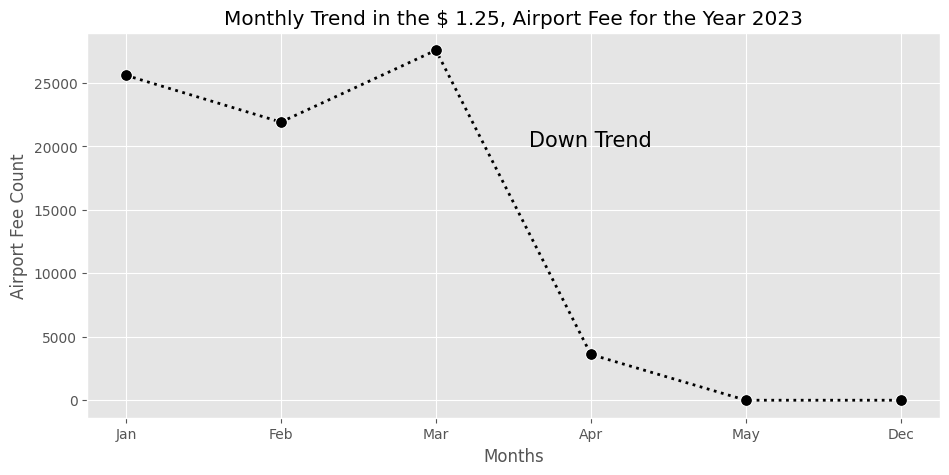

In [91]:
# Plotting the monthly trend where Airport Fee is USD 1.25

plt.figure (figsize= (11,5))
sns.lineplot (
            data= subset_airport_fee_1_25 , 
            x= "PickUp Month", y= "Airport Fee", 
            marker= 'o', ls = ":", markersize=8.5, lw = 2, color = "black"
)
plt.title ("Monthly Trend in the $ 1.25, Airport Fee for the Year 2023")
plt.xlabel ("Months")
plt.ylabel ("Airport Fee Count")
plt.text(2.6, 20000, "Down Trend", fontsize=15)
plt.show ()


In [92]:
# Creating a subset of our data for investigating trips where airport fee is USD 1.75
subset_airport_fee_1_75 = df_positive [df_positive["Airport Fee"] == 1.75][["PickupDateTime", "Airport Fee"]].copy()

# Extracting the month out of the Pickup Date Time column.
subset_airport_fee_1_75 ["PickUp Month"] = subset_airport_fee_1_75 ["PickupDateTime"].dt.month

# Grouping by month to identify the occurence of USD 1.75 in a particular month.
subset_airport_fee_1_75 = pd.DataFrame (subset_airport_fee_1_75.groupby(["PickUp Month"])[ "Airport Fee"].count())
subset_airport_fee_1_75.reset_index (inplace=True)

# Mapping the names of the month to the respective month for readability.
month_map = {1: "Jan", 2: "Feb", 3 : "Mar" , 4 : "Apr", 5 : "May", 6 : "June" , 7 : "July" , 8 : "Aug", 9 : "Sept" , 10 : "Oct" , 11 : "Nov", 12 : "Dec"}
subset_airport_fee_1_75["PickUp Month"] = subset_airport_fee_1_75["PickUp Month"].map (month_map)


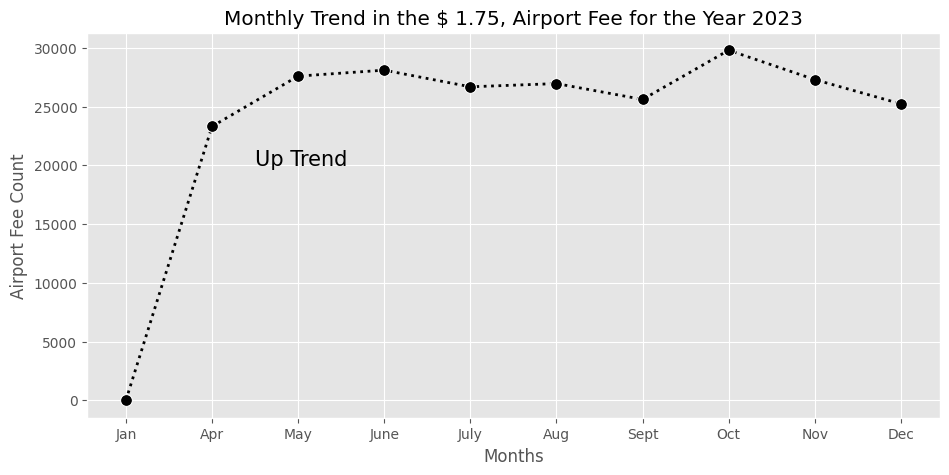

In [93]:
# Plotting the monthly trend where Airport Fee is USD 1.75

plt.figure (figsize= (11,5))
sns.lineplot (
            data= subset_airport_fee_1_75 , 
            x= "PickUp Month", y= "Airport Fee", 
            marker= 'o', ls = ":", markersize=8.5, lw = 2, color = "black"
)
plt.title ("Monthly Trend in the $ 1.75, Airport Fee for the Year 2023")
plt.xlabel ("Months")
plt.ylabel ("Airport Fee Count")
plt.text(1.5, 20000, "Up Trend", fontsize=15)
plt.show ()


*Airport Access Fee - Taxi: $1.25 for pick up only at LaGuardia and John F. Kennedy Airports as per our data dictionary.*

*Note : Based on our above findings we will be going against our data dictionary, since our findings indicates policy changes in the month of April. USD 1.75 is likely the new airport fee starting from the month of April as per our findings. USD 1.25 would be the Airport Fee from January 2023 to March 2023.*

*We will be focusing on PickUp Locations to deal with missing value. Pick up only at LaGuardia and John F. Kennedy Airports.*

In [94]:
# Analyzing percentage distribution of Pickup location ID where the Airport Fee is USD 1.75

df_positive[df_positive["Airport Fee"] == 1.75]["PULocationID"].value_counts(normalize= True) * 100


PULocationID
132    55.821522
138    39.856187
70      3.802735
264     0.303005
129     0.022445
         ...    
112     0.000416
147     0.000416
189     0.000416
91      0.000416
51      0.000416
Name: proportion, Length: 106, dtype: float64

In [95]:
# Checking the column names in our merge df.

merged_df.columns


Index(['RateCodeID-EndofTrip', 'TollAmount', 'CongestionSurcharge',
       'Airport Fee', 'PickUpZone', 'PickUpLocationID', 'PickUpBorough',
       'DropZone', 'DropLocationID', 'DropBorough'],
      dtype='object')

In [96]:
# Conditional filtering to get PickUp Zones that contain the word "Airport"

merged_df[merged_df ["PickUpZone"].str.contains("airport",case=False)]["PickUpZone"].unique()


array(['JFK Airport', 'LaGuardia Airport', 'Newark Airport'], dtype=object)

*Pickups at Newark Airport -- No airport access fee mentioned.*

In [97]:
# Pick up only at LaGuardia and John F. Kennedy Airports.

merged_df[merged_df ["PickUpZone"].isin(['JFK Airport','LaGuardia Airport'])]["PickUpZone"].value_counts()


PickUpZone
JFK Airport          185056
LaGuardia Airport    125463
Name: count, dtype: int64

In [98]:
# Finding the Pickup Location ID corresponding to LaGuardia and John F. Kennedy Airports.

merged_df[merged_df ["PickUpZone"].isin(['JFK Airport','LaGuardia Airport'])]["PickUpLocationID"].value_counts()


PickUpLocationID
132    185056
138    125463
Name: count, dtype: int64

In [99]:
# Making a month column, in our original dataframe.
df_positive ["PickUp Month"] = df_positive ["PickupDateTime"].dt.month

# Mapping the month name as per our dictionary created earlier.
df_positive["PickUp Month"] = df_positive["PickUp Month"].map (month_map)


In [100]:
# Getting the exact month name.
df_positive["PickUp Month"].unique()


array(['Jan', 'Dec', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug',
       'Sept', 'Oct', 'Nov'], dtype=object)

In [101]:
print (f"Before replacing airport fee, with the most accurate representation : {df_positive["Airport Fee"].isna().sum()}")


Before replacing airport fee, with the most accurate representation : 130732


In [102]:
# As per our plots, there is a strong indication of policy changes that happened in the year 2023 in month of April. (Imputing missing Values)

    # hence we will be imputing with USD 1.25 before the month of April as per our data dictionary. (January to March - Inclusive)
    # hence we will be imputing with USD 1.75 from the month of April as per our discovery. (April to December - Inclusive)

df_positive.loc[(df_positive ["PULocationID"].isin([132,138])) & 
                (df_positive["Airport Fee"].isna()) & 
                (df_positive["PickUp Month"].isin(["Jan", "Feb", "Mar"])) ,"Airport Fee"] = 1.25

df_positive.loc[(df_positive ["PULocationID"].isin([132,138])) & 
                (df_positive["Airport Fee"].isna()) & 
                (~df_positive["PickUp Month"].isin(["Jan", "Feb", "Mar"])) ,"Airport Fee"] = 1.75

df_positive.drop (columns= "PickUp Month", inplace=True)


In [103]:
print (f"After replacing airport fee, with the most accurate representation : {df_positive["Airport Fee"].isna().sum()}")


After replacing airport fee, with the most accurate representation : 129688


*Handling remaining values of Airport Fee.*

In [104]:
# Analyzing the percentage distribution of values after imputing.

df_positive["Airport Fee"].value_counts(normalize=True) * 100


Airport Fee
0.00    91.110441
1.75     6.701122
1.25     2.188409
1.00     0.000028
Name: proportion, dtype: float64

In [105]:
# Finding the most frequently occuring value in the Airport Fee column.
freq_airport = df_positive["Airport Fee"].mode()[0]
print (f"The most frequent occuring Airport Fee is ${freq_airport:.2f}, This could be because the pickup point wasn't at LaGuardia and John F. Kennedy Airports.")

# Performing mode imputation for Airport Fee column.
df_positive["Airport Fee"] = df_positive["Airport Fee"].fillna(freq_airport)


The most frequent occuring Airport Fee is $0.00, This could be because the pickup point wasn't at LaGuardia and John F. Kennedy Airports.


In [106]:
print (f"After taking care of the missing values in Airport Fee : {df_positive["Airport Fee"].isna().sum()}")
print ()
print (f"After taking care of all the missing values : {df_positive.isna().sum().sum()} Missing Values are present in the data.")
print ()
print (f"Our data is now ready for further analysis.")


After taking care of the missing values in Airport Fee : 0

After taking care of all the missing values : 0 Missing Values are present in the data.

Our data is now ready for further analysis.


---

### **2.3** Handling Outliers (Detailed Outlier Analysis)
***Note :*** *I have more freedom and flexibility to deal with outlier's since I selected a larger sample i.e. 10% of our data. So, i could focus on data quality.*

In [107]:
# Let's fix the data types.
df_positive.dtypes


VendorID                         int64
PickupDateTime          datetime64[us]
DropoffDateTime         datetime64[us]
PassengerCount                 float64
TripDistance                   float64
RateCodeID-EndofTrip           float64
PULocationID                     int64
DOLocationID                     int64
PaymentType                      int64
FareAmount                     float64
Miscellaneous/Extras           float64
TaxOnMeter                     float64
TipAmount                      float64
TollAmount                     float64
ImprovementSurcharge           float64
TotalAmount                    float64
CongestionSurcharge            float64
Airport Fee                    float64
dtype: object

In [108]:
# Changing the data types.

df_positive[["RateCodeID-EndofTrip","PassengerCount"]] = df_positive[["RateCodeID-EndofTrip","PassengerCount"]].astype("int64")


In [109]:
# Lets confirm the datatypes (after making changes)

df_positive[["RateCodeID-EndofTrip","PassengerCount"]].dtypes


RateCodeID-EndofTrip    int64
PassengerCount          int64
dtype: object

In [110]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

round(df_positive.describe(),2)


VendorID              PickupDateTime             DropoffDateTime  \
count  3733219.00                     3733219                     3733219   
mean         1.74  2023-07-02 23:46:19.094724  2023-07-03 00:03:48.262502   
min          1.00         2001-01-01 00:06:49         2001-01-01 15:42:11   
25%          1.00         2023-04-02 18:27:12  2023-04-02 18:45:08.500000   
50%          2.00         2023-06-27 19:48:58         2023-06-27 20:03:43   
75%          2.00  2023-10-06 23:28:08.500000  2023-10-06 23:45:57.500000   
max          6.00         2024-01-01 00:01:34         2024-01-01 20:50:55   
std          0.44                         NaN                         NaN   

       PassengerCount  TripDistance  RateCodeID-EndofTrip  PULocationID  \
count      3733219.00    3733219.00            3733219.00    3733219.00   
mean             1.38          3.97                  1.07        165.25   
min              1.00          0.00                  1.00          1.00   
25%              1.00          1.05                  1.00        132.00   
50%              1.00          1.80                  1.00        162.00   
75%              1.00          3.41                  1.00        234.00   
max              9.00     191944.96                  6.00        265.00   
std              0.87        199.32                  0.39         64.01   

       DOLocationID  PaymentType  FareAmount  Miscellaneous/Extras  \
count    3733219.00   3733219.00  3733219.00            3733219.00   
mean         164.00         1.16       19.94                  1.56   
min            1.00         0.00        0.00                  0.00   
25%          114.00         1.00        9.30                  0.00   
50%          162.00         1.00       13.50                  1.00   
75%          234.00         1.00       22.41                  2.50   
max          265.00         4.00   143163.45                 20.80   
std           69.82         0.51       76.31                  1.82   

       TaxOnMeter   TipAmount  TollAmount  ImprovementSurcharge  TotalAmount  \
count  3733219.00  3733219.00   3733219.0            3733219.00   3733219.00   
mean         0.50        3.56         0.6                  1.00        29.02   
min          0.00        0.00         0.0                  0.00         0.00   
25%          0.50        1.00         0.0                  1.00        15.96   
50%          0.50        2.85         0.0                  1.00        21.10   
75%          0.50        4.45         0.0                  1.00        31.00   
max          4.00      480.50       143.0                  1.00    143167.45   
std          0.05        4.08         2.2                  0.03        77.54   

       CongestionSurcharge  Airport Fee  
count           3733219.00   3733219.00  
mean                  2.31         0.14  
min                   0.00         0.00  
25%                   2.50         0.00  
50%                   2.50         0.00  
75%                   2.50         0.00  
max                   2.75         1.75  
std                   0.66         0.46

---

#### **Outlier 1:** Passenger Counts Above 7

Trips with more than 7 passengers were identified as rare outliers and isolated, as such cases are uncommon in standard yellow taxi operations. These records were separated from the main dataset for review, rather than included in the core analysis.


In [111]:
# Will removing this data affect my analysis?

df_positive [df_positive ["PassengerCount"] > 6]["PassengerCount"].value_counts().sort_index()


PassengerCount
7    12
8    21
9     9
Name: count, dtype: int64

In [112]:
# remove passenger_count > 6
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Instead of just omitting it from my analysis, ill be adding these to my anomalies dataframe.

df_abnormality = pd.concat([df_abnormality, df_positive[df_positive["PassengerCount"] > 6]],axis=0).copy()

print (f"The number of rows before cleaning the dataframe of high passenger count : {df_positive.shape[0]:,}")
print ()
print (f"The number of rows that need to be dropped because a yellow taxi cannot fit in more than 6 people : {df_positive[df_positive ["PassengerCount"] > 6].shape[0]}")

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Omitting passenger count greater than 6 from my dataframe which im using for analysis.

df_positive = df_positive[(df_positive ["PassengerCount"] > 0) & (df_positive ["PassengerCount"] <= 6)].copy()
print ()
print (f"The number of rows after cleaning the dataframe of high passenger count : {df_positive.shape[0]:,}")
df_abnormality.reset_index(inplace=True, drop=True)


The number of rows before cleaning the dataframe of high passenger count : 3,733,219

The number of rows that need to be dropped because a yellow taxi cannot fit in more than 6 people : 42

The number of rows after cleaning the dataframe of high passenger count : 3,733,177


In [113]:
# Continue with outlier handling

def outlier_prediction (df,column):
    """
    This function will be used to provide a data frame with the outliers, for further analysis.

    Args:
        df (pd.DataFrame) : Takes the input as a DataFrame.
        columns : Takes the name of a single column as a string. 

    Returns:
        pd.DataFrame : A dataframe with outliers for further analysis.
    """
    
    df = df.copy()
    
    IQR = df [column].quantile(0.75) - df [column].quantile(0.25)
        
    lower_bound = df [column].quantile(0.25) - 1.5 * IQR
    upper_bound = df [column].quantile(0.75) + 1.5 * IQR

    return df [(df [column] < lower_bound) | (df [column] > upper_bound)]
    

---

#### **Outlier 2:** VendorID Anomaly

The `VendorID` column was evaluated for rare values. VendorID **6** appeared as an outlier, representing only **0.02% of the dataset (884 records)**. These entries were treated as anomalies and moved to the anomalies dataset for further inspection.


In [114]:
# Let's analyze the counts.

df_positive ['VendorID'].value_counts()


VendorID
2    2776172
1     956121
6        884
Name: count, dtype: int64

In [115]:
# Let's analyze the percentage of these counts.

df_positive ['VendorID'].value_counts(normalize=True) * 100


VendorID
2    74.364864
1    25.611456
6     0.023680
Name: proportion, dtype: float64

In [116]:
# Dealing with the outlier in VendorID -- Column. The Data Dictionary - tells us that 6 is an outlier since it isn't present.
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Maintaining the "Vendor ID = 6" Trips, in my df_abnormality dataframe.

df_abnormality = pd.concat ([df_abnormality,df_positive [df_positive['VendorID'] == 6]],axis=0).copy()
print (f"Before dealing with outliers in the VendorID -- Column : Number of rows :{df_positive.shape[0]:,}")
print ()

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Omitting "Vendor ID = 6" from my dataframe which im using for analysis.

df_positive = df_positive [~df_positive['VendorID'].isin([6])].copy()
print (f"After dealing with outliers in the VendorID -- Column : Number of rows :{df_positive.shape[0]:,}")
df_abnormality.reset_index(inplace=True, drop=True)


Before dealing with outliers in the VendorID -- Column : Number of rows :3,733,177

After dealing with outliers in the VendorID -- Column : Number of rows :3,732,293


---

#### **Outlier 3:** PaymentType Anomalies

The `PaymentType` column was checked against valid categories defined in the data dictionary. Values not included in the official list were identified and imputed as **5 (Unknown)** to maintain consistency with the dataset’s coding standards.


In [117]:
# Let's analyze the value count of the payment type column.

df_positive ["PaymentType"].value_counts()


PaymentType
1    2938059
2     620831
0     129848
4      26986
3      16569
Name: count, dtype: int64

In [118]:
# Analyzing the value count of payment type which isn't present in our data dictionary.

df_positive [~df_positive ["PaymentType"].isin([1,2,3,4,5,6])]["PaymentType"].value_counts()


PaymentType
0    129848
Name: count, dtype: int64

In [119]:
# As per the available information in our data dictionary, 5 represents unknown.
# We will be changing the value which isn't present in our data dictionary to unknown.

df_positive.loc[df_positive ["PaymentType"] == 0, "PaymentType"] = 5


In [120]:
# Analyzing the percentage distribution of values after making the changes. Sanity-Check.

df_positive["PaymentType"].value_counts(normalize= True) * 100


PaymentType
1    78.719945
2    16.634037
5     3.479041
4     0.723041
3     0.443936
Name: proportion, dtype: float64

---

#### **Outlier 4:** Airport Fee Anomalies

Outliers detected in the `Airport Fee` column were addressed using strategic imputation to ensure consistent fee values across the dataset.


In [121]:
# Let's analyze the value count combination of Pickup Zone and Pickup Location ID.
# We will be specifically looking at LaGuardia and John F. Kennedy Airports where the Airport Fee applies.

merged_df[merged_df ["PickUpZone"].isin(['JFK Airport','LaGuardia Airport'])][["PickUpZone","PickUpLocationID"]].value_counts()


PickUpZone         PickUpLocationID
JFK Airport        132                 185056
LaGuardia Airport  138                 125463
Name: count, dtype: int64

In [122]:
# Based on our earlier analysis we discovered both 1.25USD and 1.75USD Valid Airport Fee
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

total_number_airport_pickups = df_positive [df_positive ["PULocationID"].isin([132,138])]["PULocationID"].value_counts().sum()
valid_airport_fees = df_positive [
                                    ((df_positive ["Airport Fee"] == 1.25) | (df_positive ["Airport Fee"] == 1.75))
                                    & (df_positive ["PULocationID"].isin([132,138]))]["PULocationID"].shape[0]

print (f"The total number of pickup's made from LaGuardia and John F. Kennedy Airports : {total_number_airport_pickups:,} Pickups.")
print (f"The total number of rows with a valid airport fees : {valid_airport_fees:,} Rows.")


The total number of pickup's made from LaGuardia and John F. Kennedy Airports : 320,104 Pickups.
The total number of rows with a valid airport fees : 305,526 Rows.


In [123]:
# We should keep in mind that changing the aiport fees to what we consider to be the right amount, could create an outlier in the total amount column.
# We will be using a strategic business driven approach (Jan to Mar USD 1.25) (Apr to Dec USD 1.75)
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# January to March -- Imputing to a more accurate representation -- USD 1.25
df_positive.loc [(df_positive ["PickupDateTime"].dt.month <= 3) & (df_positive ["PULocationID"].isin([132,138])), "Airport Fee"] = 1.25

# April to December -- Imputing to a more accurate representation -- USD 1.75
df_positive.loc [(df_positive ["PickupDateTime"].dt.month >= 4) & (df_positive ["PULocationID"].isin([132,138])), "Airport Fee"] = 1.75

# Imputing to USD 0.00 where the Pickup din't happen in LaGuardia and John F. Kennedy Airports.
df_positive.loc [~df_positive ["PULocationID"].isin([132,138]), "Airport Fee"] = 0.00

# Checking the Valid Airport Fee Trips after our imputation.
valid_airport_fees = df_positive [
                                    ((df_positive ["Airport Fee"] == 1.25) | (df_positive ["Airport Fee"] == 1.75)) 
                                    & (df_positive ["PULocationID"].isin([132,138]))]["PULocationID"].shape[0]

print (f"The total number of rows with a valid airport fees after handling potential outliers : {valid_airport_fees:,} Rows.")


The total number of rows with a valid airport fees after handling potential outliers : 320,104 Rows.


---

#### **Outlier 5:** TripDistance Anomalies

The `TripDistance` column was examined for invalid and extreme values. Trips with a distance of **0** or greater than **250 miles** were treated as anomalies and moved to the anomalies dataset. The primary dataset was limited to trips within the valid range (0 < distance < 250) to maintain realistic travel records.


In [124]:
# Just to make sure our index hasn't been jumbled.

df_positive.reset_index (inplace=True, drop=True)


In [125]:
print (f"How many trips have negative trip distance : {df_positive [df_positive ["TripDistance"] < 0].shape[0]} Trips.")


How many trips have negative trip distance : 0 Trips.


In [126]:
# Creating atemporary trip distance outlier data frame with the function defined earlier.

trip_distance_outlier_df = outlier_prediction (df_positive,'TripDistance')


In [127]:
# Lets see some of the outliers in descending order to get an idea what exactly are we dealing with.

trip_distance_outlier_df['TripDistance'].value_counts(normalize=True).sort_index(ascending=False)


TripDistance
191944.96    0.000002
186514.09    0.000002
159551.69    0.000002
126360.46    0.000002
87795.06     0.000002
               ...   
7.00         0.003612
6.99         0.000886
6.98         0.000843
6.97         0.000971
6.96         0.000932
Name: proportion, Length: 4105, dtype: float64

In [128]:
# Number of potential outliers predicted by our outlier prediction function based on IQR Method.

number_of_trip_distance_potential_outliers = trip_distance_outlier_df['TripDistance'].shape[0]
print (f"The number of outlier predicted by the IQR technique in the TripDistance column : {number_of_trip_distance_potential_outliers:,}")
print (f"The percentage of trip distance outliers : {number_of_trip_distance_potential_outliers/df_positive.shape[0] * 100:.2f} %")


The number of outlier predicted by the IQR technique in the TripDistance column : 492,275
The percentage of trip distance outliers : 13.19 %


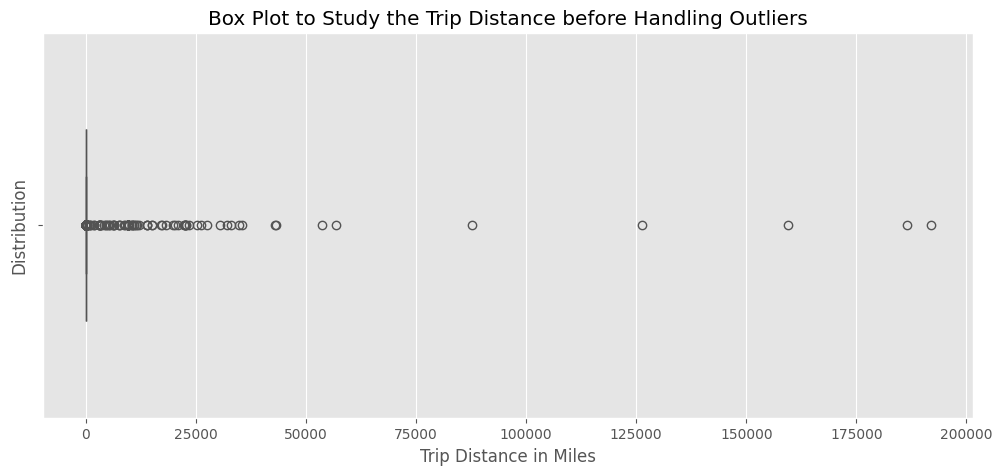

In [129]:
# Let's get a visual representation of our outliers.

plt.figure (figsize= (12,5))
sns.boxplot (data = df_positive, x = 'TripDistance', width= 0.5)
plt.title ("Box Plot to Study the Trip Distance before Handling Outliers")
plt.xlabel ("Trip Distance in Miles")
plt.ylabel ("Distribution")
plt.show()


In [130]:
# Checking for correlations before treating the outluiers, if anything affects the trip distance.

trip_dist_corr_before = df_positive.corr()["TripDistance"].round(4)


In [131]:
# Entries where TripDistance is more than 250 miles or TripDistance is zero.
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Creating a Boolean Mask for Trip Distances which are Zero or Above 250 or Equal to 250.
distance_zero_and_above_250_mask = (df_positive ["TripDistance"] == 0) | (df_positive ["TripDistance"] >= 250)

print (f"The number of entries with a distance of zero miles and above 250 miles: {df_positive[distance_zero_and_above_250_mask].shape[0]:,} ")

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Adding the potential outliers / misleading trips where trip distances are Zero or Above 250 to my df_abnormality.
df_abnormality = pd.concat ([df_abnormality,df_positive[distance_zero_and_above_250_mask]]).copy()

# Resetting the index
df_abnormality.reset_index(inplace=True, drop=True)

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Overwriting my original data frame with only Trips with Trip Distances greater than Zero and Less than 250.
df_positive = df_positive[~((df_positive ["TripDistance"] == 0) | (df_positive ["TripDistance"] >= 250))]

distance_zero_and_above_250_mask = (df_positive ["TripDistance"] == 0) | (df_positive ["TripDistance"] > 250)

print (f"The number of entries with a distance of zero miles and above 250 miles after treating them as potential outliers: {df_positive[distance_zero_and_above_250_mask].shape[0]:,}")


The number of entries with a distance of zero miles and above 250 miles: 73,204 
The number of entries with a distance of zero miles and above 250 miles after treating them as potential outliers: 0


In [132]:
# Checking for correlations after removing the potential outleirs, if anything affects the trip distance.

trip_dist_corr_after =df_positive.corr()["TripDistance"].round(4)


In [133]:
# Correlation before handling the outliers in Trip Distance column vs after handling the outliers in Trip Distance column.

for i in trip_dist_corr_after.index:
    if trip_dist_corr_before[i] != trip_dist_corr_after[i]:
        print (f"{i} : Before treating for outliers : {trip_dist_corr_before[i]} | After treating for outliers {trip_dist_corr_after[i]}")
        print ()

print ("Thus, we can say that Outlier treatment had a significant effect on the TripDistance column. By removing extreme values, the correlations between TripDistance and other trip features became much stronger and more interpretable.")


VendorID : Before treating for outliers : 0.0022 | After treating for outliers 0.0295

PickupDateTime : Before treating for outliers : -0.0003 | After treating for outliers 0.0019

DropoffDateTime : Before treating for outliers : -0.0003 | After treating for outliers 0.0019

PassengerCount : Before treating for outliers : -0.0002 | After treating for outliers 0.036

RateCodeID-EndofTrip : Before treating for outliers : 0.0102 | After treating for outliers 0.5555

PULocationID : Before treating for outliers : -0.0028 | After treating for outliers -0.1358

DOLocationID : Before treating for outliers : -0.0027 | After treating for outliers -0.1017

PaymentType : Before treating for outliers : 0.0095 | After treating for outliers 0.0272

FareAmount : Before treating for outliers : 0.0053 | After treating for outliers 0.2196

Miscellaneous/Extras : Before treating for outliers : 0.0022 | After treating for outliers 0.173

TaxOnMeter : Before treating for outliers : -0.0033 | After treating 

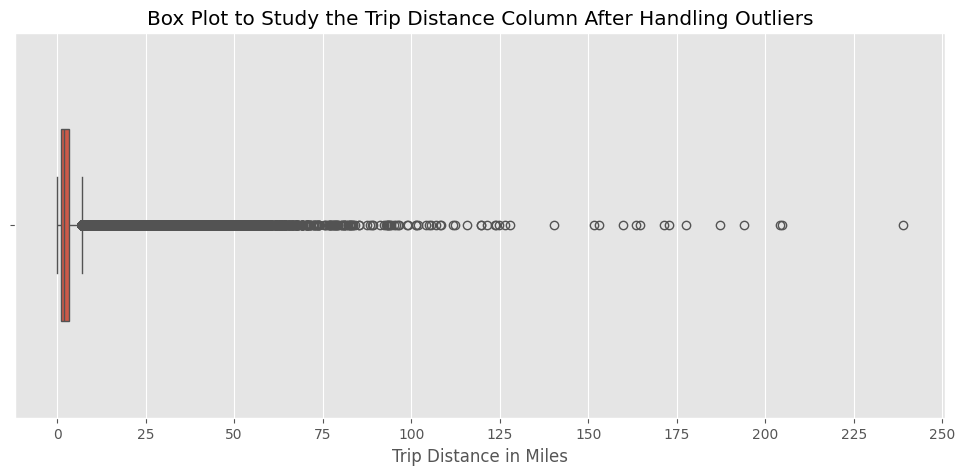

In [134]:
# Let's get a visual representation of our Trip Distance Column after handling outliers.

plt.figure (figsize= (12,5))
sns.boxplot (data = df_positive, x = 'TripDistance', width= 0.5)
plt.title ("Box Plot to Study the Trip Distance Column After Handling Outliers")
plt.xlabel ("Trip Distance in Miles")
plt.xticks (range(0,275,25))
plt.show()


In [135]:
# Checking if the Fare Amount is valid for trips with higher trip distances.
# Based on domain knowledge Higher Trip Distance results in Higher Fare and Higher Total Amount.
# So, We will conclude this as Rare Cases.

df_positive[df_positive ["TripDistance"] >= 150]


VendorID      PickupDateTime     DropoffDateTime  PassengerCount  \
168473          1 2023-01-19 00:20:12 2023-01-19 03:38:58               1   
182513          2 2023-01-20 11:56:36 2023-01-20 15:04:22               1   
475989          2 2023-02-18 08:32:48 2023-02-18 11:22:42               1   
562127          1 2023-02-26 18:37:48 2023-02-26 22:43:31               1   
1108749         2 2023-04-19 17:31:09 2023-04-19 21:16:11               2   
2233632         2 2023-08-06 16:31:50 2023-08-06 19:36:05               3   
2340602         2 2023-08-18 15:28:08 2023-08-18 20:15:05               1   
2460403         2 2023-09-01 15:34:44 2023-09-01 19:05:57               1   
2717215         2 2023-09-29 15:01:15 2023-09-29 19:21:24               1   
2830602         2 2023-10-10 10:26:05 2023-10-10 15:35:57               2   
3074398         2 2023-10-31 18:28:53 2023-10-31 21:04:33               1   
3375569         2 2023-11-28 17:52:49 2023-11-28 20:55:30               1   
3613530         2 2023-12-18 10:52:49 2023-12-18 13:40:43               1   

         TripDistance  RateCodeID-EndofTrip  PULocationID  DOLocationID  \
168473         204.10                     5            70           265   
182513         159.85                     5           138           265   
475989         153.03                     5           231           264   
562127         193.90                     5           265           265   
1108749        151.59                     5           100           265   
2233632        171.50                     5           132           265   
2340602        204.86                     4           132           265   
2460403        163.52                     5           132           265   
2717215        172.71                     5            10           265   
2830602        164.66                     1           169           265   
3074398        238.80                     4           132           265   
3375569        177.68                     1            74           265   
3613530        187.35                     5           246           265   

         PaymentType  FareAmount  Miscellaneous/Extras  TaxOnMeter  TipAmount  \
168473             2      600.00                   0.0         0.0       0.00   
182513             2      300.00                   5.0         0.0       0.00   
475989             1      400.00                   0.0         0.5       0.80   
562127             1      700.00                   0.0         0.0     175.25   
1108749            1      300.00                   0.0         0.0       0.00   
2233632            2      600.00                   0.0         0.0       0.00   
2340602            2     1375.00                   0.0         0.5       0.00   
2460403            2      500.00                   0.0         0.0       0.00   
2717215            1      437.00                   0.0         0.0       0.00   
2830602            2      596.60                   0.0         0.0       0.00   
3074398            2      769.50                   2.5         0.0       0.00   
3375569            5      472.28                   0.0         0.0       0.00   
3613530            1      180.00                   0.0         0.0       0.15   

         TollAmount  ImprovementSurcharge  TotalAmount  CongestionSurcharge  \
168473         6.55                   1.0       607.55                  0.0   
182513         6.55                   1.0       313.80                  0.0   
475989         0.00                   1.0       404.80                  2.5   
562127         0.00                   1.0       876.25                  0.0   
1108749       16.10                   1.0       319.60                  2.5   
2233632       10.94                   1.0       613.69                  0.0   
2340602       56.94                   1.0      1435.19                  0.0   
2460403       13.94                   1.0       516.69                  0.0   
2717215        8.60              

---

#### **Outlier 6:** Pickup & Drop-off Location ID Anomalies

The `PULocationID` and `DOLocationID` fields were validated against the official NYC Taxi Zone shapefile. Location IDs not present in the zone reference file were considered invalid and moved to the anomalies dataset for further review.


In [136]:
# Let's find the valid location ids from the shape file, we loaded earlier.

valid_location_id = df_zones ["LocationID"].unique().tolist()

print (f"The number of rows before spotting making any changes : {df_positive.shape[0]:,} Rows.")
print ()
print (f"As per the shape file provided, Location IDs other than the ones in the shapefile is being flagged as an outlier.")
print ()


The number of rows before spotting making any changes : 3,659,089 Rows.

As per the shape file provided, Location IDs other than the ones in the shapefile is being flagged as an outlier.



In [137]:
# Let's find the invalid location ids, i.e Pickup and Drop Location Ids which are not present in NYC Taxi Zone shape file provided to us.

list_of_invalid_location_ids = list()

# To check if the location id is not in the shape file, it will append to the list of invalid location ids.

for locationid in set (df_positive ["PULocationID"].unique().tolist()).union (set (df_positive ["DOLocationID"].unique().tolist())):
    if locationid not in valid_location_id:
        list_of_invalid_location_ids.append (locationid)

print (f"List of invalid Location IDs: {list_of_invalid_location_ids}")


List of invalid Location IDs: [57, 105, 264, 265]


In [138]:
# Creating a boolean mask of trips with invalid location ids.

invalid_location_mask = (df_positive["PULocationID"].isin(list_of_invalid_location_ids)) | (df_positive["DOLocationID"].isin(list_of_invalid_location_ids))

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Adding trips with invalid location id to our "df_abnormality"

df_abnormality = pd.concat([df_abnormality, df_positive [invalid_location_mask]]).copy()

print (f"The number of rows to be treated for Invalid Location ID : {df_positive [invalid_location_mask].shape[0]:,} Rows.")
print (f"The number of rows before being treated for Invalid Location ID : {df_positive.shape[0]:,} Rows.")

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Omitting trips with invalid location ids from our original dataframe by overwriting it.

df_positive = df_positive [(~df_positive["PULocationID"].isin(list_of_invalid_location_ids)) & (~df_positive["DOLocationID"].isin(list_of_invalid_location_ids))]
print (f"The number of rows after being treated for Invalid Location ID : {df_positive.shape[0]:,} Rows.")


The number of rows to be treated for Invalid Location ID : 54,227 Rows.
The number of rows before being treated for Invalid Location ID : 3,659,089 Rows.
The number of rows after being treated for Invalid Location ID : 3,604,862 Rows.


In [139]:
# Resetting index of both our DataFrames

df_positive.reset_index (inplace=True, drop=True)
df_abnormality.reset_index (inplace=True, drop=True)


---

#### **Outlier 7:** Pickup & Drop-off DateTime Anomalies

The `PickupDateTime` and `DropoffDateTime` fields were checked to confirm that trips correspond to the 2023 dataset period. Records where the pickup year was not 2023 were treated as anomalies and moved to the anomalies dataset. 

Trips with a pickup in late 2023 and a drop-off in early January 2024 (valid cross-year rides) were retained.


In [140]:
# Lets us first fix the pickup year. We are dealing only in 2023 data.
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Where the Pickup Year is not 2023 we will be adding it to our "df_abnormality"

df_abnormality = pd.concat ([df_abnormality, df_positive[(df_positive ["PickupDateTime"].dt.year != 2023)]], axis=0).copy()

rows_outside_2023 = df_positive[(df_positive ["PickupDateTime"].dt.year != 2023)].shape[0]
print (f"The number of rows that need to be dropped because they do not belong to the year 2023 : {rows_outside_2023}")
print (f"The number of rows before cleaning the dataframe : {df_positive.shape[0]:,}")
print ()
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# We will overwrite our working data frame, with trips where the pickup year is 2023.

df_positive = df_positive[(df_positive ["PickupDateTime"].dt.year == 2023)].copy()
print (f"""We will avoid dropping data where the Pickup was in the year 2023 and drop happened on 1st Jan 2024. 
The number of rows in the Year 2023 after cleaning the dataframe : {df_positive.shape[0]:,}""")


The number of rows that need to be dropped because they do not belong to the year 2023 : 8
The number of rows before cleaning the dataframe : 3,604,862

We will avoid dropping data where the Pickup was in the year 2023 and drop happened on 1st Jan 2024. 
The number of rows in the Year 2023 after cleaning the dataframe : 3,604,854


In [141]:
# Derived Metric -- Time Difference

df_positive ["Time Difference"] = df_positive ["DropoffDateTime"] - df_positive ["PickupDateTime"]


In [142]:
# Treating for Time Difference --- Trip Duration greater than 1 day
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Creating a temporary data frame and concatenating it to our "df_abnormality"
time_outlier_df = df_positive [df_positive ["Time Difference"].dt.days >= 1]
df_abnormality = pd.concat([df_abnormality, time_outlier_df]).copy()

print (f"The number of rows to be treated for Time Difference : {time_outlier_df.shape[0]:,} Rows.")
print (f"The number of rows before being treated for Time Difference : {df_positive.shape[0]:,} Rows.")

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Overwriting our Data Frame to include trips
df_positive = df_positive [df_positive ["Time Difference"].dt.days < 1]
print (f"The number of rows after being treated for Time Difference : {df_positive.shape[0]:,} Rows.")


The number of rows to be treated for Time Difference : 14 Rows.
The number of rows before being treated for Time Difference : 3,604,854 Rows.
The number of rows after being treated for Time Difference : 3,604,840 Rows.


In [143]:
# Note : An outlier was detected at a later stage in our analysis and was dealt with accordingly at that time.

In [144]:
# Dropping the columns, will add it while working with it.

df_positive.drop (columns = "Time Difference", inplace=True)
df_abnormality.drop (columns = "Time Difference", inplace=True)


In [145]:
# Resetting the index.

df_positive.reset_index (inplace=True, drop=True)
df_abnormality.reset_index (inplace=True, drop=True)


---

#### **Outlier 8:** Tax On Meter Anomalies

The `TaxOnMeter` field was verified against the standard NYC TLC rule, which specifies a fixed **USD 0.50 MTA tax**. Trips where the tax value did not match the expected amount were flagged and moved to the anomalies dataset, while valid entries with a USD 0.50 tax were retained.


In [146]:
# Outlier Prediction -- Value Count -- Unusual Amounts

outlier_prediction (df_positive,"TaxOnMeter")["TaxOnMeter"].value_counts()


TaxOnMeter
0.00    18013
0.80       83
0.05       23
4.00        4
0.30        1
3.50        1
Name: count, dtype: int64

In [147]:
# Normal Value Count --- Cross Verify 

df_positive ['TaxOnMeter'].value_counts()


TaxOnMeter
0.50    3586715
0.00      18013
0.80         83
0.05         23
4.00          4
0.30          1
3.50          1
Name: count, dtype: int64

In [148]:
# As per our Data Dictionary : $0.50 MTA tax that is automatically triggered based on the metered rate in use.
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Creating a boolean mask for Trips where the Meter Tax Amoun wasn't triggered i.e. $0.50
tax_on_meter_mask = df_positive ['TaxOnMeter'] != 0.5

# Concatenating it to our anomalies data frame.
df_abnormality = pd.concat ([df_abnormality, df_positive [tax_on_meter_mask]]).copy()

print (f"The number of rows that do not match the metered rate in use specified in our Data Dictionary : {df_positive [tax_on_meter_mask].shape[0]:,}")
print (f"The number of rows before filtering out TaxOnMeter Potential Outliers : {df_positive.shape[0]:,}")

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Keeping trips where the Tax on Meter was triggered correctly i.e. USD 0.50
df_positive = df_positive [df_positive ['TaxOnMeter'] == 0.5].copy()

df_positive.reset_index (inplace= True, drop=True)
df_abnormality.reset_index (inplace= True, drop=True)

print (f"The number of rows after filtering out TaxOnMeter Potential Outliers : {df_positive.shape[0]:,}")


The number of rows that do not match the metered rate in use specified in our Data Dictionary : 18,125
The number of rows before filtering out TaxOnMeter Potential Outliers : 3,604,840
The number of rows after filtering out TaxOnMeter Potential Outliers : 3,586,715


---

#### **Outlier 9:** Improvement Surcharge Anomalies

The `improvement_surcharge` field was examined, and entries with a value of **$0.00** were found to be invalid based on NYC TLC fare rules. These records were isolated as anomalies and removed from the main dataset.


In [149]:
# Let's perform a value count.

df_positive ["ImprovementSurcharge"].value_counts()


ImprovementSurcharge
1.0    3585218
0.3       1473
0.0         24
Name: count, dtype: int64

In [150]:
# Let's perform a percentage distribution value count.

df_positive ["ImprovementSurcharge"].value_counts(normalize=True) * 100


ImprovementSurcharge
1.0    99.958263
0.3     0.041068
0.0     0.000669
Name: proportion, dtype: float64

In [151]:
# Dealing with Trips with Improvement Surcharge of USD 0.00.
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Creating a boolean mask
improvement_surcharge_mask = df_positive ["ImprovementSurcharge"] == 0

# Adding the Trips with Improvement Surcharge of USD 0.00 to our anomalies dataframe.
df_abnormality = pd.concat ([df_abnormality, df_positive [improvement_surcharge_mask]]).copy()

print (f"The number of rows that need to be dropped because $0.00 improvement surcharge is invalid : {df_positive [improvement_surcharge_mask].shape[0]:,}")
print (f"The number of rows before filtering out ImprovementSurcharge Potential Outliers : {df_positive.shape[0]:,}")

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Overwriting our original data frame to have trips where the improvement surcharge wasn't USD 0.00
df_positive = df_positive [df_positive ["ImprovementSurcharge"] != 0].copy()
df_positive.reset_index (inplace= True, drop=True)
df_abnormality.reset_index (inplace= True, drop=True)

print (f"The number of rows after filtering out ImprovementSurcharge Potential Outliers : {df_positive.shape[0]:,}")


The number of rows that need to be dropped because $0.00 improvement surcharge is invalid : 24
The number of rows before filtering out ImprovementSurcharge Potential Outliers : 3,586,715
The number of rows after filtering out ImprovementSurcharge Potential Outliers : 3,586,691


In [152]:
# Let's analyze if we can find that the improvement surcharge, surged after a particular date.

df_positive["Pickup Month"] = df_positive['PickupDateTime'].dt.month

# Group by month and surcharge values
round (df_positive.groupby(["Pickup Month"])["ImprovementSurcharge"].value_counts(normalize = True) * 100,2).sort_index()


Pickup Month  ImprovementSurcharge
1             0.3                      0.14
              1.0                     99.86
2             0.3                      0.09
              1.0                     99.91
3             0.3                      0.06
              1.0                     99.94
4             0.3                      0.05
              1.0                     99.95
5             0.3                      0.04
              1.0                     99.96
6             0.3                      0.03
              1.0                     99.97
7             0.3                      0.02
              1.0                     99.98
8             0.3                      0.02
              1.0                     99.98
9             0.3                      0.01
              1.0                     99.99
10            0.3                      0.02
              1.0                     99.98
11            0.3                      0.01
              1.0                     99.

In [153]:
# Creating a temporary dataset where the surcharge is 0.3$ to further analyze it.

subset_improvement_surcharge = df_positive [df_positive ["ImprovementSurcharge"] == 0.3][["Pickup Month", "ImprovementSurcharge"]].copy()
subset_improvement_surcharge


Pickup Month  ImprovementSurcharge
328                 1                   0.3
878                 1                   0.3
1427                1                   0.3
1579                1                   0.3
1705                1                   0.3
...               ...                   ...
3543530            12                   0.3
3545325            12                   0.3
3558693            12                   0.3
3559211            12                   0.3
3564553            12                   0.3

[1473 rows x 2 columns]

In [154]:
# Grouping by month for visualization and better interpretation.

subset_improvement_surcharge_df = pd.DataFrame (subset_improvement_surcharge.groupby(["Pickup Month"])["ImprovementSurcharge"].count())

# Resetting the index.
subset_improvement_surcharge_df.reset_index (inplace=True)

# Sorting the values to see the drop in the occurence of USD 0.3 Improvement Surcharge.
subset_improvement_surcharge_df.head().sort_values("ImprovementSurcharge",ascending=False)


Pickup Month  ImprovementSurcharge
0             1                   417
1             2                   247
2             3                   177
3             4                   152
4             5                   130

In [155]:
# Mapping the months.

month_map = {1: "Jan", 2: "Feb", 3 : "Mar" , 4 : "Apr", 5 : "May", 6 : "June" , 7 : "July" , 8 : "Aug", 9 : "Sept" , 10 : "Oct" , 11 : "Nov", 12 : "Dec"}

subset_improvement_surcharge_df["Pickup Month"] = subset_improvement_surcharge_df["Pickup Month"].map (month_map)


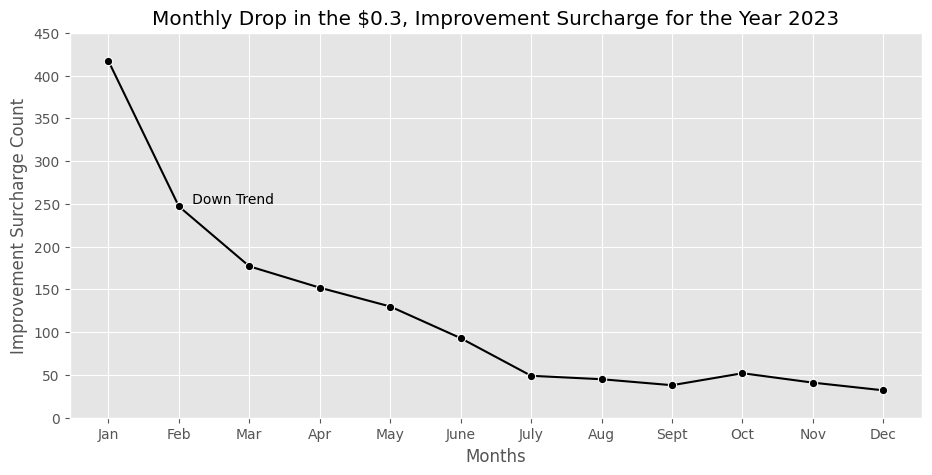

In [156]:
# Line chart to visualize the down trend of the 0.3$ surcharge amount.
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
plt.figure (figsize= (11,5))
sns.lineplot (data= subset_improvement_surcharge_df , x= "Pickup Month", y= "ImprovementSurcharge", marker= "o", color = "black")
plt.title ("Monthly Drop in the $0.3, Improvement Surcharge for the Year 2023")
plt.xlabel ("Months")
plt.xticks (range(0, 12, 1))
plt.ylabel ("Improvement Surcharge Count")
plt.text(1, 250, '   Down Trend')
plt.ylim ((0,450))
plt.show ()


---

#### **Outlier 10:** Miscellaneous / Extras Anomalies

The `extras` (miscellaneous charges) column was evaluated based on taxi fare domain rules. Since legitimate extra charges occur in increments of **$0.25**, values not following this pattern were identified as invalid and moved to the anomalies dataset.


In [157]:
# Let's analyze the value count in the miscellaneous section.

df_positive ["Miscellaneous/Extras"].value_counts(normalize=True) * 100


Miscellaneous/Extras
0.00     39.557687
2.50     24.606636
1.00     19.787291
5.00      6.992044
3.50      5.547899
7.50      0.856444
6.00      0.850617
9.25      0.333260
4.25      0.330723
1.75      0.150640
3.75      0.133494
6.75      0.122453
8.75      0.110966
2.75      0.108540
10.25     0.090222
7.75      0.075167
11.75     0.067137
1.25      0.064293
2.25      0.041152
6.25      0.040176
9.75      0.029331
10.00     0.028215
7.25      0.025260
11.25     0.021719
8.50      0.019043
3.20      0.002454
3.00      0.001701
5.25      0.001199
0.50      0.001032
4.50      0.000446
3.25      0.000335
4.75      0.000307
2.45      0.000279
0.75      0.000279
3.05      0.000223
0.70      0.000167
2.72      0.000167
14.25     0.000139
12.50     0.000084
7.00      0.000056
0.03      0.000056
6.80      0.000056
9.30      0.000056
8.20      0.000056
2.00      0.000056
0.25      0.000056
1.05      0.000056
0.02      0.000028
0.04      0.000028
0.19      0.000028
0.01      0.000028
5.30      

In [158]:
# On the basis of domain knowledge, anything that isn't a multiplier of 0.25$ can be considered an outlier.
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Checking the value count where our condition isn't met.
extras_outlier_count = df_positive [df_positive ["Miscellaneous/Extras"] % 0.25 != 0 ]["Miscellaneous/Extras"].value_counts().sum()
print (f"The number of rows / trips that do not follow our condition : {extras_outlier_count:,}")

# Adding it to our anomalies dataframe.
df_abnormality = pd.concat ([df_abnormality, df_positive [df_positive ["Miscellaneous/Extras"] % 0.25 != 0 ]]).copy()

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Overwriting our original data frame on the basis of domain knowledge.
df_positive = df_positive [df_positive["Miscellaneous/Extras"] % 0.25 == 0 ].copy()

# Resetting the index
df_positive.reset_index (inplace=True, drop=True)
df_abnormality.reset_index (inplace=True, drop=True)


The number of rows / trips that do not follow our condition : 137


---

#### **Outlier 11:** Tip Amount Anomalies

The `tip_amount` column was evaluated to ensure tip values aligned with reasonable rider behavior. Tips greater than the fare amount were considered unrealistic and flagged. A 0.99 percentile threshold was applied, and records exceeding this threshold and the flagged records were isolated in the anomalies dataset.


In [159]:
# Statistical Summary.

df_positive ["TipAmount"].describe().round(2)


count    3586554.00
mean           3.51
std            3.78
min            0.00
25%            1.00
50%            2.88
75%            4.42
max          480.50
Name: TipAmount, dtype: float64

In [160]:
# Tip amount shouldn't be greater than fare amount, although it can be. But this would be misleading for us.
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Creating a mask where the tip amount is greater than fare amount.
tip_amount_mask = df_positive ["TipAmount"] > df_positive ["FareAmount"]
print (f"The number of rows where tip amount is greater than fare amount : {df_positive[tip_amount_mask].shape[0]:,}")

# Adding the trips where the tip amount is greater than fare amount to our anomalies dataframe.
df_abnormality = pd.concat ([df_abnormality, df_positive[tip_amount_mask]]).copy()
print (f"The number of rows we had before handling the outlier {df_positive.shape[0]:,}")

# -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Overwriting our original data frame and keeping only those trips where the fare amount is greater than the tip amount.
df_positive = df_positive [df_positive ["TipAmount"] < df_positive ["FareAmount"]].copy()
print (f"The number of rows we have after handling the outlier {df_positive.shape[0]:,}")


The number of rows where tip amount is greater than fare amount : 3,695
The number of rows we had before handling the outlier 3,586,554
The number of rows we have after handling the outlier 3,582,572


In [161]:
# Satistical Summary after handling outliers.

df_positive ["TipAmount"].describe().round(2)


count    3582572.00
mean           3.50
std            3.65
min            0.00
25%            1.00
50%            2.86
75%            4.42
max           80.00
Name: TipAmount, dtype: float64

In [162]:
# Let's look at the occurence.

outlier_prediction (df_positive, "TipAmount")["TipAmount"].value_counts().sort_index(ascending=False)


TipAmount
80.00      1
79.20      1
71.60      1
66.93      1
66.66      1
        ... 
9.60     498
9.59     199
9.58     358
9.57     265
9.56      69
Name: count, Length: 2002, dtype: int64

In [163]:
# There were still quite a few unusually high tip amounts with very less occurence.
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Setting a threshold
threshold = df_positive ["TipAmount"].quantile(0.99)
print (f"We will be using the 99th percentile as a threshold which is : USD {threshold:.2f}")
print ()
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Creating a boolean mask
tip_amount_mask = df_positive ["TipAmount"] >= threshold

print (f"The number of rows where Tip Amount doesn't meet our condition : {df_positive[tip_amount_mask].shape[0]:,}")

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Adding amounts which were above our threshold to our anomalies data frame

df_abnormality = pd.concat ([df_abnormality, df_positive[tip_amount_mask]]).copy()
print (f"The number of rows we had before handling the outlier {df_positive.shape[0]:,}")
print ()
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Overwriting our original dataframe to include only those trips which were below our threshold.

df_positive = df_positive [df_positive ["TipAmount"] < threshold].copy()
print (f"The number of rows we have after handling the outlier {df_positive.shape[0]:,}")

# Resetting the index for both our dataframes.
df_positive.reset_index (inplace=True, drop=True)
df_abnormality.reset_index (inplace=True, drop=True)


We will be using the 99th percentile as a threshold which is : USD 16.79

The number of rows where Tip Amount doesn't meet our condition : 35,852
The number of rows we had before handling the outlier 3,582,572

The number of rows we have after handling the outlier 3,546,720


---

#### **Outlier 12:** Toll Amount Anomalies

Unrealistic or invalid toll values were identified and isolated in the anomalies dataset.


In [164]:
# Let's analyze the value count.

df_positive ["TollAmount"].value_counts()


TollAmount
0.00     3297282
6.55      144536
6.94       97763
3.00        1248
11.55        603
          ...   
6.66           1
34.00          1
14.85          1
52.00          1
19.00          1
Name: count, Length: 345, dtype: int64

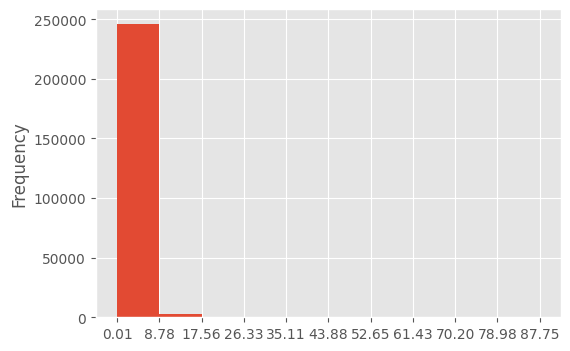

In [165]:
# Creating bins for plotting.
count, bin_edges = np.histogram (df_positive[df_positive ["TollAmount"] > 0]["TollAmount"])

# Plotting toll amount feature distribution.
df_positive[df_positive ["TollAmount"] > 0]["TollAmount"].plot(kind="hist", xticks=bin_edges, figsize= (6,4))
plt.show()


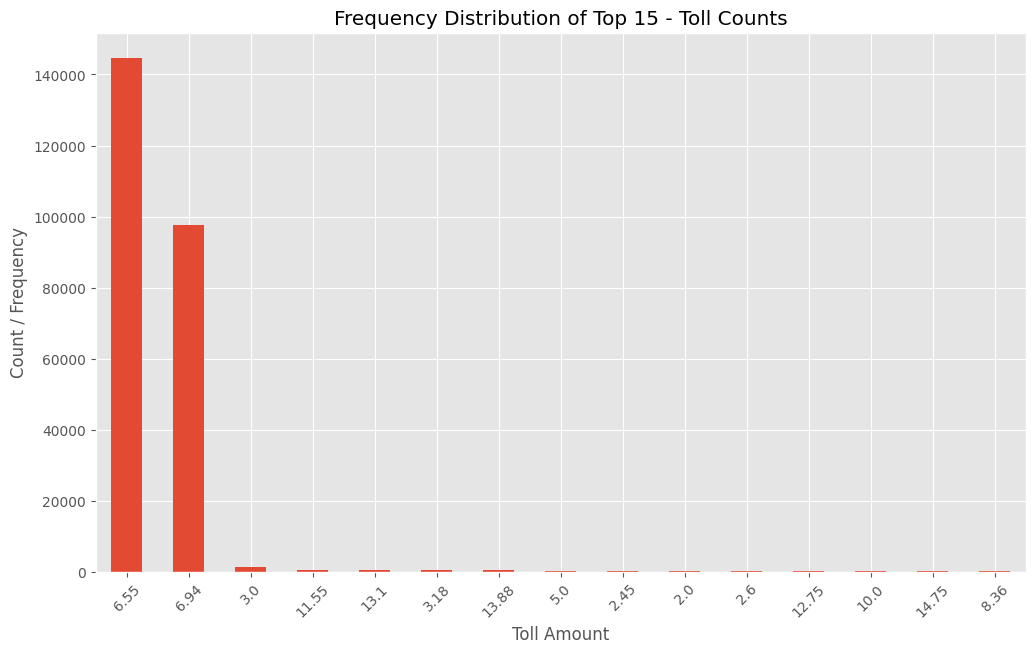

In [166]:
# Frequency Distribution chart for top 15
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Top 15 Toll Count for better insights.
toll_count = df_positive[df_positive['TollAmount'] > 0]['TollAmount'].value_counts().head(15)
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Plotting the Top 15 toll amount feature distribution.
toll_count.plot(kind='bar', figsize=(12, 7))

plt.xlabel('Toll Amount') # add to x-label to the plot
plt.ylabel('Count / Frequency') # add y-label to the plot
plt.title('Frequency Distribution of Top 15 - Toll Counts') # add title to the plot
plt.xticks(rotation=45)
plt.show()


In [167]:
# Let's use the 99th percentile rule.
threshold_toll = df_positive ["TollAmount"].quantile(0.99)
print (f"99% of our data lies below the toll amount : {threshold_toll}")


99% of our data lies below the toll amount : 6.94


In [168]:
# Let's map the occurence of the toll amount and derive a new column toll frequency.

toll_frequency = df_positive ["TollAmount"].value_counts()
df_positive ["toll_frequency"] = df_positive ["TollAmount"].map(toll_frequency)


In [169]:
# Toll frequency less than 50, suggests a very low occurence and could suggest data entry issues.
toll_mask = df_positive ["toll_frequency"] <= 50
print (f"The number of rows that do not meet our expectations : {df_positive [toll_mask].shape[0]:,}")

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Adding those trips where the toll frequency is less than or equal to 50 to our anomalies data frame.

df_abnormality = pd.concat ([df_abnormality, df_positive[toll_mask]]).copy()
print (f"The number of rows we had before handling the potential outliers / misleading information {df_positive.shape[0]:,} Rows")
print ()
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Keeping only those trips where the toll freqency is above 50 in our analysis dataframe.

df_positive = df_positive [df_positive ["toll_frequency"] > 50].copy()
print (f"The number of rows we have after handling the outlier / misleading information {df_positive.shape[0]:,} Rows")

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Resetting the index
df_positive.reset_index (inplace=True, drop=True)
df_abnormality.reset_index (inplace=True, drop=True)

# Dropping the derived column.
df_positive.drop (columns= "toll_frequency", inplace= True)
df_abnormality.drop (columns= "toll_frequency", inplace= True)


The number of rows that do not meet our expectations : 1,499
The number of rows we had before handling the potential outliers / misleading information 3,546,720 Rows

The number of rows we have after handling the outlier / misleading information 3,545,221 Rows


---

#### **Outlier 13:** Fare Amount Anomalies

The `fare_amount` field was examined for unrealistic values. Trips with fares below **USD 2.50** or above **USD 150** were considered as outliers. Only fares within the range **USD 2.50 – USD 150** were retained, and all other records were isolated in the anomalies dataset for further review.


In [170]:
# Let's try to identify outliers from statistical analysis.

df_positive.FareAmount.describe().round(2)


count    3545221.00
mean          18.66
std           77.51
min            0.01
25%            9.30
50%           13.50
75%           21.20
max       143163.45
Name: FareAmount, dtype: float64

In [171]:
# Checking for clue, to get an idea of our data. Statistical Analysis.

quantiles_for_fareamount = df[df['FareAmount'] >= 2.5]['FareAmount'].quantile([0.75, 0.85 , 0.95, 0.99, 0.999])
print(quantiles_for_fareamount)


0.750     21.9
0.850     31.7
0.950     70.0
0.990     77.6
0.999    150.0
Name: FareAmount, dtype: float64


In [172]:
# Finding the number of entries where fee is less than 2.50$
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
count_of_fareamount = df_positive[df_positive.FareAmount < 2.5]["FareAmount"].value_counts().sum()
print (f"The number of entries where Fare Amount is less than $2.5 is {count_of_fareamount} Entries.")

count_of_fareamount = df_positive[df_positive.FareAmount > 150]["FareAmount"].value_counts().sum()
print (f"The number of entries where Fare Amount is greater than $150 is {count_of_fareamount} Entries.")


The number of entries where Fare Amount is less than $2.5 is 437 Entries.
The number of entries where Fare Amount is greater than $150 is 58 Entries.


In [173]:
# I decide to keep only those trips which had a fare amount greater than USD 2.5 and less than USD 150.
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Creating a mask that checks if the Fare Amount is less than USD 2.50 OR greater than USD 150.

fare_amount_mask = (df_positive ["FareAmount"] < 2.5) | (df_positive ["FareAmount"] > 150)
print (f"The number of rows that do not meet our expectations : {df_positive [fare_amount_mask].shape[0]:,}")

# Adding the trips where the Fare Amount is less than USD 2.50 OR greater than USD 150 to our anomalies dataframe.
df_abnormality = pd.concat ([df_abnormality, df_positive [fare_amount_mask]]).copy()
print (f"The number of rows we had before handling the potential outliers / misleading information {df_positive.shape[0]:,} Rows")
print ()
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Keeping only those trips where the fare amount is equal to or greater than 2.5 USD and less than or equal to 150 USD.
df_positive = df_positive [(df_positive ["FareAmount"] >= 2.5) & (df_positive ["FareAmount"] <= 150)].copy()
print (f"The number of rows we have after handling the outlier / misleading information {df_positive.shape[0]:,} Rows")

# Resetting the index.
df_positive.reset_index (inplace=True, drop=True)
df_abnormality.reset_index (inplace=True, drop=True)


The number of rows that do not meet our expectations : 495
The number of rows we had before handling the potential outliers / misleading information 3,545,221 Rows

The number of rows we have after handling the outlier / misleading information 3,544,726 Rows


---

#### **Outlier 14:** Total Amount Adjustments

The `total_amount` field was recalculated to reflect corrections made to individual fare components. Since adjustments to multiple monetary fields impacted the overall fare, the original `total_amount` values were replaced with a recomputed version to ensure accuracy and consistency across the dataset.


In [174]:
# Derived a new column Total Amount which would be more accurate than our previous one.
# There were some imputations we performed in airport fee column which could affect the total amount column.

df_positive ["Total_Amount"] = df_positive ["FareAmount"] + df_positive ["Miscellaneous/Extras"] + df_positive ["TaxOnMeter"] + df_positive ["TipAmount"] + df_positive ["TollAmount"] + df_positive ["ImprovementSurcharge"] + df_positive ["CongestionSurcharge"] + df_positive ["Airport Fee"]

# Dropping the old column.
df_positive.drop (columns= "TotalAmount", inplace= True)


In [175]:
# Do any columns need standardising?

In [176]:
# Dropping the columns, which I don't need at the moment.

df_positive.drop (columns = "Pickup Month" , inplace=True)
df_abnormality.drop (columns = "Pickup Month" , inplace=True)


In [177]:
# Checking the data type.

df_positive.dtypes

VendorID                         int64
PickupDateTime          datetime64[us]
DropoffDateTime         datetime64[us]
PassengerCount                   int64
TripDistance                   float64
RateCodeID-EndofTrip             int64
PULocationID                     int64
DOLocationID                     int64
PaymentType                      int64
FareAmount                     float64
Miscellaneous/Extras           float64
TaxOnMeter                     float64
TipAmount                      float64
TollAmount                     float64
ImprovementSurcharge           float64
CongestionSurcharge            float64
Airport Fee                    float64
Total_Amount                   float64
dtype: object

***Creating dictionaries to map to the respective columns for readability.***

In [178]:
# Creating a dictionary to map vendor names.
vendor_names = {
                1: "Creative Mobile Technologies, LLC", 
                2: "VeriFone Inc."
}
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Creating a dictionary to map rate code names.
rate_code_names = {
                1 : "Standard rate",
                2 : "JFK",
                3 : "Newark",
                4 : "Nassau or Westchester",
                5 : "Negotiated Fare",
                6 : "Group Ride"
}
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Creating a dictionary to map payment names.
payment_names = {
                1 : "Credit Card",
                2 : "Cash",
                3 : "No Charge",
                4 : "Dispute",
                5 : "Unknown",
                6 : "Voided Trip"
}

In [179]:
# Mapping the dictionaries to the respective columns for further analysis.
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
df_positive ["RateCodeID-EndofTrip-Name"] = df_positive ["RateCodeID-EndofTrip"].map(rate_code_names)
df_positive ["VendorID-Name"] = df_positive ["VendorID"].map(vendor_names)
df_positive ["PaymentType-Name"] = df_positive ["PaymentType"].map(payment_names)


In [180]:
# Converting columns to list before rearranging them
df_positive.columns.tolist()


['VendorID',
 'PickupDateTime',
 'DropoffDateTime',
 'PassengerCount',
 'TripDistance',
 'RateCodeID-EndofTrip',
 'PULocationID',
 'DOLocationID',
 'PaymentType',
 'FareAmount',
 'Miscellaneous/Extras',
 'TaxOnMeter',
 'TipAmount',
 'TollAmount',
 'ImprovementSurcharge',
 'CongestionSurcharge',
 'Airport Fee',
 'Total_Amount',
 'RateCodeID-EndofTrip-Name',
 'VendorID-Name',
 'PaymentType-Name']

In [181]:
# Reordering columns -- for clearer visibility and interpretation
df_positive = df_positive[["VendorID", "VendorID-Name", "PaymentType", "PaymentType-Name", "RateCodeID-EndofTrip", "RateCodeID-EndofTrip-Name", "PickupDateTime", "DropoffDateTime", "PassengerCount", "TripDistance", "PULocationID", "DOLocationID", "FareAmount", "Miscellaneous/Extras", "TaxOnMeter", "TipAmount", "TollAmount", "ImprovementSurcharge", "CongestionSurcharge", "Airport Fee", "Total_Amount"]].copy() 


In [182]:
# Let's view the first 3 rows, to see our changes.

df_positive.head(3)


VendorID  VendorID-Name  PaymentType PaymentType-Name  \
0         2  VeriFone Inc.            2             Cash   
1         2  VeriFone Inc.            1      Credit Card   
2         2  VeriFone Inc.            1      Credit Card   

   RateCodeID-EndofTrip RateCodeID-EndofTrip-Name      PickupDateTime  \
0                     1             Standard rate 2023-01-01 00:00:08   
1                     1             Standard rate 2023-01-01 00:01:07   
2                     1             Standard rate 2023-01-01 00:01:39   

      DropoffDateTime  PassengerCount  TripDistance  ...  DOLocationID  \
0 2023-01-01 00:11:24               1          3.10  ...           244   
1 2023-01-01 00:22:01               1          3.87  ...            68   
2 2023-01-01 00:20:56               1          4.78  ...           263   

   FareAmount  Miscellaneous/Extras  TaxOnMeter  TipAmount  TollAmount  \
0        16.3                   1.0         0.5       0.00         0.0   
1        21.9                   1.0         0.5       5.38         0.0   
2        23.3                   1.0         0.5       5.66         0.0   

   ImprovementSurcharge  CongestionSurcharge  Airport Fee  Total_Amount  
0                   1.0                  0.0          0.0         18.80  
1                   1.0                  2.5          0.0         32.28  
2                   1.0                  2.5          0.0         33.96  

[3 rows x 21 columns]

---

## **3** Exploratory Data Analysis


In [183]:
# Converting Column Names to a list for viewing
df_positive.columns.tolist()


['VendorID',
 'VendorID-Name',
 'PaymentType',
 'PaymentType-Name',
 'RateCodeID-EndofTrip',
 'RateCodeID-EndofTrip-Name',
 'PickupDateTime',
 'DropoffDateTime',
 'PassengerCount',
 'TripDistance',
 'PULocationID',
 'DOLocationID',
 'FareAmount',
 'Miscellaneous/Extras',
 'TaxOnMeter',
 'TipAmount',
 'TollAmount',
 'ImprovementSurcharge',
 'CongestionSurcharge',
 'Airport Fee',
 'Total_Amount']

---

### **3.1** General EDA: Finding Patterns and Trends

---

#### **3.1.1** Variable Categorization
* `VendorID`: Categorical 
* `tpep_pickup_datetime`: Neither Categorical Nor Numerical. It is Date-Time.
* `tpep_dropoff_datetime`: Neither Categorical Nor Numerical. It is Date-Time.
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical 
* `DOLocationID`: Categorical 
* `payment_type`: Categorical 
* `pickup_hour`: Categorical 
* `trip_duration`: Numerical 


The following monetary parameters were grouped together and treated as numerical variables, as they represent continuous financial values.

* `fare_amount` : Numerical
* `extra` : Numerical
* `mta_tax` : Numerical
* `tip_amount` : Numerical
* `tolls_amount` : Numerical
* `improvement_surcharge` : Numerical
* `total_amount` : Numerical
* `congestion_surcharge` : Numerical
* `airport_fee` : Numerical

---

#### Temporal Analysis

---

#### **3.1.2** Analysis of Taxi Pickup Distribution

The distribution of taxi pickups was analyzed across hours of the day, days of the week, and months to identify temporal ride-demand patterns and peak periods.


In [184]:
# Let's create derived columns for further analysis. For Hour, Day of Week and Month (PickUp).
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
df_positive ["PickUp Hours"] = df_positive ["PickupDateTime"].dt.hour
df_positive ["PickUp Day of Week"] = df_positive ["PickupDateTime"].dt.dayofweek
df_positive ["PickUp Month"] = df_positive ["PickupDateTime"].dt.month


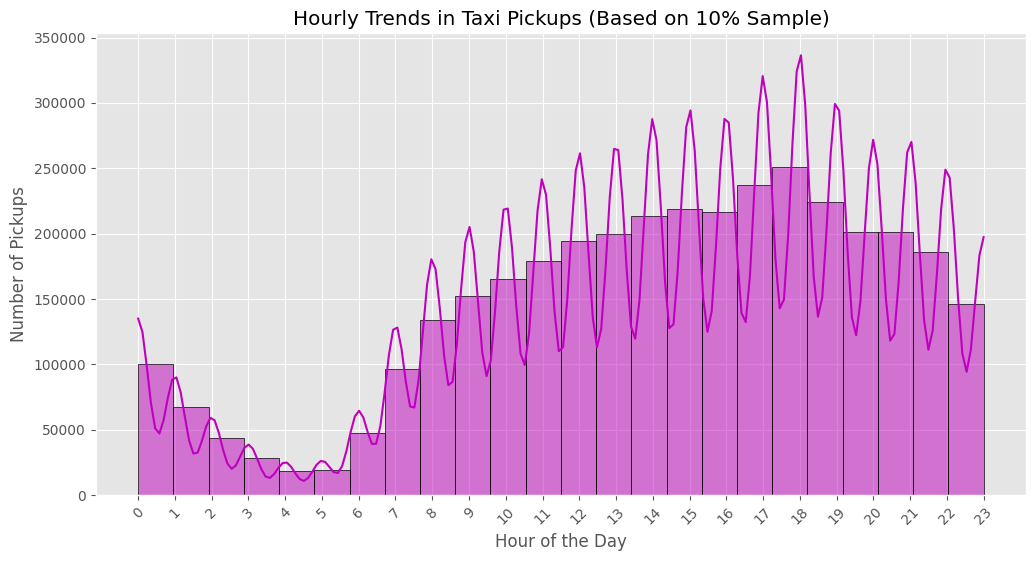

In [185]:
# Plotting a Histogram -- Hourly Pickup Trends in Taxi --- Analyzing Distribution.
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
plt.figure (figsize=(12,6))
sns.histplot(
        data = df_positive,
        x ="PickUp Hours",
        bins = 24,
        color = "m",
        edgecolor = "black",
        kde = True,
)
plt.title ("Hourly Trends in Taxi Pickups (Based on 10% Sample)")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.xticks(np.arange(0,24),rotation=45)
plt.show()


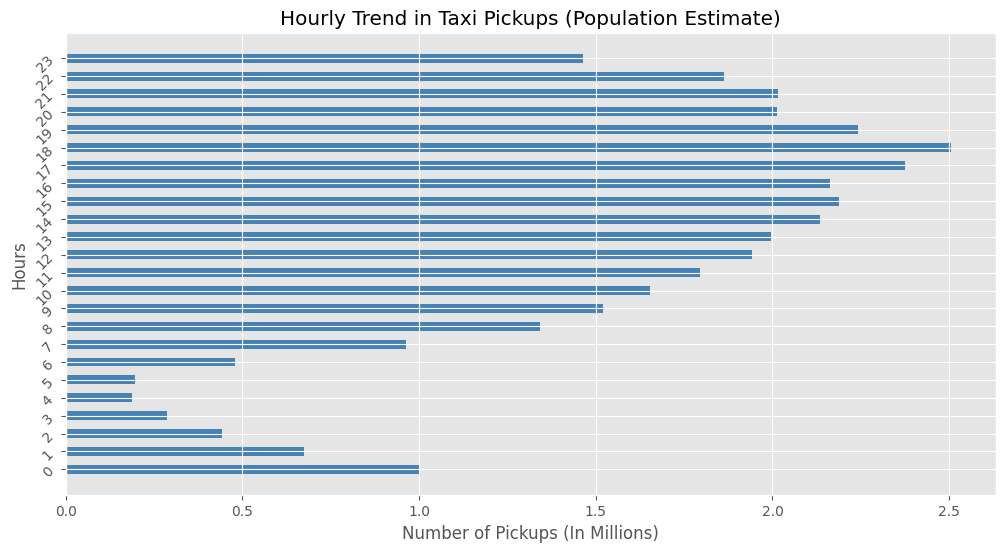

In [186]:
# Find and show the hourly trends in taxi pickups
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Finding the number of trips per hour
hourly_trend_pickups = df_positive.groupby(["PickUp Hours"])["PickUp Hours"].count()

# To get the population count
estimate_population = 1 / 0.10

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Plotting a horizontal bar to show the hourly trends
plt.figure (figsize=(12,6))
plt.barh(
    hourly_trend_pickups.index, 
    (hourly_trend_pickups.values * estimate_population) / 1_000_000,
    height = 0.5,
    zorder = 0,
    color = "steelblue"
)
plt.title ("Hourly Trend in Taxi Pickups (Population Estimate)")
plt.xlabel("Number of Pickups (In Millions)")
plt.ylabel("Hours")
plt.yticks(np.arange(0,24),rotation=45)
plt.show()


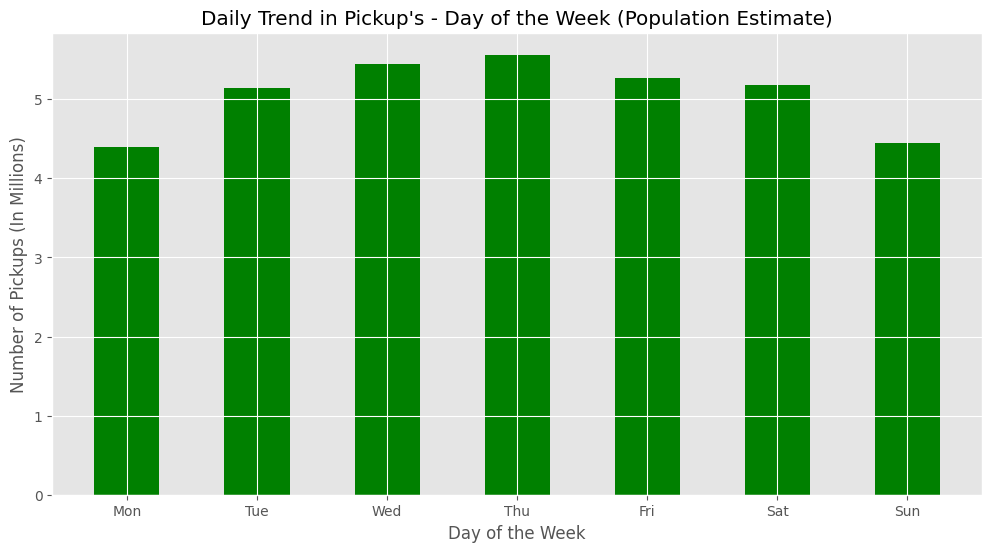

In [187]:
# Find and show the daily trends in taxi pickups (days of the week)
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Grouping by Day of the Week for Visualization Purpose.
daily_trend_pickups = df_positive.groupby(["PickUp Day of Week"])["PickUp Day of Week"].count()

# Setting the index to names for Visualization Purpose.
daily_trend_pickups.index = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

# To get the population count
estimate_population = 1 / 0.10

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Plotting the daily trends

plt.figure (figsize=(12,6))
plt.bar(
    daily_trend_pickups.index, 
    (daily_trend_pickups.values * estimate_population) / 1_000_000,
    color = "green",
    width = 0.5,
    zorder = 0
    )
plt.title ("Daily Trend in Pickup's - Day of the Week (Population Estimate)")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Pickups (In Millions)")
plt.show()


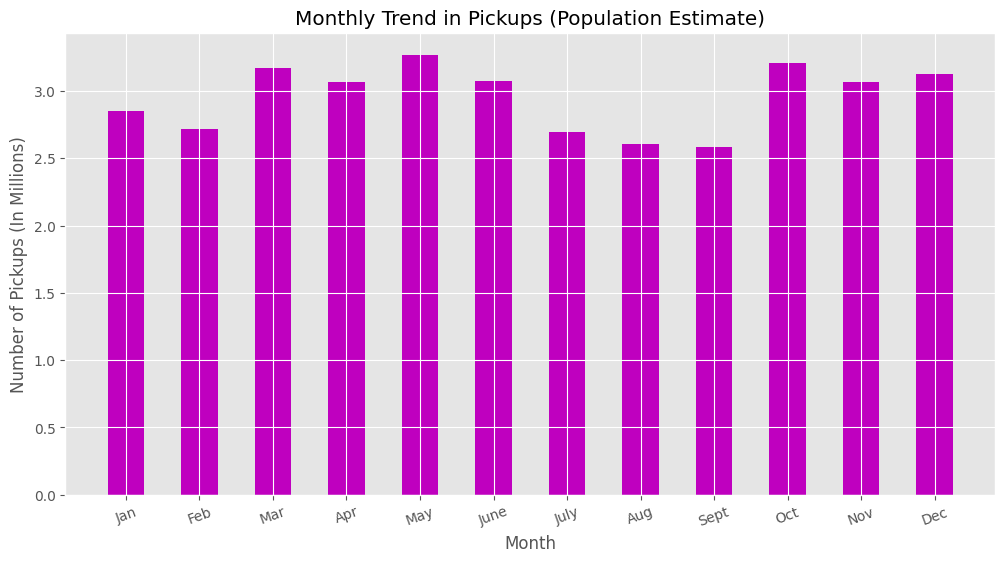

In [188]:
# Show the monthly trends in pickups.
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Grouping by Month to see the Monthly Trends.
monthly_trend_pickups = df_positive.groupby(["PickUp Month"])["PickUp Month"].count()

# Assigning names for the Month for the purpose of Visualization.
monthly_trend_pickups.index = ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]

# To get the population count
estimate_population = 1 / 0.10

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Plotting the monthly trends.

plt.figure (figsize=(12,6))
plt.bar(
    monthly_trend_pickups.index, 
    (monthly_trend_pickups.values * estimate_population) / 1_000_000,
    color = "m",
    width = 0.5,
    zorder = 0
    )
plt.title ("Monthly Trend in Pickups (Population Estimate)")
plt.xlabel("Month")
plt.xticks(rotation = 20)
plt.ylabel("Number of Pickups (In Millions)")
plt.show()


---

#### Temporal Analysis Inferences

- Low Taxi Demand can be observed in early mornings, usually stable throughout the day and peaks during the evening.

- Taxi Demand is seen to follow a clear trend or a pattern we can say based on our temporal analysis.

- Based on the Trends of Day of the Week, Vendors could ensure that drivers are made available during high demand days like Wednesday and Thursday, while adjusting the drivers or cutting down on drivers on the low demand days like Sunday and Monday.

- From the Monthly Patterns based on our analysis, Vendors could plan their resource management on a larger scale by ensuring drivers are available during peak months while managing supply on months which are low is demand. This analysis helps in Resource Management on a Larger Scale.

---

#### Financial Analysis

Financial variables such as `FareAmount`, `TipAmount`, `Total_Amount`, and `TripDistance` were examined for zero or negative values. These checks ensured the validity of monetary and distance fields before further analysis.


In [189]:
# Analyse the above parameters 

# Note : I've already handled this scenario as potential misleading / outliers above. Im using .empty to verify the same.
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
sanity_check =  df_positive [(df_positive ["FareAmount"] <= 0) | (df_positive ["TripDistance"] <= 0) | (df_positive ["Total_Amount"] <= 0) |  (df_positive ["TipAmount"] < 0)].empty

print (f"Let's check if these columns contain zero / negative values. Note: We are using .empty method in pandas. \n\nIt will return True if it does not contain zero/negative values : {sanity_check}")


Let's check if these columns contain zero / negative values. Note: We are using .empty method in pandas. 

It will return True if it does not contain zero/negative values : True


---

#### **3.1.3** Filtering Zero Values

Zero-value records in monetary and distance fields were removed from the primary dataset and stored as anomalies while handling outliers for review.


In [190]:
# Verification : Zero values and negative numbers have already been taken care of.

df_positive [(df_positive ["FareAmount"] <= 0) | (df_positive ["TipAmount"] < 0) | (df_positive ["Total_Amount"] <= 0) | (df_positive ["TripDistance"] <= 0)]


Empty DataFrame
Columns: [VendorID, VendorID-Name, PaymentType, PaymentType-Name, RateCodeID-EndofTrip, RateCodeID-EndofTrip-Name, PickupDateTime, DropoffDateTime, PassengerCount, TripDistance, PULocationID, DOLocationID, FareAmount, Miscellaneous/Extras, TaxOnMeter, TipAmount, TollAmount, ImprovementSurcharge, CongestionSurcharge, Airport Fee, Total_Amount, PickUp Hours, PickUp Day of Week, PickUp Month]
Index: []

[0 rows x 24 columns]

In [191]:
# Create a df with non zero entries for the selected parameters.
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
print ("Details are provided below for reference. I have already taken care of negative amounts and zero distances trips.")
print ()
print ("1. Negative Amounts was taken care in : 2.1.3")
print ()
print ("2. Zero distance trips was taken care in : 2.3 (2.3.1) - Outlier 5")
print ()
print ("3. Fare Amount was taken care in : 2.3 (2.3.1) - Outlier 11")
print ()
print ("4. Tip Amount was taken care in : 2.3 (2.3.1) - Outlier 10")
print ()
print ("5. Total Amount was taken care in : 2.3 (2.3.1) - Outlier 12")


Details are provided below for reference. I have already taken care of negative amounts and zero distances trips.

1. Negative Amounts was taken care in : 2.1.3

2. Zero distance trips was taken care in : 2.3 (2.3.1) - Outlier 5

3. Fare Amount was taken care in : 2.3 (2.3.1) - Outlier 11

4. Tip Amount was taken care in : 2.3 (2.3.1) - Outlier 10

5. Total Amount was taken care in : 2.3 (2.3.1) - Outlier 12


---

#### **3.1.4** Monthly Revenue Analysis

Monthly trends in `Total_Amount` were analyzed to evaluate revenue patterns and identify seasonal fluctuations in taxi earnings.


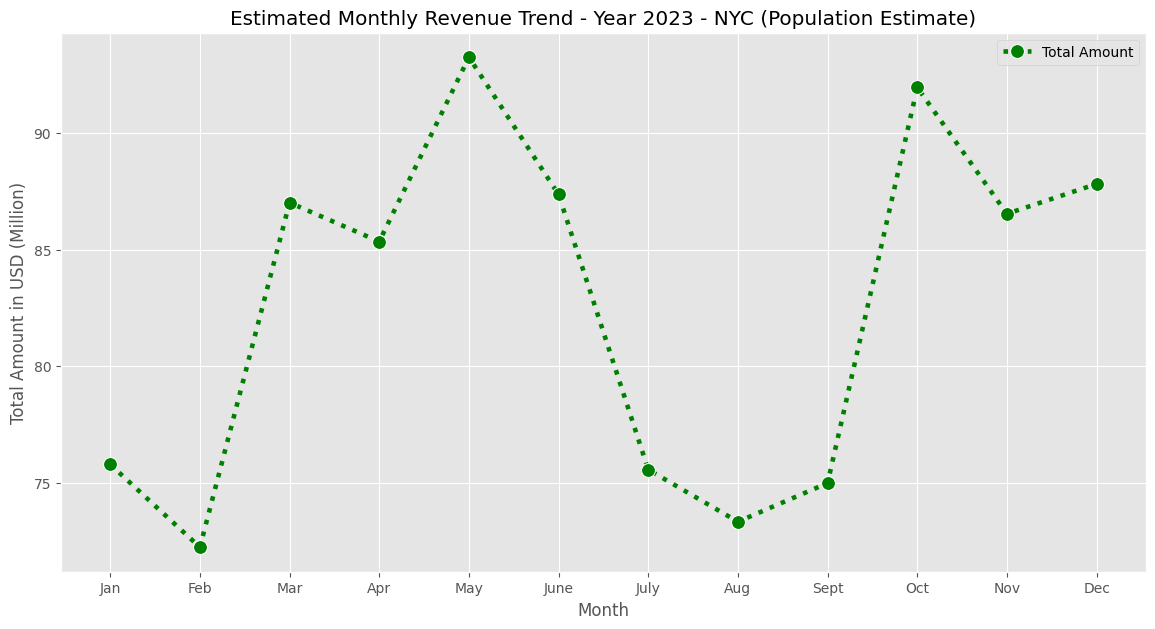

In [192]:
# Group data by month and analyse monthly revenue
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Total Monthly Revenue per month
monthly_revenue = df_positive.groupby(["PickUp Month"])["Total_Amount"].sum()

# Converting to a dataframe and resetting the index
monthly_revenue_df = pd.DataFrame(monthly_revenue)
monthly_revenue_df.reset_index(inplace = True)

# Estimating the Monthly Revenue for the Population
sample_ratio = 1 / 0.1
monthly_revenue_df ["Estimated Total Amount Population (Million)"] = monthly_revenue_df ["Total_Amount"] * sample_ratio / 1_000_000

# Giving the index readable names
monthly_revenue_df.index = ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
plt.figure (figsize=(14,7))
sns.lineplot (
            data=monthly_revenue_df, 
            x = monthly_revenue_df.index, 
            y = monthly_revenue_df ["Estimated Total Amount Population (Million)"],
            marker = "o",
            markersize= 10,
            color='green',
            linestyle="dotted",
            lw = 3.3
)
plt.title ("Estimated Monthly Revenue Trend - Year 2023 - NYC (Population Estimate)")
plt.xlabel ("Month")
plt.ylabel ("Total Amount in USD (Million)")
plt.legend (["Total Amount"])
plt.show()


---

#### **3.1.5** Quarterly Revenue Proportion

The contribution of each quarter to the total annual revenue was calculated to understand seasonal revenue distribution across the year.


In [193]:
df_positive ["PickUp Month"].unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [194]:
# Creating a dictionary with each quarter.
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
quarter_dictionary = {
                     1: "Q1", 2 : "Q1" , 3 : "Q1" , 
                     4 : "Q2", 5 : "Q2", 6 : "Q2", 
                     7 : "Q3", 8 : "Q3", 9 : "Q3", 
                     10 : "Q4", 11 : "Q4", 12 : "Q4"
}
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Mapping the respective quarters

df_positive ["PickUp Quarter"] = df_positive ["PickUp Month"].map(quarter_dictionary)


In [195]:
# Calculate proportion of each quarter
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
quarter_df = df_positive.groupby(["PickUp Quarter"])["Total_Amount"].sum()
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
sample_ratio = 1 / 0.1

for index,indices in enumerate(quarter_df.index):
    print (f"Quarter {index + 1} : {quarter_df[indices] / quarter_df.sum() * 100:.2f}% which is $ {round (quarter_df[indices] * sample_ratio / 1000000, 2)} Million Estimated Population.")
    

Quarter 1 : 23.71% which is $ 235.06 Million Estimated Population.
Quarter 2 : 26.83% which is $ 265.93 Million Estimated Population.
Quarter 3 : 22.59% which is $ 223.92 Million Estimated Population.
Quarter 4 : 26.86% which is $ 266.27 Million Estimated Population.


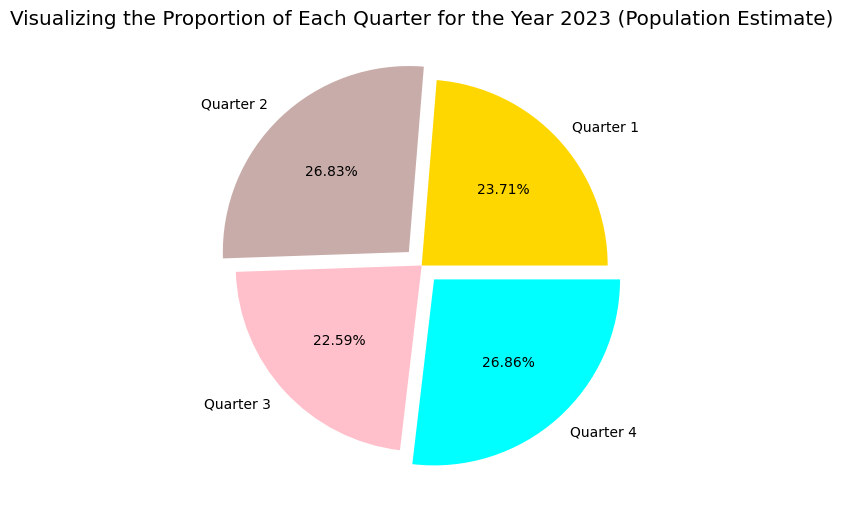

In [196]:
# Plotting a pie chart, to visualize the proportion for each quarter.
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
labels = ["Quarter 1", "Quarter 2", "Quarter 3", "Quarter 4"]
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
plt.figure(figsize = (6,8))
plt.pie (
        quarter_df, 
        labels=labels,
        autopct = '%.2f%%',
        explode =[0,0.1,0,0.1],
        colors = ["gold", "xkcd:pinkish gray","pink", "cyan"]
)
plt.title ("Visualizing the Proportion of Each Quarter for the Year 2023 (Population Estimate)")
plt.show()


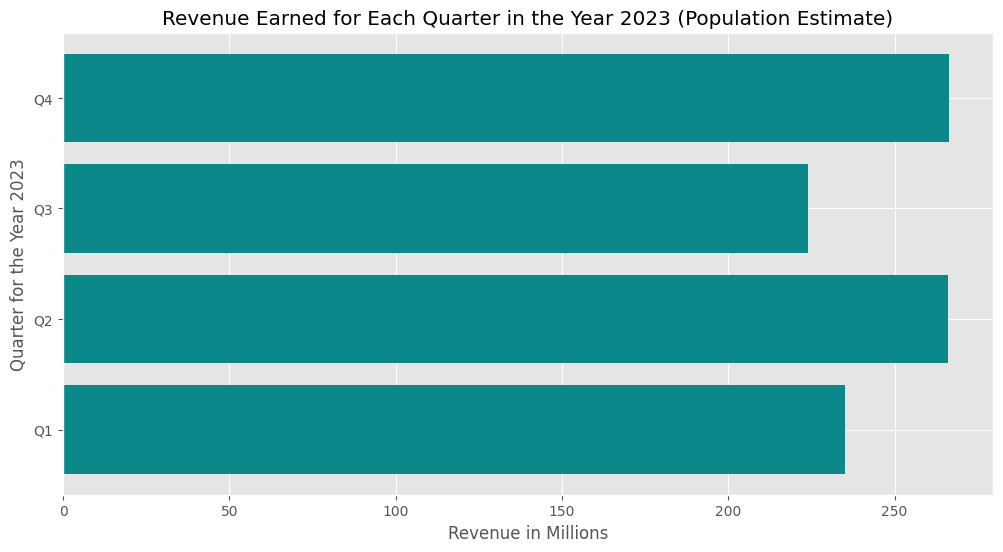

In [197]:
# Plotting a bar chart based on the Population
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
plt.figure (figsize=(12,6))
plt.barh(
    quarter_df.index, 
    (quarter_df.values * sample_ratio) / 1000000,
    color = "xkcd:dark cyan",
    )
plt.title ("Revenue Earned for Each Quarter in the Year 2023 (Population Estimate)")
plt.xlabel("Revenue in Millions")
plt.ylabel("Quarter for the Year 2023")
plt.ticklabel_format(style= "plain", axis='x')
plt.show()


---

#### **3.1.6** Trip Distance vs Fare Analysis

A visualization and correlation analysis were performed to assess the relationship between `trip_distance` and `fare_amount`.


In [198]:
df_positive [["TripDistance","FareAmount"]].describe().round(2)

TripDistance  FareAmount
count    3544726.00  3544726.00
mean           3.27       18.61
std            4.04       15.07
min            0.01        2.50
25%            1.09        9.30
50%            1.80       13.50
75%            3.31       21.20
max          104.30      150.00

In [199]:
# Let's figure out the cutoff to filter our data for a perfect visualization

df_positive [["TripDistance","FareAmount"]].quantile([0.01,0.99])


TripDistance  FareAmount
0.01          0.30         4.4
0.99         19.35        70.0

In [200]:
# Finding the correlation
df_positive [["TripDistance","FareAmount"]].corr()


TripDistance  FareAmount
TripDistance      1.000000    0.954984
FareAmount        0.954984    1.000000

In [201]:
print (f"The correlation between TripDistance and FareAmount is {df_positive [["TripDistance","FareAmount"]].corr().loc["FareAmount","TripDistance"]:.2f} which is highly correlated.")
print (f"We can say that there is a strong positive correlation, as the trip distance increases, the fare amount also increases.")


The correlation between TripDistance and FareAmount is 0.95 which is highly correlated.
We can say that there is a strong positive correlation, as the trip distance increases, the fare amount also increases.


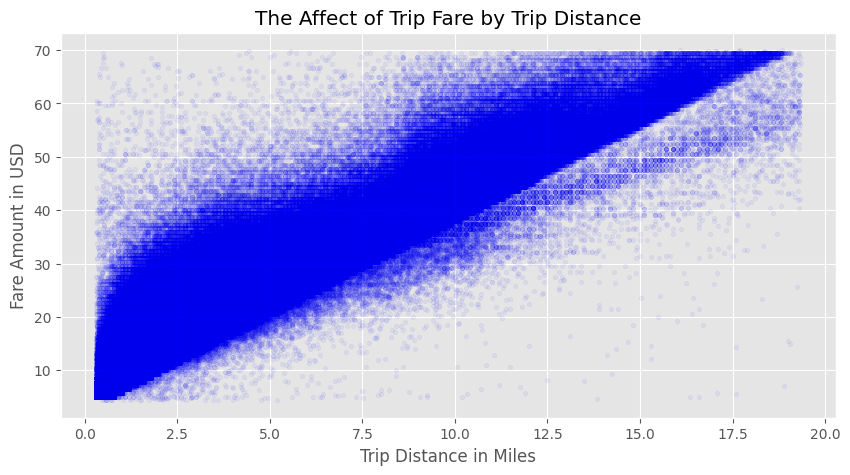

In [202]:
# Show how trip fare is affected by distance
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
filtered_mask = ((df_positive["TripDistance"] > 0.30) & (df_positive["TripDistance"] < 19.35) & 
                (df_positive["FareAmount"] > 4.4) & (df_positive["FareAmount"] < 70))

plt.figure (figsize= (10,5))
plt.scatter (data= df_positive[filtered_mask], x = "TripDistance", y = "FareAmount",s=10,marker= "o",c='b',alpha=0.05)
plt.title ("The Affect of Trip Fare by Trip Distance")
plt.xlabel ("Trip Distance in Miles")
plt.ylabel ("Fare Amount in USD")
plt.show ()


---

#### **3.1.7** Correlation Analysis Across Key Metrics

Correlation analysis was performed and visualized for the following pairs of variables to explore fare- and tip-related behavior:

1. `FareAmount` vs. `Trip Duration` (from pickup to dropoff time)
2. `FareAmount` vs. `PassengerCount`
3. `TipAmount` vs. `TripDistance`

These relationships were examined to understand how trip time, ride occupancy, and travel distance influence fare and tipping patterns.


1. `FareAmount` vs. `Trip Duration` (from pickup to dropoff time)

In [203]:
# Let's calculate the duration of the trip
df_positive ["Trip Duration"] = df_positive ["DropoffDateTime"] - df_positive ["PickupDateTime"]


In [204]:
# Let's confirm the data type of the feature
df_positive ["Trip Duration"].dtype


dtype('<m8[us]')

In [205]:
# Converting time-delta to minutes.
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
df_positive ["Trip Duration"] = df_positive ["Trip Duration"].dt.total_seconds()
df_positive ["Trip Duration"] = round(df_positive ["Trip Duration"] / 60, 1)

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
df_positive.rename (columns= {"Trip Duration" : "Trip Duration Minutes"}, inplace=True)


In [206]:
df_positive ["Trip Duration Minutes"].describe().round(2)


count    3544726.00
mean          17.00
std           39.91
min          -64.90
25%            7.70
50%           12.60
75%           20.20
max         1439.90
Name: Trip Duration Minutes, dtype: float64

In [207]:
df_positive[df_positive ["Trip Duration Minutes"] <= 0]["Trip Duration Minutes"].value_counts().sort_index()


Trip Duration Minutes
-64.9      1
-54.3      1
-54.1      1
-53.8      2
-53.2      1
        ... 
-11.8      1
-10.7      1
-7.6       1
-0.2       1
 0.0     174
Name: count, Length: 78, dtype: int64

In [208]:
# Trip duration cannot be negative
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
trip_duration_mask = df_positive ["Trip Duration Minutes"] <= 0
df_abnormality = pd.concat([df_abnormality, df_positive [trip_duration_mask]]).copy()

print (f"The number of incorrect entries, since the pickup and dropoff time are either 0 minutes or in negative : {df_positive [trip_duration_mask].shape[0]}")
print (f"The number of rows before treating it for trip duration : {df_positive.shape[0]:,}")

df_positive = df_positive [df_positive ["Trip Duration Minutes"] > 0].copy()
print (f"The number of rows after treating it for trip duration : {df_positive.shape[0]:,}")


The number of incorrect entries, since the pickup and dropoff time are either 0 minutes or in negative : 258
The number of rows before treating it for trip duration : 3,544,726
The number of rows after treating it for trip duration : 3,544,468


In [209]:
print (df_positive[["Trip Duration Minutes","FareAmount"]].corr())
print ()
print (f"The raw data has a positive correlation. The correlation is {df_positive[["Trip Duration Minutes","FareAmount"]].corr().loc["FareAmount"]["Trip Duration Minutes"]:.2f} approximately.")


                       Trip Duration Minutes  FareAmount
Trip Duration Minutes               1.000000    0.277724
FareAmount                          0.277724    1.000000

The raw data has a positive correlation. The correlation is 0.28 approximately.


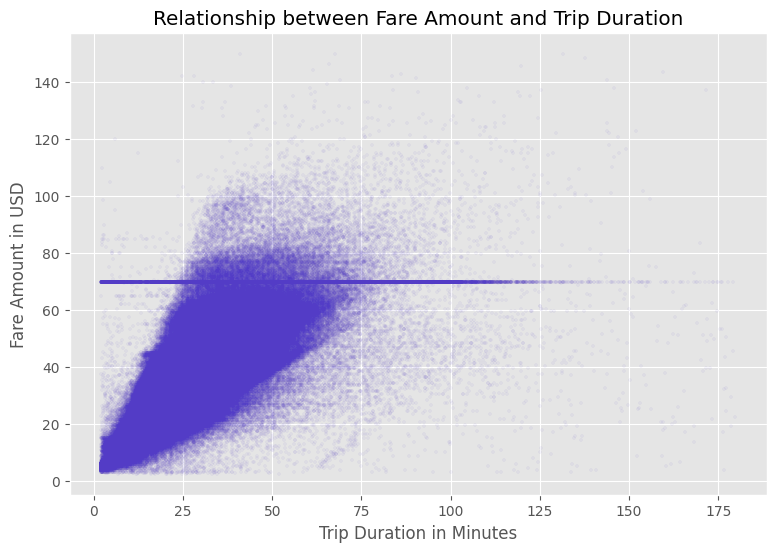

In [210]:
# Show relationship between fare and trip duration using scatter plot.
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
subset_fare_trip = df_positive[(df_positive ["Trip Duration Minutes"] > 2) & (df_positive ["Trip Duration Minutes"] <= 180) & (df_positive ["FareAmount"] > 2) & (df_positive ["FareAmount"] <= 500)][["Trip Duration Minutes","FareAmount"]]

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
plt.figure (figsize=(9,6)) 
plt.scatter (data= subset_fare_trip, 
             x= "Trip Duration Minutes", 
             y = "FareAmount", 
             alpha = 0.05, 
             s = 5, 
             c = "xkcd:blue with a hint of purple",
             marker = "+"
            )
plt.title ("Relationship between Fare Amount and Trip Duration")
plt.xlabel ("Trip Duration in Minutes")
plt.ylabel ("Fare Amount in USD")
plt.show()


In [211]:
print (subset_fare_trip.corr())
print ()
print (f"After filtering the data, we can see a strong correlation between trip duration and fare amount. Subset Data - Correlation is {subset_fare_trip.corr().loc["FareAmount"]["Trip Duration Minutes"]:.2f}")


                       Trip Duration Minutes  FareAmount
Trip Duration Minutes               1.000000    0.884242
FareAmount                          0.884242    1.000000

After filtering the data, we can see a strong correlation between trip duration and fare amount. Subset Data - Correlation is 0.88


In [212]:
df_abnormality.drop (columns = ["PickUp Hours", "PickUp Day of Week", "PickUp Month", "PickUp Quarter", "Trip Duration Minutes", 'VendorID-Name', 'PaymentType-Name', 'RateCodeID-EndofTrip-Name'], inplace=True)
df_abnormality.rename (columns= {"Total_Amount" : "Total Amount Recalculated"}, inplace=True)
df_abnormality.reset_index (inplace=True, drop=True)


2. `FareAmount` vs. `PassengerCount`

In [213]:
print (df_positive[["FareAmount","PassengerCount"]].corr())
print ()
print (f"The raw data has almost no correlation. The correlation is {df_positive[["FareAmount","PassengerCount"]].corr().loc["FareAmount"]["PassengerCount"]:.2f} approximately.")


                FareAmount  PassengerCount
FareAmount        1.000000        0.034089
PassengerCount    0.034089        1.000000

The raw data has almost no correlation. The correlation is 0.03 approximately.


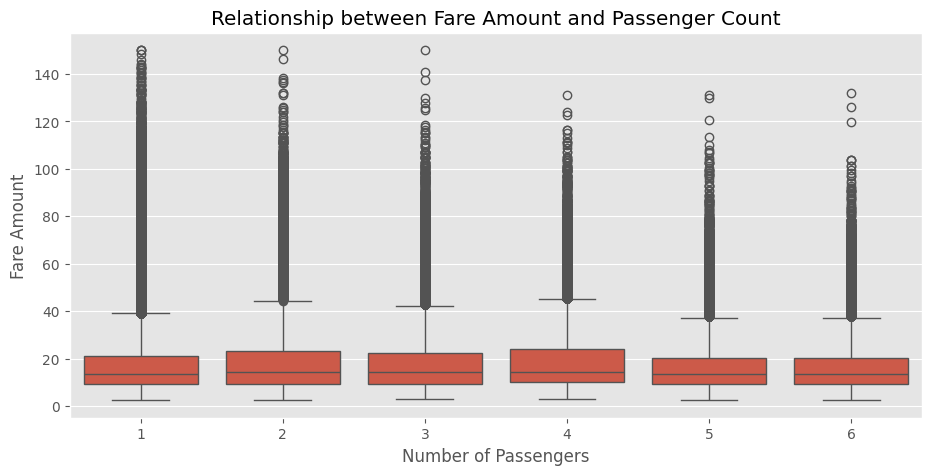

In [214]:
# Show relationship between fare and number of passengers
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
plt.figure (figsize= (11,5))
sns.boxplot (data = df_positive, x= "PassengerCount", y= "FareAmount")
plt.title ("Relationship between Fare Amount and Passenger Count")
plt.xlabel ("Number of Passengers")
plt.ylabel ("Fare Amount")
plt.show ()


3. `TipAmount` vs. `TripDistance`

In [215]:
print (df_positive[["TipAmount","TripDistance"]].corr())
print ()
print (f"The raw data has a positive correlation. The correlation is {df_positive[["TipAmount","TripDistance"]].corr().loc["TipAmount"]["TripDistance"]:.2f} approximately.")


              TipAmount  TripDistance
TipAmount      1.000000      0.555754
TripDistance   0.555754      1.000000

The raw data has a positive correlation. The correlation is 0.56 approximately.


In [216]:
# Let's figure out the cutoff to filter our data for a perfect visualization

df_positive [["TripDistance","TipAmount"]].quantile([0.01,0.99])


TripDistance  TipAmount
0.01          0.30       0.00
0.99         19.35      16.11

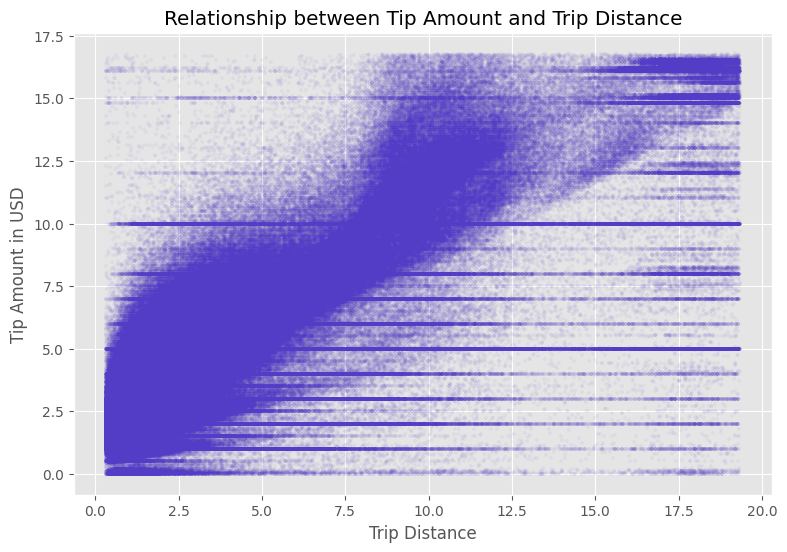

In [217]:
# Show relationship between tip and trip distance
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
subset_tip_trip_df = df_positive [(df_positive ["TipAmount"] != 0) & (df_positive["TripDistance"] > 0.30) & (df_positive["TripDistance"] < 19.35)]

plt.figure (figsize=(9,6)) 
plt.scatter (data= subset_tip_trip_df, 
             x= "TripDistance", 
             y = "TipAmount", 
             alpha = 0.05, 
             s = 5, 
             c = "xkcd:blue with a hint of purple",
             marker = "+"
            )
plt.title ("Relationship between Tip Amount and Trip Distance")
plt.xlabel ("Trip Distance")
plt.ylabel ("Tip Amount in USD")
plt.show()


In [218]:
# Correlation of the subset of our data.

subset_tip_trip_df[["TripDistance", "TipAmount"]].corr()


TripDistance  TipAmount
TripDistance      1.000000   0.816485
TipAmount         0.816485   1.000000

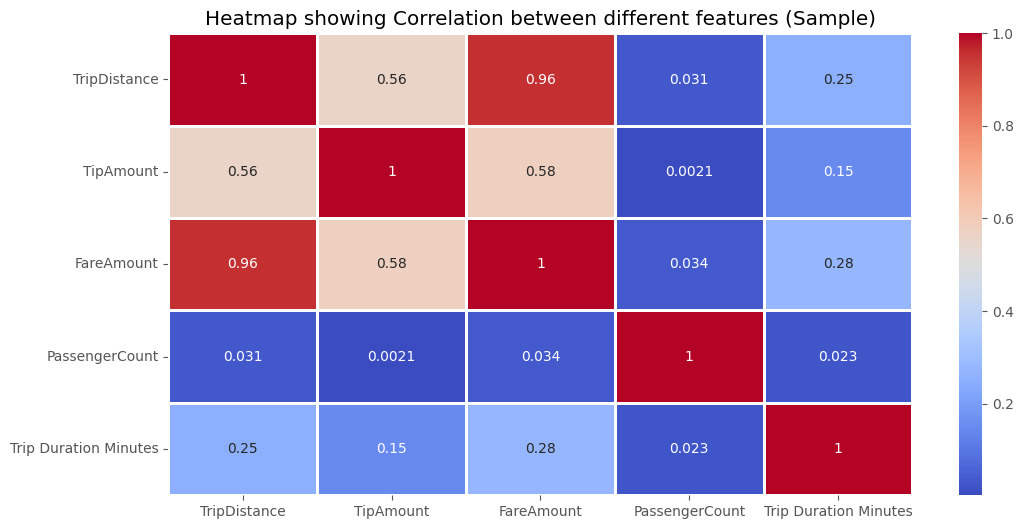

In [219]:
# Correlation Heatmap Monetary Values of our Raw Sample Data.
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
correlation_map = df_positive [["TripDistance","TipAmount","FareAmount","PassengerCount","Trip Duration Minutes"]].corr()

plt.figure (figsize=(12,6))
sns.heatmap (correlation_map,linewidths = 1, annot=True, cmap = 'coolwarm')
plt.title ("Heatmap showing Correlation between different features (Sample)")
plt.show()


---

#### **3.1.8** Payment Type Distribution Analysis

The distribution of payment methods (`PaymentType-Name`) was analyzed to understand rider payment preferences and identify dominant payment modes across trips.


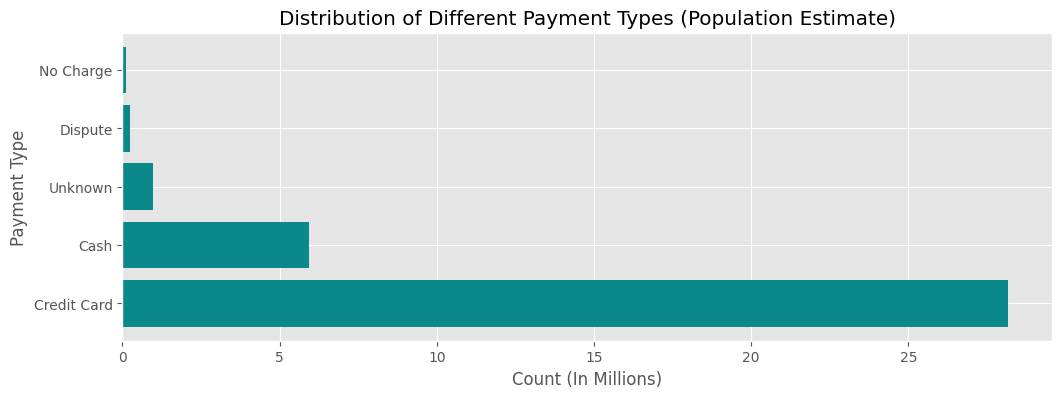

In [220]:
# Analyse the distribution of different payment types (payment_type).
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
payment_df = df_positive ["PaymentType-Name"].value_counts()

plt.figure (figsize=(12,4))
plt.barh(
    payment_df.index, 
    (payment_df.values * sample_ratio) / 1_000_000,
    color = "xkcd:dark cyan",
    )
plt.title ("Distribution of Different Payment Types (Population Estimate)")
plt.xlabel("Count (In Millions)")
plt.ylabel("Payment Type")
plt.ticklabel_format(style= "plain", axis='x')
plt.show()


In [221]:
# Getting the required labels.
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
labels = list()

for indices in payment_df.index:
    empty_str = ""
    empty_str = str(round(payment_df [indices] / payment_df.sum() * 100,2))
    empty_str = f"{indices} {empty_str} %"
    labels.append(empty_str)

print (labels)


['Credit Card 79.48 %', 'Cash 16.77 %', 'Unknown 2.75 %', 'Dispute 0.66 %', 'No Charge 0.34 %']


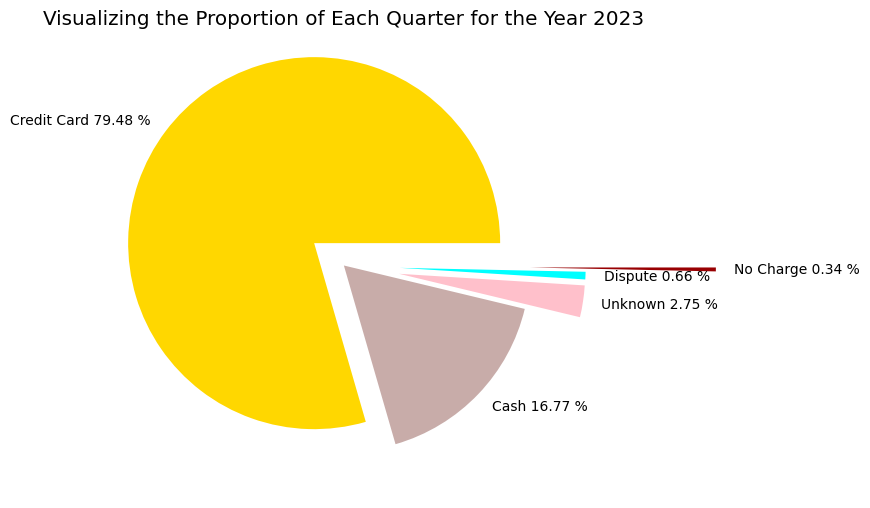

In [222]:
# Plotting a pie chart, to visualize the proportion for each quarter.
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
plt.figure(figsize = (6,8))
plt.pie (
        payment_df, 
        labels=labels,
        explode =[0.2,0,0.3,0.3,1],
        colors = ["gold", "xkcd:pinkish gray","pink", "cyan","xkcd:blood red"]
)
plt.title ("Visualizing the Proportion of Each Quarter for the Year 2023")
plt.show()


---

### Geographical Analysis

To support geospatial analysis, the NYC Taxi Zone shapefile (`taxi_zones.shp`) was used from the official TLC data repository. The shapefile folder contains multiple associated files (`.shx`, `.prj`, `.dbf`, etc.), which work together to define geographic boundaries. Only the main `.shp` file needed to be loaded — the supporting files were automatically utilized.

GeoPandas was used to read and process the shapefile and convert it into a GeoDataFrame for spatial analysis and mapping.

```python
import geopandas as gpd
zones = gpd.read_file("taxi_zones/taxi_zones.shp")
zones.head()


The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

In [223]:
# Please install geopandas before proceeding further (if not installed)
# !pip install geopandas


---

#### **3.1.9** Loading and Displaying the Shapefile

The NYC Taxi Zone shapefile was loaded using GeoPandas and visualized to confirm proper geographic boundaries and validate spatial data integration.


In [224]:
# Imprting geopandas library for spatial data.
import geopandas as gpd

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Read the shapefile using geopandas
zones = gpd.read_file("taxi_zones.shp")
zones.head(10)


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   
5         6    0.150491    0.000606  Arrochar/Fort Wadsworth           6   
6         7    0.107417    0.000390                  Astoria           7   
7         8    0.027591    0.000027             Astoria Park           8   
8         9    0.099784    0.000338               Auburndale           9   
9        10    0.099839    0.000436             Baisley Park          10   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...  
5  Staten Island  POLYGON ((966568.747 158679.855, 966615.256 15...  
6         Queens  POLYGON ((1010804.218 218919.641, 1011049.165 ...  
7         Queens  POLYGON ((1005482.276 221686.466, 1005304.898 ...  
8         Queens  POLYGON ((1043803.993 216615.925, 1043849.708 ...  
9         Queens  POLYGON ((1044355.072 190734.321, 1044612.122 ...

In [225]:
# Let's view the column names

zones.columns

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry'],
      dtype='object')

After loading the shapefile, the resulting GeoDataFrame contained columns such as `OBJECTID`, `Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, and `geometry`.

The `LocationID` field corresponds to the pickup and drop-off location IDs used in the trip records, enabling spatial joining between the trip dataset and the taxi zone boundaries.

Geometric attributes such as shape length, shape area, and geometry were retained to support spatial visualization. The zone boundaries were then plotted to validate the geospatial structure and confirm correct mapping across NYC taxi zones.


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

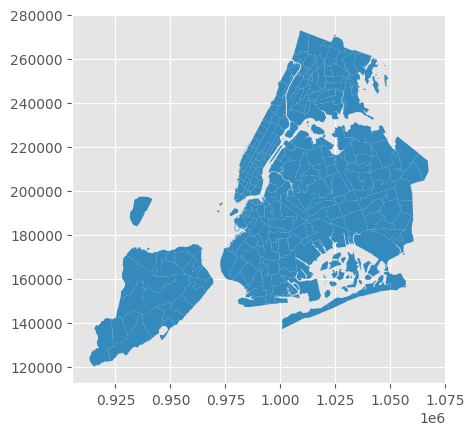

In [226]:
print(zones.info())
zones.plot()


---

#### **3.1.10** Merging Zone Information with Trip Data

The taxi zone metadata was merged with the trip dataset by matching `LocationID` from the shapefile with the `PULocationID` field in the trip records. This enabled geographic enrichment of the dataset, allowing each trip to be associated with its corresponding pickup zone.


In [227]:
# Merging zones and trip records using locationID and PULocationID
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Merging on Pickup Location ID
merged_df = pd.merge(left=df_positive , right=zones, how='left', left_on="PULocationID", right_on="LocationID")

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
merged_df.rename (columns= {
    'zone':'PickUp_Zone',
    'LocationID':'PickUp_LocationID',
    'borough':'PickUp_Borough', 
    "OBJECTID" : "PickUp_OBJECTID", 
    "Shape_Leng" : "PickUp_ShapeLength" , 
    "Shape_Area" : "PickUp_ShapeArea", 
    "geometry" : "PickUp_Geometry"
},inplace=True)


In [228]:
# Merging zones and trip records using locationID and DOLocationID
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Merging on Drop Location ID
merged_df = pd.merge(left=merged_df , right=zones, how='left', left_on="DOLocationID", right_on="LocationID")

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
merged_df.rename (columns= {
    'zone':'DropOff_Zone',
    'LocationID':'DropOff_LocationID',
    'borough':'DropOff_Borough', 
    "OBJECTID" : "DropOff_OBJECTID", 
    "Shape_Leng" : "DropOff_ShapeLength" , 
    "Shape_Area" : "DropOff_ShapeArea", 
    "geometry" : "DropOff_Geometry"
},inplace=True)


In [229]:
# Changing the datatype to check for equality.
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Converting the data type so it passes the equality check.

merged_df["PickUp_LocationID"] = merged_df["PickUp_LocationID"].astype("int64")
merged_df["DropOff_LocationID"] = merged_df["DropOff_LocationID"].astype("int64")

print (f"Equality check if the Pick Up Locations IDs match : {merged_df["PULocationID"].equals(merged_df["PickUp_LocationID"])}")
print (f"Equality check if the Drop Off Locations IDs match : {merged_df["DOLocationID"].equals(merged_df["DropOff_LocationID"])}")

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Dropping the columns which got repeated due to merging.

merged_df.drop(columns = ["PULocationID", "DOLocationID"], inplace=True)


Equality check if the Pick Up Locations IDs match : True
Equality check if the Drop Off Locations IDs match : True


---

#### **3.1.11** Trip Volume by Location

Trip data was grouped by `PickUp_LocationID` to calculate the total number of trips originating from each pickup location. This helped identify high-demand areas and popular pickup zones across the city.


In [230]:
# Group data by location and calculate the number of trips

grouped_location_id = merged_df.groupby(["PickUp_LocationID"])["PickUp_LocationID"].count()
grouped_location_id.sort_values(ascending=False)


PickUp_LocationID
237    172129
161    167068
132    159276
236    154353
162    128772
        ...  
84          1
30          1
245         1
118         1
27          1
Name: PickUp_LocationID, Length: 251, dtype: int64

In [231]:
# Top 5 busiest zones

top_5_busiest_location_ids = grouped_location_id.sort_values(ascending=False)[:5].index.values

zones [zones ["LocationID"].isin(top_5_busiest_location_ids)][["LocationID","zone"]].reset_index(drop=True)


LocationID                   zone
0         132            JFK Airport
1         161         Midtown Center
2         162           Midtown East
3         236  Upper East Side North
4         237  Upper East Side South

---

#### **3.1.12** Adding Trip Counts to the GeoDataFrame

The aggregated trip counts were merged into the GeoDataFrame, associating each taxi zone with its total number of pickup trips. This enriched geospatial data was then used to visualize trip density across NYC zones.


In [232]:
# Merge trip counts back to the zones GeoDataFrame

zones["Number of Trips"] = zones["LocationID"].map(grouped_location_id)


In [233]:
# Let's view the first 5 rows

zones.head()


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   Number of Trips  
0             10.0  
1              2.0  
2             63.0  
3           4235.0  
4              6.0

---

#### **3.1.13** Zone-Wise Trip Density Map

A choropleth map was generated to visualize trip volume across NYC taxi zones. Each zone was color-coded based on the number of trips originating from that area, highlighting high-demand pickup regions.


In [234]:
# Lets view the column names of the zones dataframe

zones.columns


Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry', 'Number of Trips'],
      dtype='object')

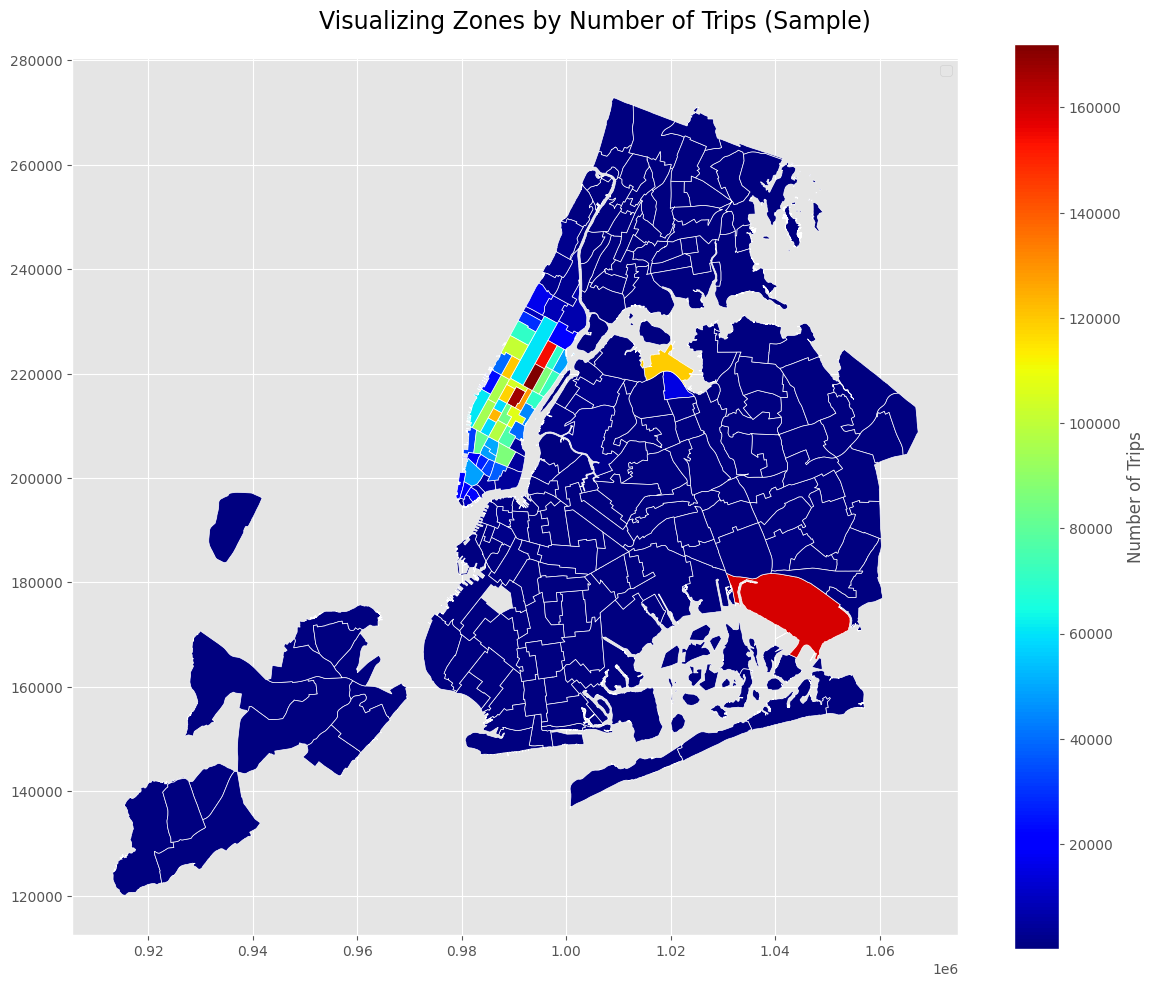

In [235]:
# Define figure and axis

fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# can you try displaying the zones DF sorted by the number of trips?

zones.plot(
            column = "Number of Trips", ax= ax, cmap= "jet", edgecolor = "white",
            legend=True,legend_kwds = {'label': "Number of Trips", 'orientation': "vertical"}
)
fig.suptitle('Visualizing Zones by Number of Trips (Sample)', fontsize=17)
fig.tight_layout()
plt.legend()
plt.show()


- The Dark Blue color represents low number of trips. (Low Demand Zones)
- The Light Blue, Light Green, Yellow color represents moderate number of trips. (Moderate Demand Zones)
- The Orange and Red color represents the highest number of trips. (Higher Demand Zones)

This concludes the temporal, financial, and geographical analysis of the NYC taxi trip dataset.


---

### **3.2** Detailed EDA: Insights and Strategies

After completing the initial exploratory analysis to identify key trends and patterns, the focus shifted to more detailed examination of operational efficiency, pricing behavior, and customer experience metrics.


---

### Operational Efficiency
---

#### **3.2.1** Route Speed and Congestion Analysis

Slow routes were identified by calculating the average time taken for trips between pickup and drop-off zones across different hours of the day. Route performance was analyzed by time of day and location to detect congestion patterns, bottlenecks, and operational inefficiencies.

This approach enabled comparison of travel speeds across zones and time windows, highlighting routes with consistently higher travel times during specific hours.


$$
\mathrm{RouteSpeed}_{(zone,\;hour)}=\frac{\mathrm{TripDistance}}{\mathrm{AvgTripDuration}(hour)}
$$


In [236]:
# Find routes which have the slowest speeds at different times of the day

merged_df ["Miles Per Hour"] = (merged_df ["TripDistance"] / merged_df ["Trip Duration Minutes"]) * 60


In [237]:
# Checking for unreasonable, high miles per hour.
merged_df ["Miles Per Hour"].value_counts().sort_index(ascending=False) 


Miles Per Hour
20220.000000    1
13980.000000    1
13080.000000    1
12420.000000    1
12300.000000    1
               ..
0.003063        1
0.002920        1
0.002741        1
0.001796        1
0.000771        1
Name: count, Length: 306205, dtype: int64

In [238]:
# Working only with a subset of the data to solve the problem at hand.
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
print (f"Number of Rows our original data has : {merged_df.shape[0]:,}")

# Miles per Hour should be reasonable that is below 100.
slow_route_subset = merged_df [merged_df ["Miles Per Hour"] <= 100]
print (f"Number of Rows our subset data has : {slow_route_subset.shape[0]:,}")

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
slow_route_subset = pd.DataFrame(slow_route_subset.groupby (["PickUp_Zone", "DropOff_Zone","PickUp Hours"]).agg({"Miles Per Hour" : [np.mean, "count"]}))
slow_route_subset.reset_index(inplace=True)
slow_route_subset.columns = ['PickUp_Zone', 'DropOff_Zone', 'PickUp Hours', "Average MPH", "Number of Trips"]


Number of Rows our original data has : 3,545,647
Number of Rows our subset data has : 3,544,961


In [239]:
# Filtering out to make our subset more reliable for the problem at hand.

print (f"25% of our subset lies below or within : {slow_route_subset ["Number of Trips"].quantile(0.25)} Trip.")
slow_route_subset = slow_route_subset [slow_route_subset ["Number of Trips"] >= 25].copy()
print (f"The number of reliable trips we are working with : {slow_route_subset ["Number of Trips"].sum():,}")


25% of our subset lies below or within : 1.0 Trip.
The number of reliable trips we are working with : 2,965,665


In [240]:
# Routes which have the slowest speeds at different times of the day
slow_route_subset.sort_values (by= ["Average MPH", "Number of Trips"], ascending= [True, False])


PickUp_Zone      DropOff_Zone  PickUp Hours  \
48274               Garment District  Garment District            10   
48280               Garment District  Garment District            16   
112794  Penn Station/Madison Sq West  Garment District            12   
112798  Penn Station/Madison Sq West  Garment District            16   
112793  Penn Station/Madison Sq West  Garment District            11   
...                              ...               ...           ...   
61200                    JFK Airport         Bay Ridge            22   
66324                    JFK Airport    Yorkville East             1   
135490           UN/Turtle Bay South       JFK Airport             4   
61201                    JFK Airport         Bay Ridge            23   
61178                    JFK Airport         Bay Ridge             0   

        Average MPH  Number of Trips  
48274      3.381514               28  
48280      3.572714               70  
112794     3.625510              152  
112798     3.782993              125  
112793     3.794147              155  
...             ...              ...  
61200     40.075679               42  
66324     40.705799               33  
135490    40.879106               42  
61201     41.808945               44  
61178     43.567073               28  

[30481 rows x 5 columns]

In [241]:
# The top 15 slowest routes:

top_15_slowest_routes = slow_route_subset.sort_values (["Average MPH","Number of Trips"],ascending=[True, False])[:15]
top_15_slowest_routes.reset_index (inplace=True, drop=True)


In [242]:
# The top 15 routes which have the slowest speeds at different times of the day
top_15_slowest_routes


PickUp_Zone                  DropOff_Zone  PickUp Hours  \
0               Garment District              Garment District            10   
1               Garment District              Garment District            16   
2   Penn Station/Madison Sq West              Garment District            12   
3   Penn Station/Madison Sq West              Garment District            16   
4   Penn Station/Madison Sq West              Garment District            11   
5   Penn Station/Madison Sq West              Garment District            13   
6   Penn Station/Madison Sq West                 Midtown South            12   
7   Penn Station/Madison Sq West     Times Sq/Theatre District            12   
8   Penn Station/Madison Sq West                  Clinton East            13   
9               Garment District              Garment District            17   
10  Penn Station/Madison Sq West              Garment District            17   
11  Penn Station/Madison Sq West     Times Sq/Theatre District            13   
12                Midtown Center     Times Sq/Theatre District            16   
13  Penn Station/Madison Sq West  Penn Station/Madison Sq West            17   
14                Midtown Center     Times Sq/Theatre District            17   

    Average MPH  Number of Trips  
0      3.381514               28  
1      3.572714               70  
2      3.625510              152  
3      3.782993              125  
4      3.794147              155  
5      3.845434              188  
6      3.986218              189  
7      4.007117              601  
8      4.027238              262  
9      4.084289               71  
10     4.084586              142  
11     4.104674              580  
12     4.159566              397  
13     4.162179               48  
14     4.183783              437

#### How does identifying high-traffic, high-demand routes help?
- It would help us in better resource allocation. We could send more drivers to routes with a higher demand. Avoid over supplying drivers to routes with lower demand and higher traffic.
  
- We could make an informed decision of Congestion Pricing Strategy as per these zones.
  
- Public Transportation can be made avaiable for some of the zones on the basis of our analysis.

- Better Traffic Management.
  
- Customers would get a more accurate Estimated Time of their Arrival. Leading to better customer service and happier customers.
  
- Surge Pricing could be implemented on slow routes having Higher Demand.
  
- Vendors could offer bonuses to drivers who are completing trips in Higher Demand and Slower Routes.

---

#### **3.2.2** Hourly Trip Volume Analysis

The number of trips for each hour of the day was calculated and visualized to identify peak demand periods. The busiest hour was determined based on the highest trip count and highlighted to show the concentration of ride activity during that time.


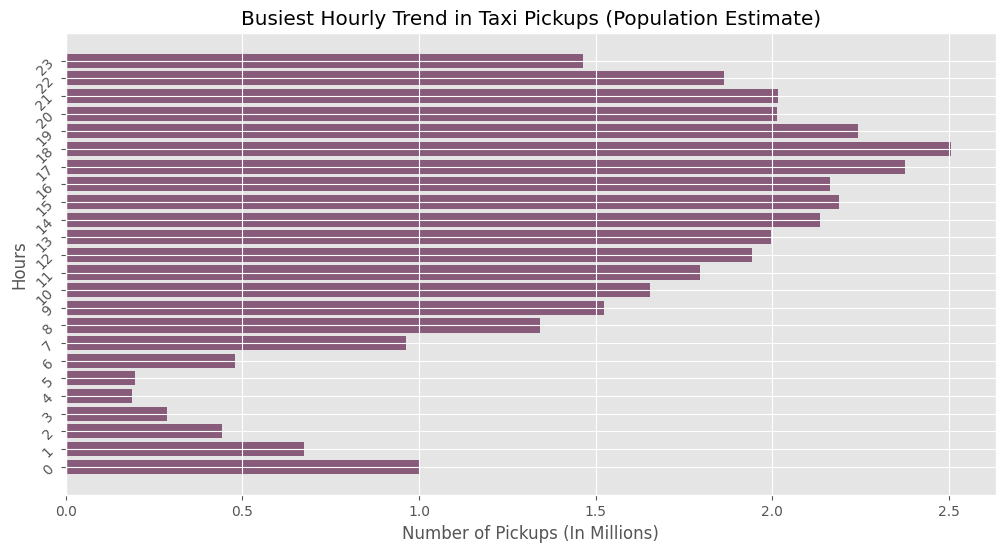

In [243]:
# Visualise the number of trips per hour and find the busiest hour.
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Number of Trips per Hour, to identify the busiest hour.
busiest_hour = merged_df.groupby(["PickUp Hours"])["VendorID"].count()

# To estimate population
sample_ratio = 1 / 0.10

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Plotting a horizontal bar plot.
plt.figure (figsize=(12,6))
plt.barh(
    busiest_hour.index, 
    (busiest_hour.values * sample_ratio) / 1_000_000,
    height = 0.8,
    zorder = 0,
    color = "xkcd:dusky purple"
)
plt.title ("Busiest Hourly Trend in Taxi Pickups (Population Estimate)")
plt.xlabel("Number of Pickups (In Millions)")
plt.ylabel("Hours")
plt.yticks(np.arange(0,24),rotation=45)
plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

In [244]:
sample_fraction = 0.10
estimate_population = 1 / sample_fraction

print (f"The Busiest hour in our sampling data is : {busiest_hour.idxmax()}, It will be True for the population as well. The number of trips : {busiest_hour.max():,} Sample Data.")
print (f"The Number of Trips for the busiest hour as per the population is {int(busiest_hour.max() * estimate_population):,}")


The Busiest hour in our sampling data is : 18, It will be True for the population as well. The number of trips : 250,684 Sample Data.
The Number of Trips for the busiest hour as per the population is 2,506,840


---

#### **3.2.3** Top Peak-Hour Trip Volume

The five busiest hours of the day were identified, and the total number of trips during each of those peak periods was calculated to quantify demand intensity across high-traffic time windows.


In [245]:
# Top 5 Busiest Hours.
top_5_busiest_hour = busiest_hour.sort_values(ascending=False)[:5]


In [246]:
# Scale up the number of trips
# Fill in the value of your sampling fraction and use that to scale up the numbers
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
sample_fraction = 0.10
estimate_population = 1 / sample_fraction
position = 1

for index, values in zip(top_5_busiest_hour.index, top_5_busiest_hour.values):
    print (f"Rank {position} : For {index}th hour of the day, The Estimated Population for the Top 5 Busiest Hour based on the Sample Fraction is : {round(int(values * estimate_population) / 1000000, 2)} Million Trips.")
    position += 1
    

Rank 1 : For 18th hour of the day, The Estimated Population for the Top 5 Busiest Hour based on the Sample Fraction is : 2.51 Million Trips.
Rank 2 : For 17th hour of the day, The Estimated Population for the Top 5 Busiest Hour based on the Sample Fraction is : 2.38 Million Trips.
Rank 3 : For 19th hour of the day, The Estimated Population for the Top 5 Busiest Hour based on the Sample Fraction is : 2.24 Million Trips.
Rank 4 : For 15th hour of the day, The Estimated Population for the Top 5 Busiest Hour based on the Sample Fraction is : 2.19 Million Trips.
Rank 5 : For 16th hour of the day, The Estimated Population for the Top 5 Busiest Hour based on the Sample Fraction is : 2.16 Million Trips.


---

#### **3.2.4** Weekday vs Weekend Hourly Traffic Patterns

Hourly trip patterns were compared between weekdays and weekends to understand differences in rider behavior. A line plot was used to visualize variations in demand across hours, highlighting distinct traffic peaks for weekday commuting patterns versus weekend travel behavior.


In [247]:
# Compare traffic trends for the week days and weekends
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Working only with a subset of the data to solve the problem at hand.

print (f"Number of Rows our original data has : {merged_df.shape[0]:,}")

hourly_traffic_subset = merged_df [merged_df ["Miles Per Hour"] <= 100]

print (f"Number of Rows our subset data has : {hourly_traffic_subset.shape[0]:,}")

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Calculating the Average speed and Number of Trips for each day and each hour of the week.
hourly_traffic_subset = pd.DataFrame(hourly_traffic_subset.groupby (["PickUp Hours","PickUp Day of Week"]).agg({"Miles Per Hour" : [np.mean, "count"]}))

# Resetting the index.
hourly_traffic_subset.reset_index(inplace=True)

# Renaming the columns.
hourly_traffic_subset.columns = ["PickUp Hours", "PickUp Day of Week", "Average MPH", "Number of Trips"]


Number of Rows our original data has : 3,545,647
Number of Rows our subset data has : 3,544,961


In [248]:
# Getting the subset of weekday.

hourly_traffic_weekday_subset = hourly_traffic_subset [hourly_traffic_subset ["PickUp Day of Week"] <= 4]
hourly_traffic_weekday_subset.reset_index (inplace=True, drop= True)
hourly_traffic_weekday_subset.drop (columns="PickUp Day of Week", inplace=True)

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Getting the number of trips and their weighted average for weekday.

grouped_weekday_hourly_traffic_data = hourly_traffic_weekday_subset.groupby (["PickUp Hours"])
hourly_traffic_weekday_subset = grouped_weekday_hourly_traffic_data.agg ({"Number of Trips" : "sum"})
hourly_traffic_weekday_subset ["Weighted Average MPH"] = grouped_weekday_hourly_traffic_data.apply (
                   
            lambda x : np.average (x ["Average MPH"], weights= x ["Number of Trips"])
)
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Getting the subset of weekend.

hourly_traffic_weekend_subset = hourly_traffic_subset [hourly_traffic_subset ["PickUp Day of Week"] > 4]
hourly_traffic_weekend_subset.reset_index (inplace=True, drop= True)
hourly_traffic_weekend_subset.drop (columns="PickUp Day of Week", inplace=True)

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Getting the number of trips and their weighted average for weekend.

grouped_weekend_hourly_traffic_data = hourly_traffic_weekend_subset.groupby (["PickUp Hours"])
hourly_traffic_weekend_subset = grouped_weekend_hourly_traffic_data.agg ({"Number of Trips" : "sum"})
hourly_traffic_weekend_subset ["Weighted Average MPH"] = grouped_weekend_hourly_traffic_data.apply (
                   
            lambda x : np.average (x ["Average MPH"], weights= x ["Number of Trips"])
)

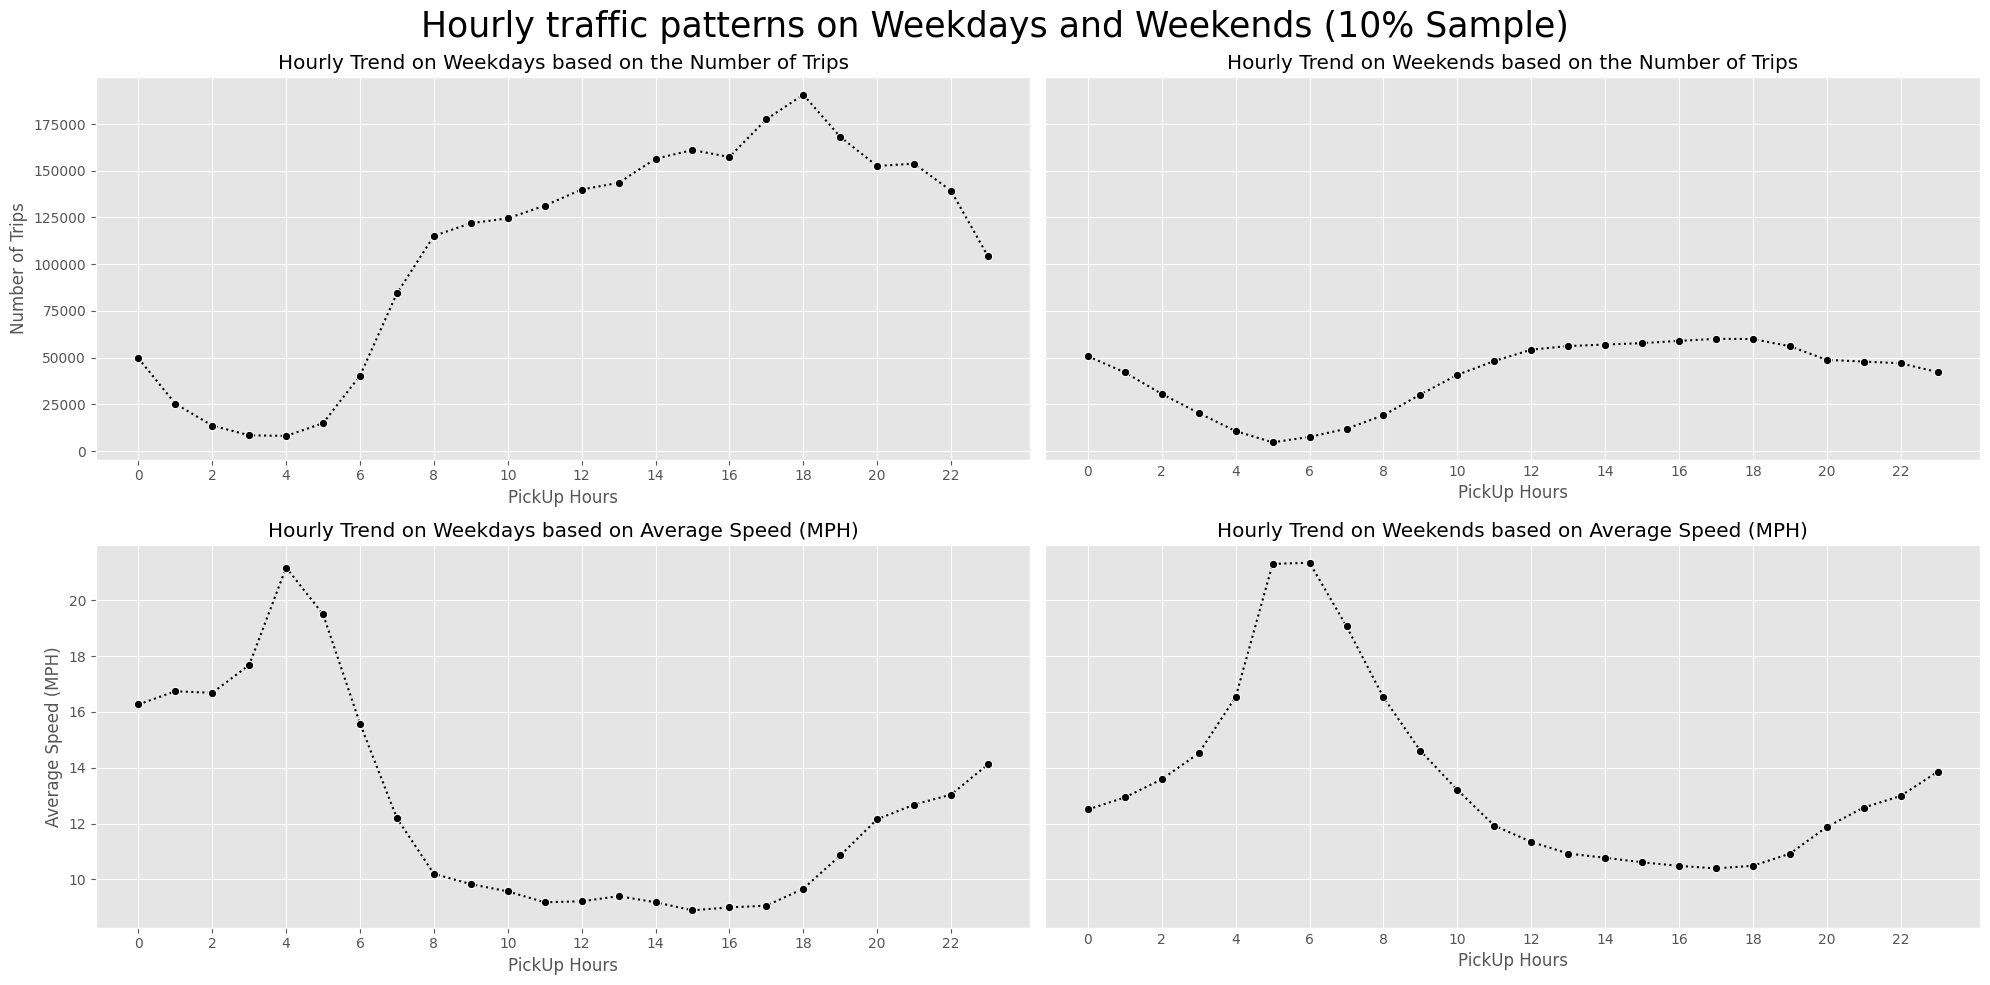

In [249]:
# Plotting a Line Plot -- Hourly Trend on Weekdays
plt.figure (figsize=(20,10))
ax1 = plt.subplot(2, 2, 1)
sns.lineplot (
            data= hourly_traffic_weekday_subset, 
            x = "PickUp Hours", y = "Number of Trips", 
            marker = "o", ls= ":", color = "black"
)
plt.title ("Hourly Trend on Weekdays based on the Number of Trips")
plt.xlabel ("PickUp Hours")
plt.xticks (range(0,24,2))
plt.ylabel ("Number of Trips")

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Plotting a Line Plot -- Hourly Trend on Weekends
ax2 = plt.subplot(2, 2, 2, sharey=ax1)
sns.lineplot (
              data= hourly_traffic_weekend_subset, 
              x = "PickUp Hours", y = "Number of Trips", 
              marker = "o", ls= ":", color = "black"
)
plt.title ("Hourly Trend on Weekends based on the Number of Trips")
plt.xlabel ("PickUp Hours")
plt.xticks (range(0,24,2))
plt.ylabel ("")
ax2.tick_params (labelleft = False, length= 0)

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Plotting a Line Plot -- Hourly Trend on Weekdays based on Average Speed 
ax3 = plt.subplot(2, 2, 3)
sns.lineplot (
            data= hourly_traffic_weekday_subset, 
            x = "PickUp Hours", y = "Weighted Average MPH", 
            marker = "o", ls= ":", color = "black"
)
plt.title ("Hourly Trend on Weekdays based on Average Speed (MPH)")
plt.xlabel ("PickUp Hours")
plt.xticks (range(0,24,2))
plt.ylabel ("Average Speed (MPH)")

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Plotting a Line Plot -- Hourly Trend on Weekends based on Average Speed 
ax4 = plt.subplot(2, 2, 4, sharey=ax3)
sns.lineplot (
            data= hourly_traffic_weekend_subset, 
            x = "PickUp Hours", y = "Weighted Average MPH", 
            marker = "o", ls= ":", color = "black"
)
plt.title ("Hourly Trend on Weekends based on Average Speed (MPH)")
plt.xlabel ("PickUp Hours")
plt.xticks (range(0,24,2))
plt.ylabel ("")
ax4.tick_params (labelleft = False, length= 0)

plt.suptitle("Hourly traffic patterns on Weekdays and Weekends (10% Sample)", fontsize=25) 
plt.tight_layout() 
plt.show()


In [250]:
# Creating a dictionary for mapping days of the week.

day_of_week = {0: "Mon", 1 : "Tue", 2 : "Wed", 3 : "Thu" , 4 : "Fri", 5 : "Sat", 6 : "Sun"}

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Getting subset for each day in week days.

hourly_traffic_weekday_each_day_subset = hourly_traffic_subset [hourly_traffic_subset ["PickUp Day of Week"] <= 4]
hourly_traffic_weekday_each_day_subset.reset_index (inplace=True, drop= True)
hourly_traffic_weekday_each_day_subset ["PickUp Day of Week"] = hourly_traffic_weekday_each_day_subset ["PickUp Day of Week"].map(day_of_week)

grouped_weekday_each_day_hourly_traffic_data = hourly_traffic_weekday_each_day_subset.groupby (["PickUp Hours", "PickUp Day of Week"])
hourly_traffic_weekday_each_day_subset = grouped_weekday_each_day_hourly_traffic_data.agg ({"Number of Trips" : "sum"})
hourly_traffic_weekday_each_day_subset ["Weighted Average MPH"] = grouped_weekday_each_day_hourly_traffic_data.apply (
                   
            lambda x : np.average (x ["Average MPH"], weights= x ["Number of Trips"])
)
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Getting subset for each day in weekends.

hourly_traffic_weekend_each_day_subset = hourly_traffic_subset [hourly_traffic_subset ["PickUp Day of Week"] > 4]
hourly_traffic_weekend_each_day_subset.reset_index (inplace=True, drop= True)
hourly_traffic_weekend_each_day_subset ["PickUp Day of Week"] = hourly_traffic_weekend_each_day_subset ["PickUp Day of Week"].map(day_of_week)

grouped_weekend_each_day_hourly_traffic_data = hourly_traffic_weekend_each_day_subset.groupby (["PickUp Hours", "PickUp Day of Week"])
hourly_traffic_weekend_each_day_subset = grouped_weekend_each_day_hourly_traffic_data.agg ({"Number of Trips" : "sum"})
hourly_traffic_weekend_each_day_subset ["Weighted Average MPH"] = grouped_weekend_each_day_hourly_traffic_data.apply (
                   
            lambda x : np.average (x ["Average MPH"], weights= x ["Number of Trips"])
)

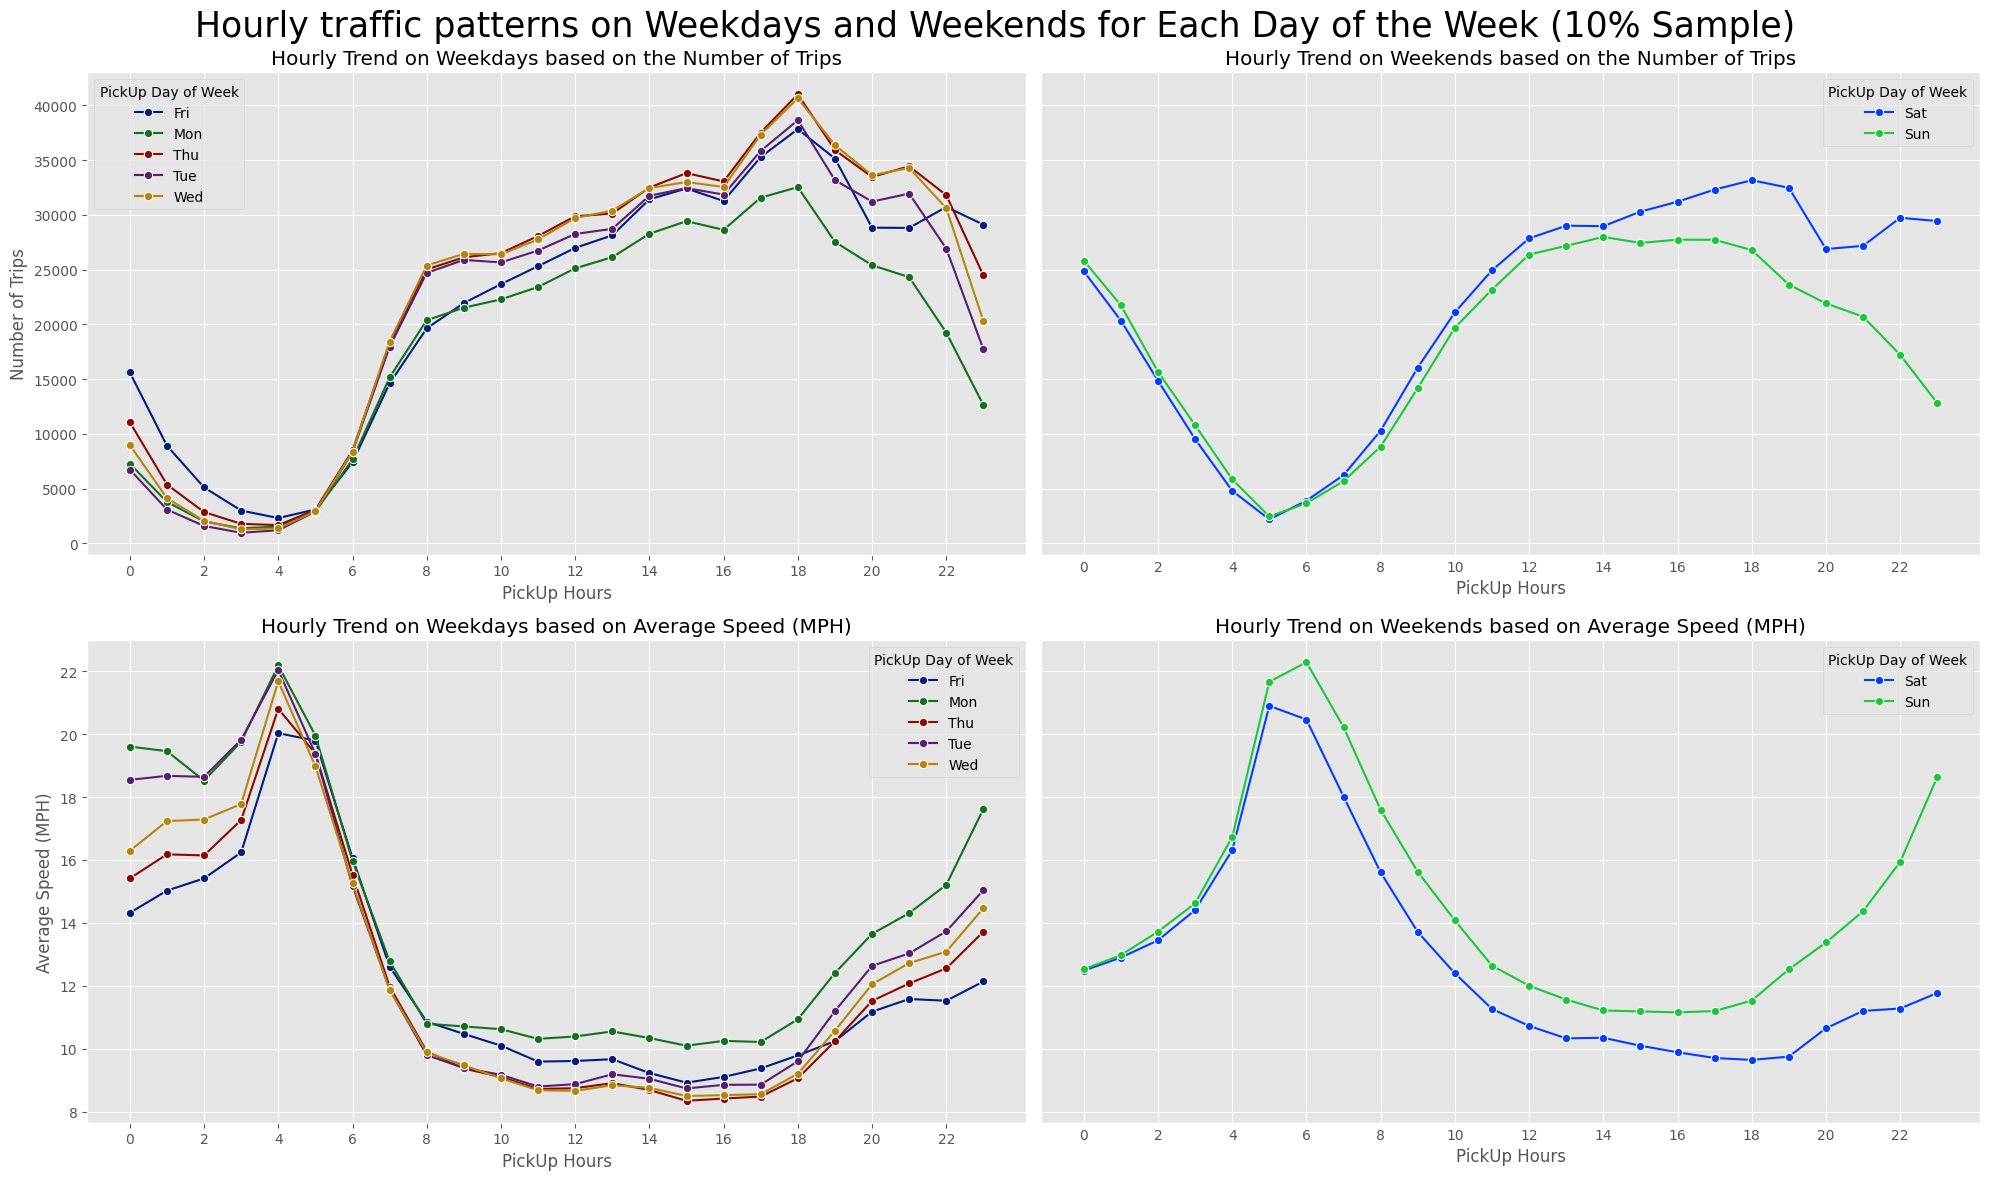

In [251]:
# Plotting a line plot -- Hourly Trend on Weekdays (For Each Day)
plt.figure (figsize=(20,12))
ax1 = plt.subplot(2, 2, 1)
sns.lineplot (
            data= hourly_traffic_weekday_each_day_subset, 
            x = "PickUp Hours", y = "Number of Trips", 
            hue= "PickUp Day of Week", marker = "o", palette = "dark6"
)
plt.title ("Hourly Trend on Weekdays based on the Number of Trips")
plt.xlabel ("PickUp Hours")
plt.xticks (range(0,24,2))
plt.ylabel ("Number of Trips")

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Plotting a line plot -- Hourly Trend on Weekends (For Each Day)
ax2 = plt.subplot(2, 2, 2, sharey=ax1)
sns.lineplot (
            data= hourly_traffic_weekend_each_day_subset, 
            x = "PickUp Hours", y = "Number of Trips", 
            hue= "PickUp Day of Week", marker = "o", palette = "bright6"
)
plt.title ("Hourly Trend on Weekends based on the Number of Trips")
plt.xlabel ("PickUp Hours")
plt.xticks (range(0,24,2))
plt.ylabel ("")
ax2.tick_params (labelleft = False, length= 0)

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Plotting a line plot -- Hourly Trend on Weekdays based on Average Speed (For Each Day)
ax3 = plt.subplot(2, 2, 3)
sns.lineplot (
            data= hourly_traffic_weekday_each_day_subset, 
            x = "PickUp Hours", y = "Weighted Average MPH", 
            hue= "PickUp Day of Week", marker = "o", palette = "dark6"
)
plt.title ("Hourly Trend on Weekdays based on Average Speed (MPH)")
plt.xlabel ("PickUp Hours")
plt.xticks (range(0,24,2))
plt.ylabel ("Average Speed (MPH)")

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Plotting a line plot -- Hourly Trend on Weekends based on Average Speed (For Each Day)
ax4 = plt.subplot(2, 2, 4, sharey=ax3)
sns.lineplot (
            data= hourly_traffic_weekend_each_day_subset, 
            x = "PickUp Hours", y = "Weighted Average MPH", 
            hue= "PickUp Day of Week", marker = "o", palette = "bright6"
)
plt.title ("Hourly Trend on Weekends based on Average Speed (MPH)")
plt.xlabel ("PickUp Hours")
plt.xticks (range(0,24,2))
plt.ylabel ("")
ax4.tick_params (labelleft = False, length= 0)

plt.suptitle("Hourly traffic patterns on Weekdays and Weekends for Each Day of the Week (10% Sample)", fontsize=25) 
plt.tight_layout() 
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?
- The Vendors can predict demand pattern, when to send out more Taxi Drivers and when to not. This would lead to maximum revenue generation.
- Driver’s can be given breaks when demand is low and can work during surge hours to meet the demand.
- `Weekdays :` People tend to take a cab more often from 5:00AM to 18:00PM, which indicates a higher demand for cabs. (Busy Hours)
- `Weekends :` People tend to take a cab more often from 8:00AM to 18:00PM, which indicates a higher demand for cabs. (Busy Hours)
- From the plots we can tell that the Average Speed and the Number of trips is correlated. As the number of trips increases the Average Speed decreases and vice versa.

---

#### **3.2.5** High-Demand Zone Analysis

The top 10 zones with the highest hourly pickups were identified, and the same analysis was performed for hourly drop-offs. Pickup and drop-off trends for these high-demand zones were then visualized to understand zone-level traffic patterns and peak service periods.


In [252]:
# Derived metrics -- for dropoff hours
merged_df ["DropOff_Hours"] = merged_df.DropoffDateTime.dt.hour


In [253]:
# Finding the top 10 pickup and dropoff zones

In [254]:
# Pickup Zone Analysis
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Finding the number of trips for each pickup zone for each hour of the day.
hourly_pickup_zones = pd.DataFrame (merged_df.groupby (["PickUp_Zone","PickUp Hours"])["PickUp_LocationID"].count())
hourly_pickup_zones.columns = ["Number of Trips"]
hourly_pickup_zones.reset_index(inplace=True)

# Top 10 Pickup Zones with the total number of trips each zone
top_10_pickup_zones = hourly_pickup_zones.groupby("PickUp_Zone")["Number of Trips"].sum().sort_values(ascending=False)[:10].copy()

# Top 10 Pickup Zones with Hourly Trend and number of trips
top_10_hourly_pickup_zones = hourly_pickup_zones  [hourly_pickup_zones["PickUp_Zone"].isin(top_10_pickup_zones.index)]

# Top 5 Pickup Zones -- First Half (Divided into two halves for visualization)
top_5_pickup_zones = top_10_pickup_zones.head(n= 5)
top_5_hourly_pickup_zones = hourly_pickup_zones  [hourly_pickup_zones["PickUp_Zone"].isin(top_5_pickup_zones.index)]

# Top 6 to 10 Pickup Zones -- Second Half (Divided into two halves for visualization)
top_6_to_10_pickup_zones = top_10_pickup_zones.tail(n= 5)
top_6_to_10_hourly_pickup_zones = hourly_pickup_zones  [hourly_pickup_zones["PickUp_Zone"].isin(top_6_to_10_pickup_zones.index)]


In [255]:
# Drop Off Zone Analysis
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Finding the number of trips for each drop off zone for each hour of the day.
hourly_drop_off_zones = pd.DataFrame (merged_df.groupby (["DropOff_Zone","DropOff_Hours"])["DropOff_LocationID"].count())
hourly_drop_off_zones.columns = ["Number of Trips"]
hourly_drop_off_zones.reset_index(inplace=True)

# Top 10 Drop off Zones with the total number of trips each zone
top_10_drop_off_zones = hourly_drop_off_zones.groupby("DropOff_Zone")["Number of Trips"].sum().sort_values(ascending=False)[:10].copy()

# Top 10 Drop Off Zones with Hourly Trend and number of trips
top_10_hourly_drop_off_zones = hourly_drop_off_zones  [hourly_drop_off_zones["DropOff_Zone"].isin(top_10_drop_off_zones.index)]

# Top 5 Drop Off Zones  -- First Half (Divided into two halves for visualization) 
top_5_drop_off_zones = top_10_drop_off_zones.head(n= 5)
top_5_hourly_drop_off_zones = hourly_drop_off_zones  [hourly_drop_off_zones["DropOff_Zone"].isin(top_5_drop_off_zones.index)]

# Top 6 to 10 Drop Off Zones -- Second Half (Divided into two halves for visualization)
top_6_to_10_drop_off_zones = top_10_drop_off_zones.tail(n= 5)
top_6_to_10_hourly_drop_off_zones = hourly_drop_off_zones  [hourly_drop_off_zones["DropOff_Zone"].isin(top_6_to_10_drop_off_zones.index)]


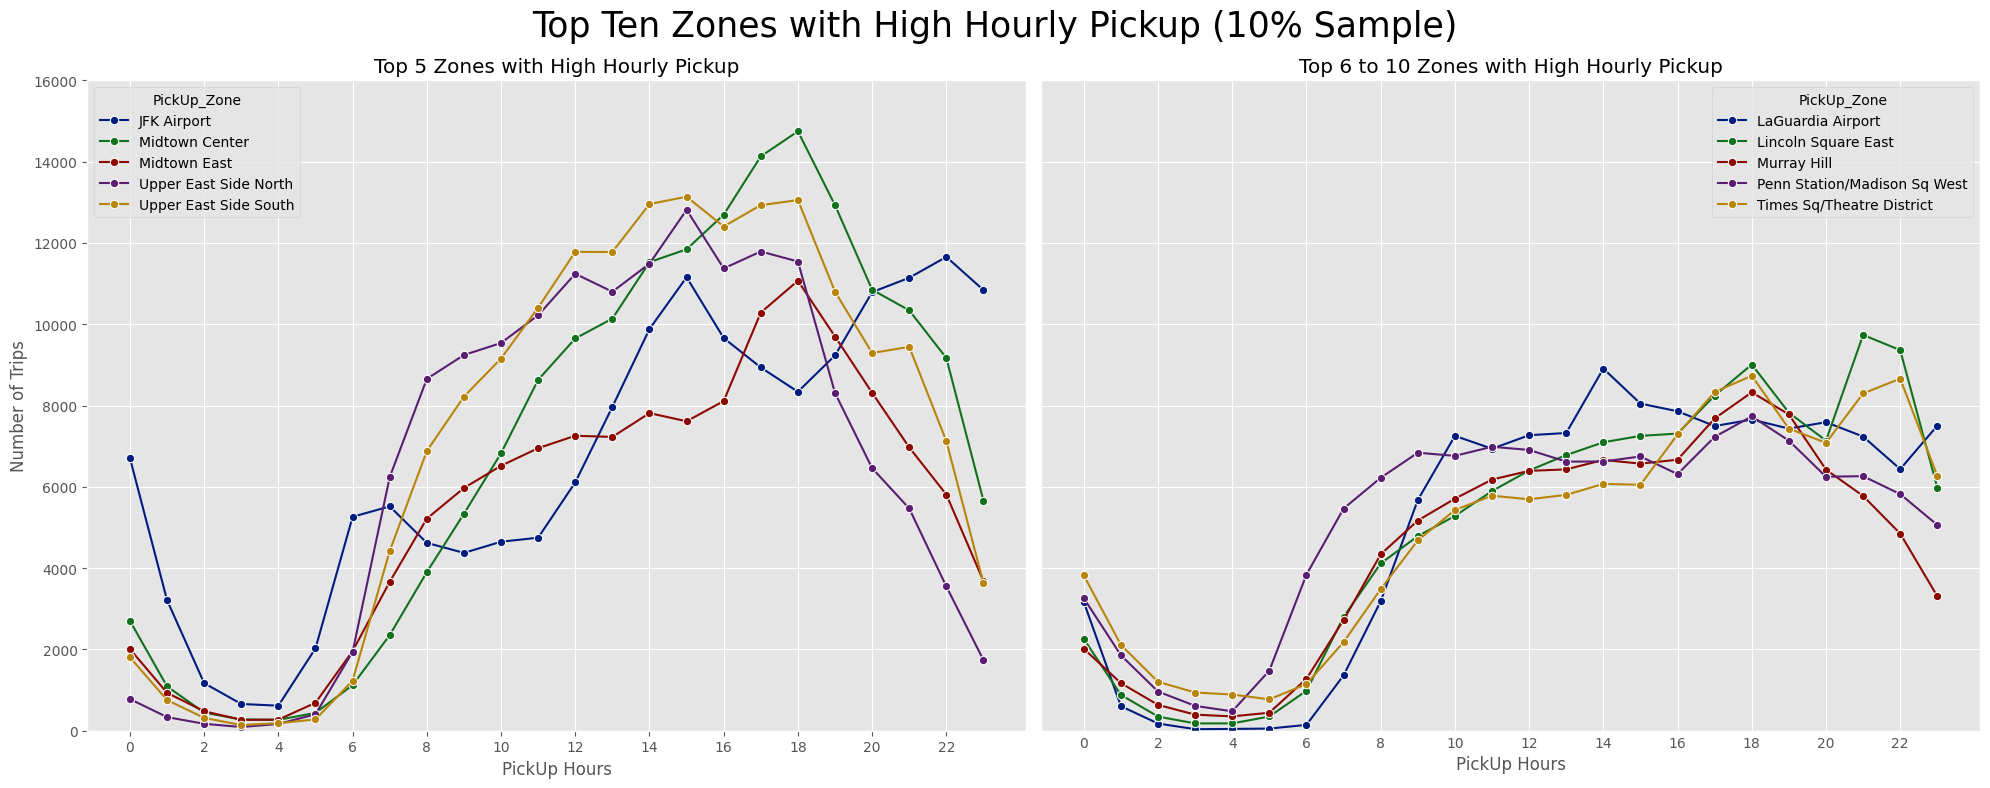

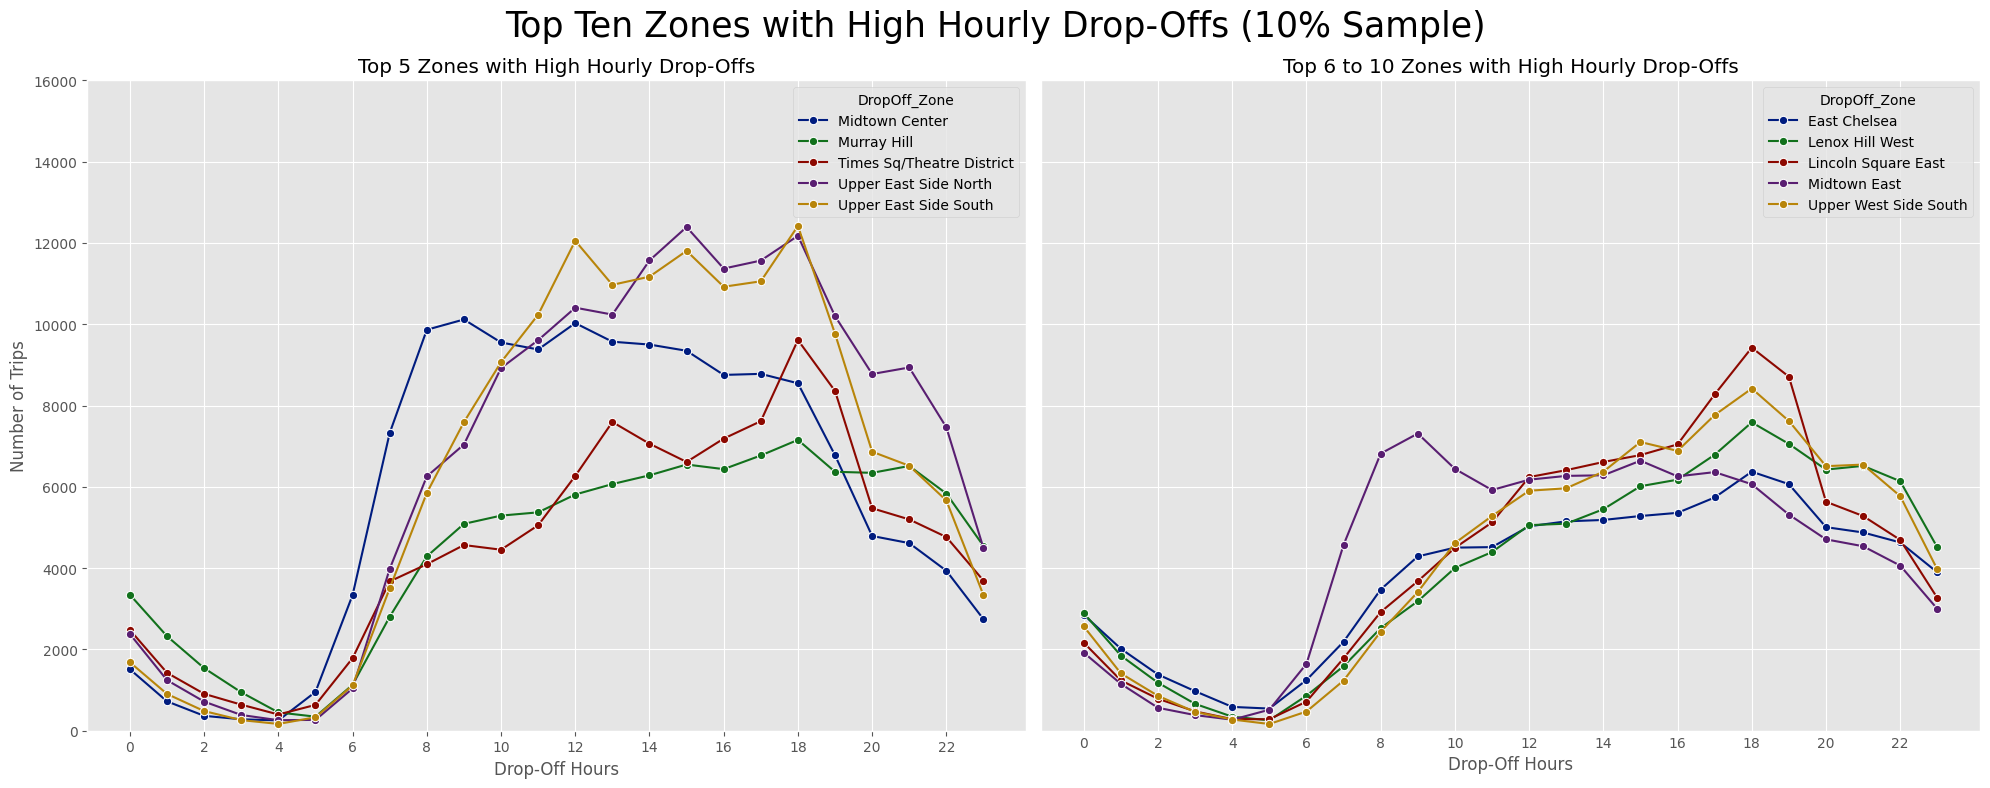

In [256]:
# Figure Size
plt.figure (figsize=(20,8))

# Top 5 Hourly Pickup Zone Trend
ax1 = plt.subplot(1, 2, 1)
sns.lineplot (
            data= top_5_hourly_pickup_zones, 
            x = "PickUp Hours", y = "Number of Trips", 
            hue= "PickUp_Zone", marker = "o", palette = "dark6"
)
plt.title ("Top 5 Zones with High Hourly Pickup")
plt.xlabel ("PickUp Hours")
plt.xticks (range(0,24,2))
plt.ylabel ("Number of Trips")

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Top 6 to 10 Hourly Pickup Zone Trend
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
sns.lineplot (
            data= top_6_to_10_hourly_pickup_zones, 
            x = "PickUp Hours", y = "Number of Trips", 
            hue= "PickUp_Zone", marker = "o", palette = "dark6"
)
plt.title ("Top 6 to 10 Zones with High Hourly Pickup")
plt.xlabel ("PickUp Hours")
plt.xticks (range(0,24,2))
plt.ylabel ("")
plt.ylim (0,16000)
ax2.tick_params (labelleft = False, length= 0)

plt.suptitle("Top Ten Zones with High Hourly Pickup (10% Sample)", fontsize=25) 
plt.tight_layout() 
plt.show()

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Top 5 Hourly Drop-Off Zone Trend
plt.figure (figsize=(20,8))
ax3 = plt.subplot(1, 2, 1)
sns.lineplot (
            data= top_5_hourly_drop_off_zones, 
            x = "DropOff_Hours", y = "Number of Trips", 
            hue= "DropOff_Zone", marker = "o", palette = "dark6"
)
plt.title ("Top 5 Zones with High Hourly Drop-Offs")
plt.xlabel ("Drop-Off Hours")
plt.xticks (range(0,24,2))
plt.ylabel ("Number of Trips")

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Top 6 to 10 Drop-Off Zone Trend
ax4 = plt.subplot(1, 2, 2, sharey=ax3)
sns.lineplot (
            data= top_6_to_10_hourly_drop_off_zones, 
            x = "DropOff_Hours", y = "Number of Trips", 
            hue= "DropOff_Zone", marker = "o", palette = "dark6"
)
plt.title ("Top 6 to 10 Zones with High Hourly Drop-Offs")
plt.xlabel ("Drop-Off Hours")
plt.xticks (range(0,24,2))
plt.ylabel ("")
plt.ylim (0,16000)
ax4.tick_params (labelleft = False, length= 0)

plt.suptitle("Top Ten Zones with High Hourly Drop-Offs (10% Sample)", fontsize=25) 
plt.tight_layout() 
plt.show()


---

#### **3.2.6** Pickup-to-Drop-off Ratio Analysis

The pickup-to-drop-off ratio was calculated for each zone to understand directional demand imbalances. Zones with the highest and lowest ratios were identified, and the top 10 and bottom 10 zones were displayed to highlight areas with significant pickup- or drop-dominant activity.


In [257]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Finding the number of trips per pick up zone and converting it to a dataframe.
pickup_zone_count = merged_df.groupby (["PickUp_Zone"])["PickUp_LocationID"].count()
pickup_zone_df = pd.DataFrame (pickup_zone_count)

# Renaming the columns and Resetting the index.
pickup_zone_df.rename (columns= {"PickUp_LocationID" : "PickUp Number of Trips"}, inplace= True)
pickup_zone_df.reset_index(inplace= True)

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Finding the number of trips per drop zone and converting it to a dataframe.
dropoff_zone_count = merged_df.groupby (["DropOff_Zone"])["DropOff_LocationID"].count()
dropoff_zone_df = pd.DataFrame (dropoff_zone_count)

# Renaming the columns and Resetting the index.
dropoff_zone_df.rename (columns= {"DropOff_LocationID" : "DropOff Number of Trips"}, inplace= True)
dropoff_zone_df.reset_index(inplace= True)

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Merging the data frames created above for further analysis.
final_subset_zone_df = pd.merge (left= pickup_zone_df, right= dropoff_zone_df, left_on= "PickUp_Zone", right_on= "DropOff_Zone", how = "outer")

# Drop rows with missing values.
final_subset_zone_df.dropna(inplace=True)

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Checks if the number of trip is zero for any zone.
if final_subset_zone_df [(final_subset_zone_df ["PickUp Number of Trips"] == 0) | (final_subset_zone_df ["DropOff Number of Trips"] == 0)].empty:
    final_subset_zone_df ["PickUp / Drop-Off Ratios"] = final_subset_zone_df ["PickUp Number of Trips"] / final_subset_zone_df ["DropOff Number of Trips"] 

# Checks if Pickup Zone is equal to Dropoff Zone before dropping and renaming to a single zone column.
if final_subset_zone_df ["PickUp_Zone"].equals (final_subset_zone_df ["DropOff_Zone"]):
    final_subset_zone_df.drop (columns= ["DropOff_Zone","PickUp Number of Trips","DropOff Number of Trips"], inplace=True)
    final_subset_zone_df.rename (columns= {"PickUp_Zone" : "Zones"}, inplace=True)
    
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Top 10 Highest and Lowest Zone's Pickup / Drop=Off Ratio

ten_lowest_ratio_zones = final_subset_zone_df.sort_values (["PickUp / Drop-Off Ratios"], ascending= True)[:10].copy()
ten_highest_ratio_zones = final_subset_zone_df.sort_values (["PickUp / Drop-Off Ratios"], ascending= False)[:10].copy()
ten_lowest_ratio_zones.reset_index(inplace=True, drop=True)
ten_highest_ratio_zones.reset_index(inplace=True, drop=True)

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Ranking for clarity -- Lowest is ranked (Low to High) -- Highest is ranked (High to Low)

ten_lowest_ratio_zones ["Ranked - Lowest to Highest"] = ten_lowest_ratio_zones ["PickUp / Drop-Off Ratios"].rank(ascending=True)
ten_highest_ratio_zones ["Ranked - Highest to Lowest"] = ten_highest_ratio_zones ["PickUp / Drop-Off Ratios"].rank(ascending=False)


In [258]:
# Ranked Lowest to Highest (Pickup / Drop Off Ration)
ten_lowest_ratio_zones


Zones  PickUp / Drop-Off Ratios  \
0          Heartland Village/Todt Hill                  0.018182   
1  Breezy Point/Fort Tilden/Riis Beach                  0.024390   
2                        West Brighton                  0.025641   
3                        Broad Channel                  0.027778   
4            Forest Park/Highland Park                  0.040323   
5                      Windsor Terrace                  0.042889   
6                           Douglaston                  0.051220   
7                           Whitestone                  0.057225   
8              Bay Terrace/Fort Totten                  0.058252   
9  Riverdale/North Riverdale/Fieldston                  0.060377   

   Ranked - Lowest to Highest  
0                         1.0  
1                         2.0  
2                         3.0  
3                         4.0  
4                         5.0  
5                         6.0  
6                         7.0  
7                         8.0  
8                         9.0  
9                        10.0

In [259]:
# Ranked Highest to Lowest (Pickup / Drop Off Ration)
ten_highest_ratio_zones


Zones  PickUp / Drop-Off Ratios  \
0                 East Elmhurst                  8.723669   
1                   JFK Airport                  4.645782   
2             LaGuardia Airport                  2.689409   
3  Penn Station/Madison Sq West                  1.557566   
4       Greenwich Village South                  1.376507   
5                  Central Park                  1.371795   
6                  West Village                  1.341877   
7                  Midtown East                  1.247887   
8              Garment District                  1.195029   
9                Midtown Center                  1.184443   

   Ranked - Highest to Lowest  
0                         1.0  
1                         2.0  
2                         3.0  
3                         4.0  
4                         5.0  
5                         6.0  
6                         7.0  
7                         8.0  
8                         9.0  
9                        10.0

---

#### **3.2.7** Late-Night Zone Demand Analysis

Zones with high pickup and drop-off activity during late-night hours (11:00 PM to 5:00 AM) were identified to analyze overnight travel patterns and locate areas with significant nighttime transportation demand.


In [260]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

In [261]:
# We will use valid hours till 4, we don't want to count anything after 5:00AM

valid_hours = [23, 0, 1, 2, 3, 4]
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Top 15 Zones with High PickUp Traffic During Night Hours

pickup_between_11pm_to_5am = merged_df [merged_df ["PickUp Hours"].isin(valid_hours)].copy()
pickup_between_11pm_to_5am = pickup_between_11pm_to_5am.groupby (["PickUp_Zone"])["PickUp_LocationID"].sum()
pickup_between_11pm_to_5am = pickup_between_11pm_to_5am.sort_values(ascending=False)[:15].copy()
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Top 15 Zones with High Drop-Off Traffic During Night Hours

dropoff_between_11pm_to_5am = merged_df [merged_df ["DropOff_Hours"].isin(valid_hours)].copy()
dropoff_between_11pm_to_5am = dropoff_between_11pm_to_5am.groupby (["DropOff_Zone"])["DropOff_LocationID"].sum()
dropoff_between_11pm_to_5am = dropoff_between_11pm_to_5am.sort_values(ascending=False)[:15].copy()


In [262]:
# Identifying commons zones with high pickup and dropoff for 11pm to 5am.
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
common_zone_names = pickup_between_11pm_to_5am [pickup_between_11pm_to_5am.index.isin (dropoff_between_11pm_to_5am.index)].index

print ("These Zones have high PickUp and Drop-Off traffic during Night Hours (11PM to 5AM)")
print ()
for common in common_zone_names.values:
    print (f"\t{common}")
    

These Zones have high PickUp and Drop-Off traffic during Night Hours (11PM to 5AM)

	West Village
	Times Sq/Theatre District
	Union Sq
	West Chelsea/Hudson Yards
	Yorkville West
	TriBeCa/Civic Center
	Upper East Side South


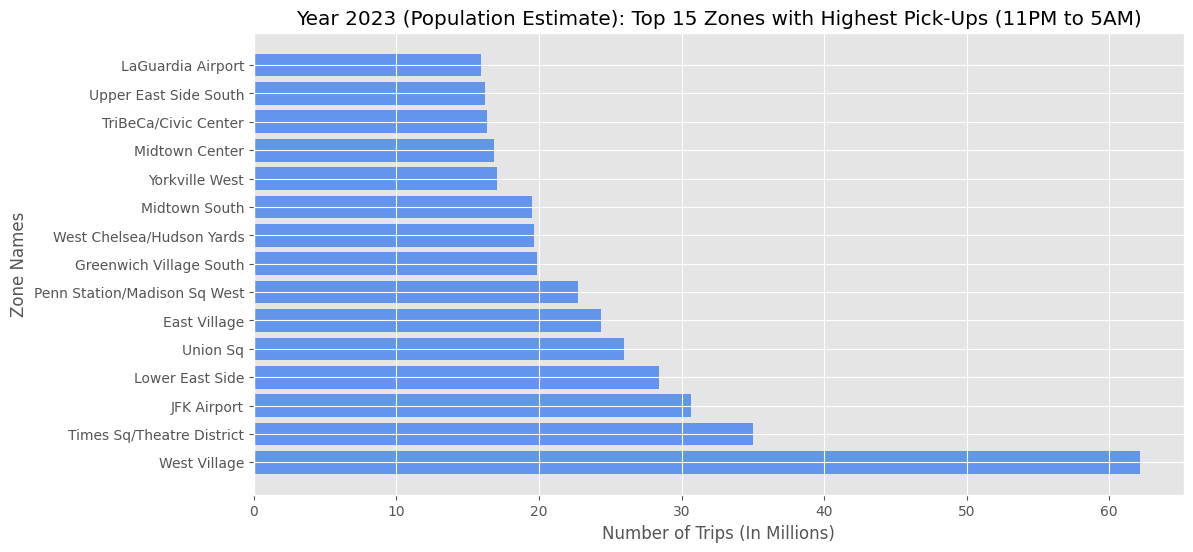

In [263]:
# Plotting a Horizontal Bar : Top 15 Zones with Highest Pick-Ups (11PM to 5AM)
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Finding the sample ratio to estimate the population
sample_ratio = 1/0.10
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
plt.figure (figsize=(12,6))
plt.barh(
    pickup_between_11pm_to_5am.index, 
    pickup_between_11pm_to_5am.values * sample_ratio / 1_000_000,
    height = 0.8,
    zorder = 0,
    color = "cornflowerblue"
)
plt.title ("Year 2023 (Population Estimate): Top 15 Zones with Highest Pick-Ups (11PM to 5AM)")
plt.xlabel("Number of Trips (In Millions)")
plt.ylabel("Zone Names")
plt.show()


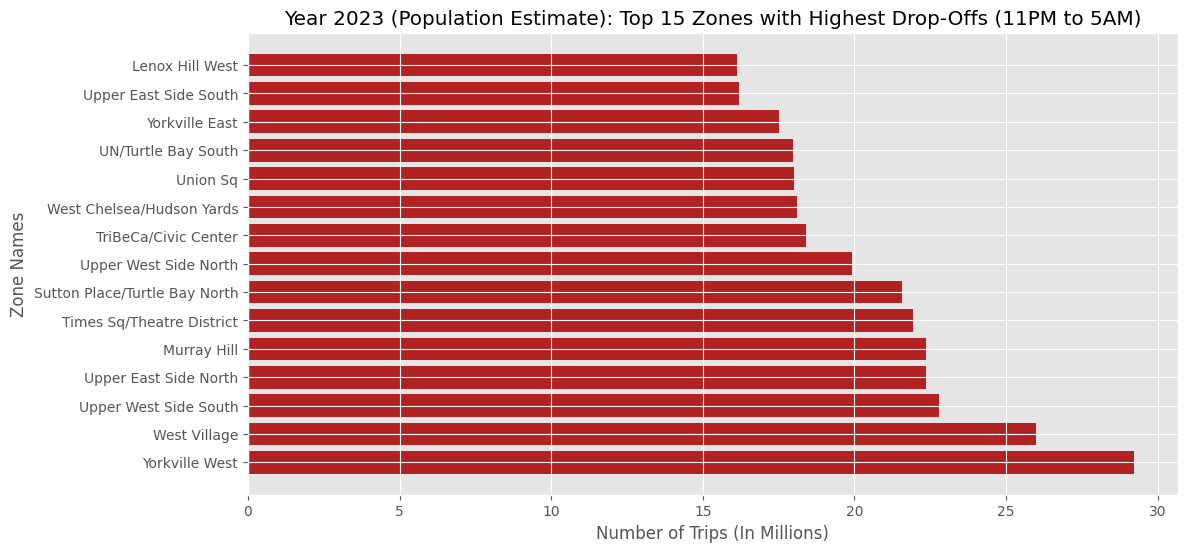

In [264]:
# Plotting a Horizontal Bar : Top 15 Zones with Highest Drop-Offs (11PM to 5AM)
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Finding the sample ratio to estimate the population
sample_ratio = 1/0.10
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
plt.figure (figsize=(12,6))
plt.barh(
    dropoff_between_11pm_to_5am.index, 
    dropoff_between_11pm_to_5am.values * sample_ratio / 1_000_000,
    height = 0.8,
    zorder = 0,
    color = "firebrick"
)
plt.title ("Year 2023 (Population Estimate): Top 15 Zones with Highest Drop-Offs (11PM to 5AM)")
plt.xlabel("Number of Trips (In Millions)")
plt.ylabel("Zone Names")
plt.show()


---

#### **3.2.8** Revenue Share: Nighttime vs Daytime

Revenue contributions from nighttime (11:00 PM–5:00 AM) and daytime hours (5:00 AM–11:00 PM) were calculated to compare earnings across time periods. This analysis helped assess demand behavior and support pricing strategy decisions based on time-of-day revenue patterns.


In [265]:
# Filter for night hours (11 PM to 5 AM)
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Valid Night Hours
valid_night_hours = [23, 0, 1, 2, 3, 4]

# Night Hours Data Frame.
night_hours_df = merged_df [merged_df ["PickUp Hours"].isin(valid_night_hours)].copy()

# Day Hours Data Frame.
day_hours_df = merged_df [~(merged_df ["PickUp Hours"].isin(valid_night_hours))].copy()

# Check if the data is splitted correctly accounting for every trip.
if night_hours_df.shape[0] + day_hours_df.shape[0] == merged_df.shape[0]:
    print ("The Data is splitted correctly into Day time and Night time for further analysis.")
    

The Data is splitted correctly into Day time and Night time for further analysis.


In [266]:
# Day and Night Revenue
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Night Revenue Amount and Percentage
Night_Revenue_Amount = night_hours_df ["Total_Amount"].sum().round().astype("int")
Night_Revenue_Percentage = np.round((night_hours_df ["Total_Amount"].sum() / merged_df ["Total_Amount"].sum()) * 100,2)

# Day Revenue Amount and Percentage
Day_Revenue_Amount = day_hours_df ["Total_Amount"].sum().round().astype("int")
Day_Revenue_Percentage = np.round((day_hours_df ["Total_Amount"].sum() / merged_df ["Total_Amount"].sum()) * 100,2)

print (f"The Revenue Amount Generated for Night Time Hours (11PM to 5AM) : USD {Night_Revenue_Amount:,} i.e. {Night_Revenue_Percentage}%")
print (f"The Revenue Amount Generated for Day Time Hours (5AM to 11PM) : USD {Day_Revenue_Amount:,} i.e. {Day_Revenue_Percentage}%")


The Revenue Amount Generated for Night Time Hours (11PM to 5AM) : USD 11,459,887 i.e. 11.56%
The Revenue Amount Generated for Day Time Hours (5AM to 11PM) : USD 87,700,639 i.e. 88.44%


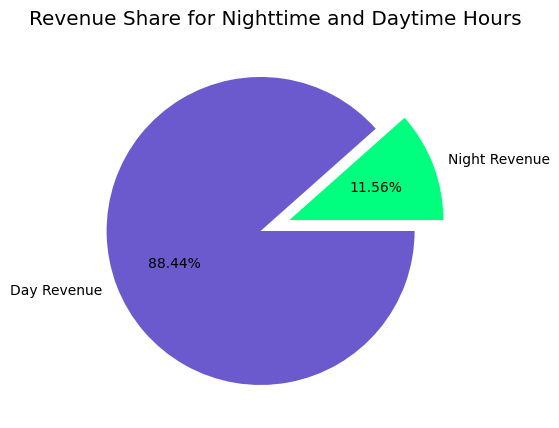

In [267]:
# Plot for Revenue Share for Nighttime and Daytime Hours (Pie-Chart)
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
plt.figure (figsize=(5,5))
plt.pie (
        [Night_Revenue_Amount,Day_Revenue_Amount], 
         labels= ["Night Revenue", "Day Revenue"],
         autopct = '%.2f%%',
         explode= [0.1,0.1],
         colors= ["springgreen", "slateblue"]
)
plt.title("Revenue Share for Nighttime and Daytime Hours")
plt.show ()


---
### Pricing Strategy

---

#### **3.2.9** Fare per Mile per Passenger Analysis

The average fare per mile was calculated for different passenger counts, and then normalized by dividing by the number of passengers. This allowed evaluation of fare efficiency on a per-passenger basis. For example, if a 3-passenger trip averaged USD 3 per mile, the effective fare per passenger was considered USD 1 per mile.


In [268]:
# Analyse the fare per mile per passenger for different passenger counts
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
merged_df ["Fare Per Mile"] = merged_df ["FareAmount"] / merged_df ["TripDistance"]
grouped_fare_per_mile = pd.DataFrame(merged_df.groupby(["PassengerCount"])["Fare Per Mile"].mean())
grouped_fare_per_mile.reset_index(inplace=True)
grouped_fare_per_mile ["Fare Per Mile Per Passenger"] = grouped_fare_per_mile ["Fare Per Mile"] / grouped_fare_per_mile ["PassengerCount"]


In [269]:
grouped_fare_per_mile.round(2)


PassengerCount  Fare Per Mile  Fare Per Mile Per Passenger
0               1           9.58                         9.58
1               2          11.05                         5.53
2               3           9.60                         3.20
3               4          10.14                         2.53
4               5           8.17                         1.63
5               6           8.81                         1.47

---

#### **3.2.10** Average Fare per Mile by Hour and Day

The average fare per mile was calculated across different hours of the day and days of the week to identify pricing and demand patterns. This analysis helped highlight periods where fare efficiency varies based on time-of-day and weekday trends.


In [270]:
# Compare the average fare per mile for different days and for different times of the day

In [271]:
# Deriving a metric for Fare per Mile

merged_df ["Fare Per Mile"] = merged_df ["FareAmount"] / merged_df ["TripDistance"]


In [272]:
# Average Fare Per Mile by Hours of the Day
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
grouped_fare_per_mile_each_hour = pd.DataFrame(merged_df.groupby (["PickUp Hours"])["Fare Per Mile"].mean())
grouped_fare_per_mile_each_hour.reset_index(inplace=True)
grouped_fare_per_mile_each_hour


PickUp Hours  Fare Per Mile
0              0       9.434671
1              1       8.657964
2              2       8.452138
3              3       8.885919
4              4       8.814851
5              5       7.894381
6              6       7.986954
7              7       8.430130
8              8       9.125603
9              9       9.832708
10            10       9.733768
11            11      10.227448
12            12      10.432714
13            13      10.463648
14            14      10.500622
15            15      11.015797
16            16      10.667807
17            17      10.473718
18            18       9.974707
19            19      10.332769
20            20       8.799335
21            21       8.797498
22            22       8.813231
23            23       8.824133

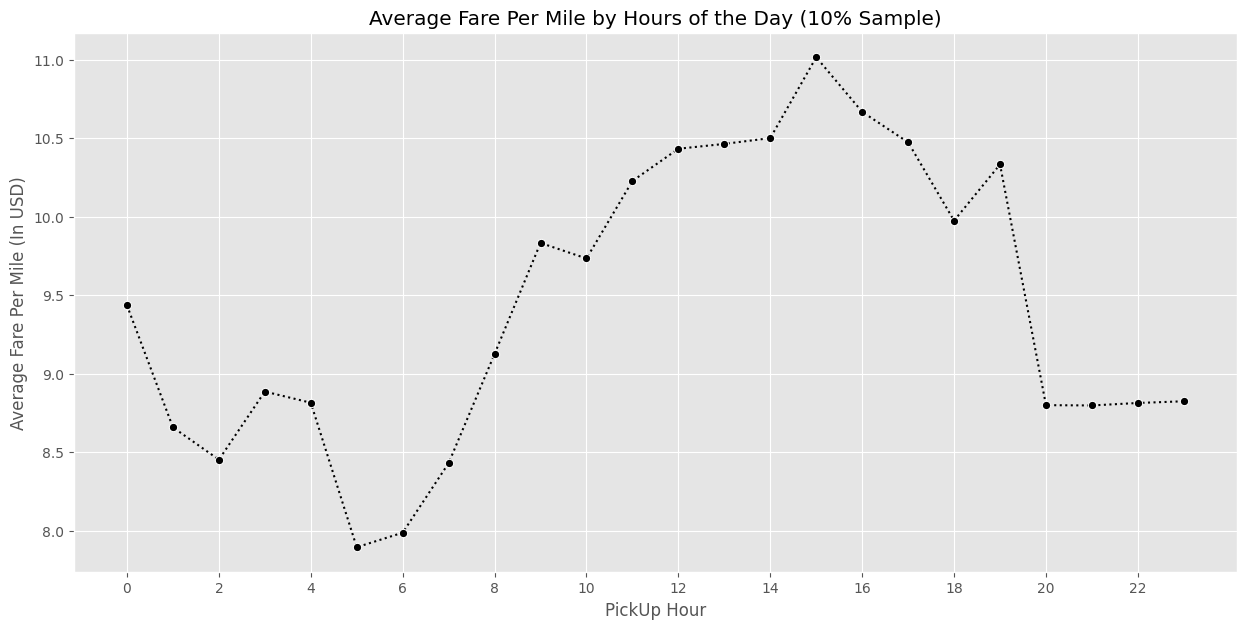

In [273]:
# Visualizing and Comparing Average Fare Per Mile by Hours of the Day
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
plt.figure (figsize=(15,7))
sns.lineplot (
            grouped_fare_per_mile_each_hour, 
            x = "PickUp Hours", y = "Fare Per Mile", 
            marker = "o", ls= ":", color = "black"
)
plt.title ("Average Fare Per Mile by Hours of the Day (10% Sample)")
plt.xlabel ("PickUp Hour")
plt.xticks (range(0,24,2))
plt.ylabel ("Average Fare Per Mile (In USD)")
plt.show()


In [274]:
# Our dictionary creater earlier will be used for mapping
day_of_week


{0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [275]:
# Average Fare Per Mile by Days of the Week
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
grouped_fare_per_mile_per_day = pd.DataFrame(merged_df.groupby(["PickUp Day of Week"])["Fare Per Mile"].mean())
grouped_fare_per_mile_per_day.reset_index(inplace=True)
grouped_fare_per_mile_per_day ["PickUp Day of Week"] = grouped_fare_per_mile_per_day ["PickUp Day of Week"].map(day_of_week)


In [276]:
# Let's view out dataframe before visualizing

grouped_fare_per_mile_per_day


PickUp Day of Week  Fare Per Mile
0                Mon       9.495790
1                Tue       9.891751
2                Wed      10.078951
3                Thu       9.916920
4                Fri       9.808036
5                Sat       9.740939
6                Sun       9.472063

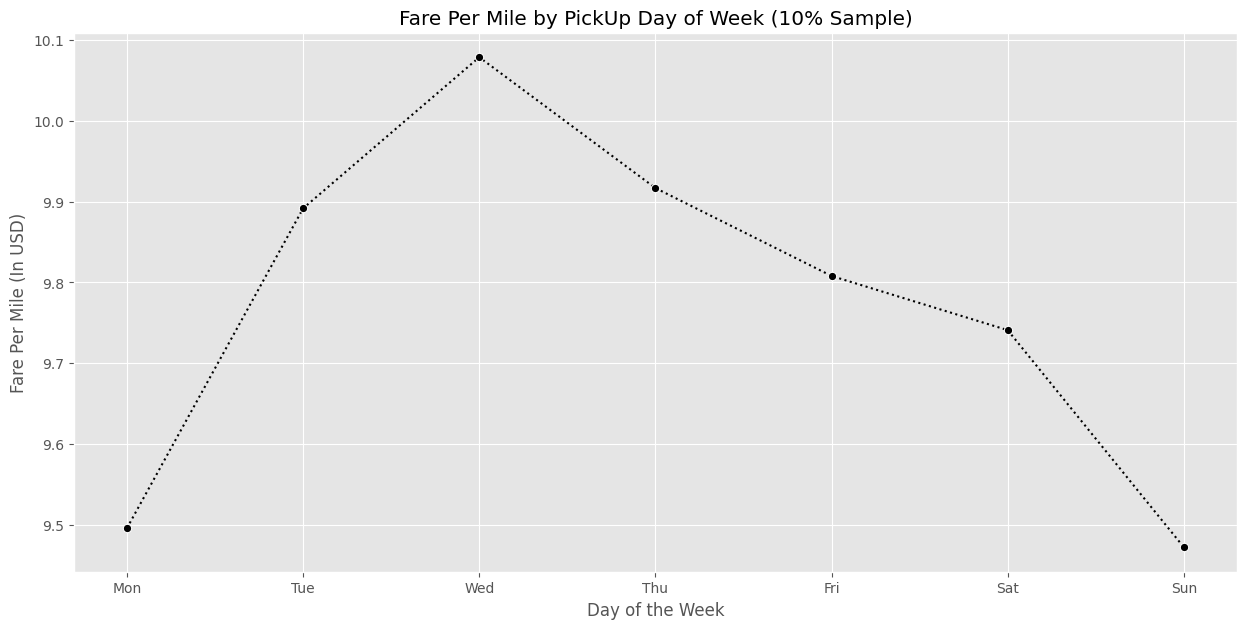

In [277]:
# Visualizing and Comparing Average Fare Per Mile by Day of the Week
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
plt.figure (figsize=(15,7))
sns.lineplot (
            grouped_fare_per_mile_per_day, 
            x = "PickUp Day of Week", y = "Fare Per Mile", 
            marker = "o", ls= ":", color = "black"
)
plt.title ("Fare Per Mile by PickUp Day of Week (10% Sample)")
plt.xlabel ("Day of the Week")
plt.ylabel ("Fare Per Mile (In USD)")
plt.show()


---

#### **3.2.11** Vendor-Wise Fare per Mile by Hour

The average fare per mile was analyzed for each vendor across different hours of the day. This comparison provided insight into vendor-specific pricing patterns and operational differences based on time-of-day demand.


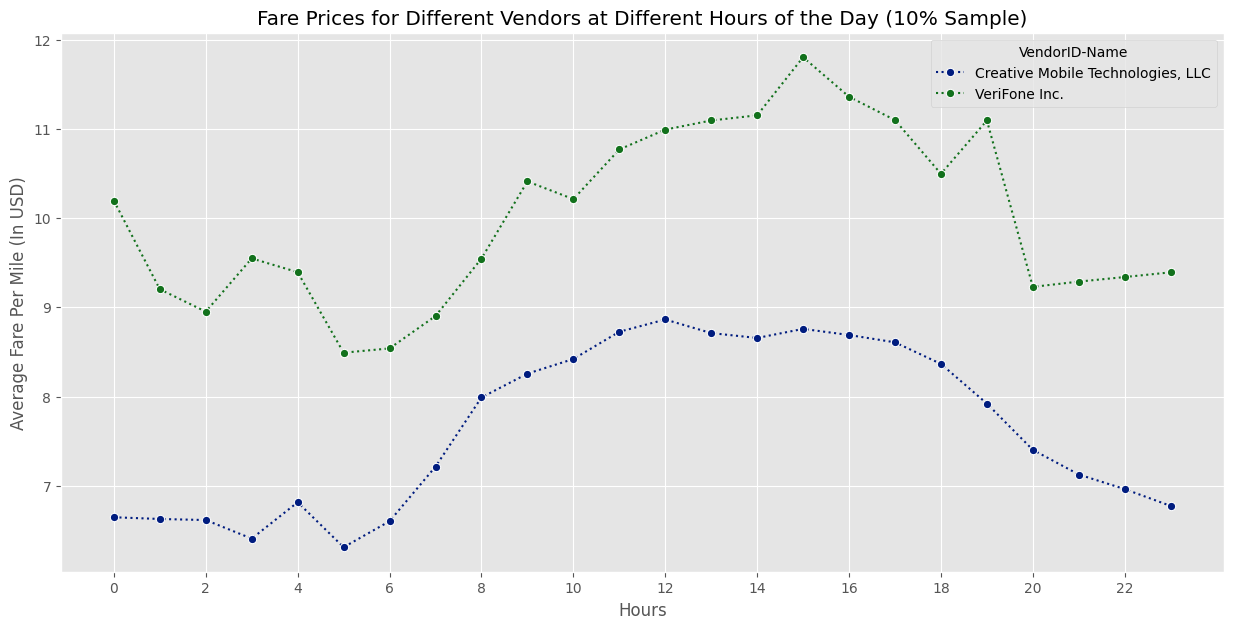

In [278]:
# Compare fare per mile for different vendors
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Finding the Average Fare Per Mile
grouped_vendor_average_fare = pd.DataFrame(merged_df.groupby (["VendorID-Name", "PickUp Hours"])["Fare Per Mile"].mean())
grouped_vendor_average_fare.reset_index(inplace=True)
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
plt.figure (figsize=(15,7))
sns.lineplot (
            grouped_vendor_average_fare, 
            x = "PickUp Hours", y = "Fare Per Mile", 
            hue= "VendorID-Name", marker = "o", ls= ":", palette= "dark6"
)
plt.title ("Fare Prices for Different Vendors at Different Hours of the Day (10% Sample)")
plt.xlabel ("Hours")
plt.xticks (range(0,24,2))
plt.ylabel ("Average Fare Per Mile (In USD)")
plt.show()


---
#### **3.2.12** Tiered Vendor Fare Comparison by Distance

Vendor fare behavior was compared using tiered trip distance buckets. The average fare per mile was analyzed for three distance segments:

- Trips up to 2 miles  
- Trips between 2 and 5 miles  
- Trips longer than 5 miles  

This tiered analysis helped evaluate how fare efficiency and pricing strategies vary across short, medium, and long-distance trips for different vendors.


In [279]:
# Defining distance tiers
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def distance_tiers(distance_rows):
    if distance_rows <= 2:
        return "Short Distance"
    elif distance_rows <= 5:
        return "Medium Distance"
    else:
        return "Long Distance"
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Applying the function and deriving a distance tier feature

merged_df ["Distance Tiers"] = merged_df.TripDistance.apply(distance_tiers)


In [280]:
# Grouping the data by Vendor Name and calculating the average fare per mile
grouped_vendor_distance_fare = pd.DataFrame (merged_df.groupby (["VendorID-Name", "Distance Tiers"])["Fare Per Mile"].mean())

# Resetting the index and viewing the data frame.
grouped_vendor_distance_fare.reset_index(inplace=True)
grouped_vendor_distance_fare


VendorID-Name   Distance Tiers  Fare Per Mile
0  Creative Mobile Technologies, LLC    Long Distance       4.402475
1  Creative Mobile Technologies, LLC  Medium Distance       6.370119
2  Creative Mobile Technologies, LLC   Short Distance       9.721486
3                      VeriFone Inc.    Long Distance       4.471214
4                      VeriFone Inc.  Medium Distance       6.526450
5                      VeriFone Inc.   Short Distance      14.158773

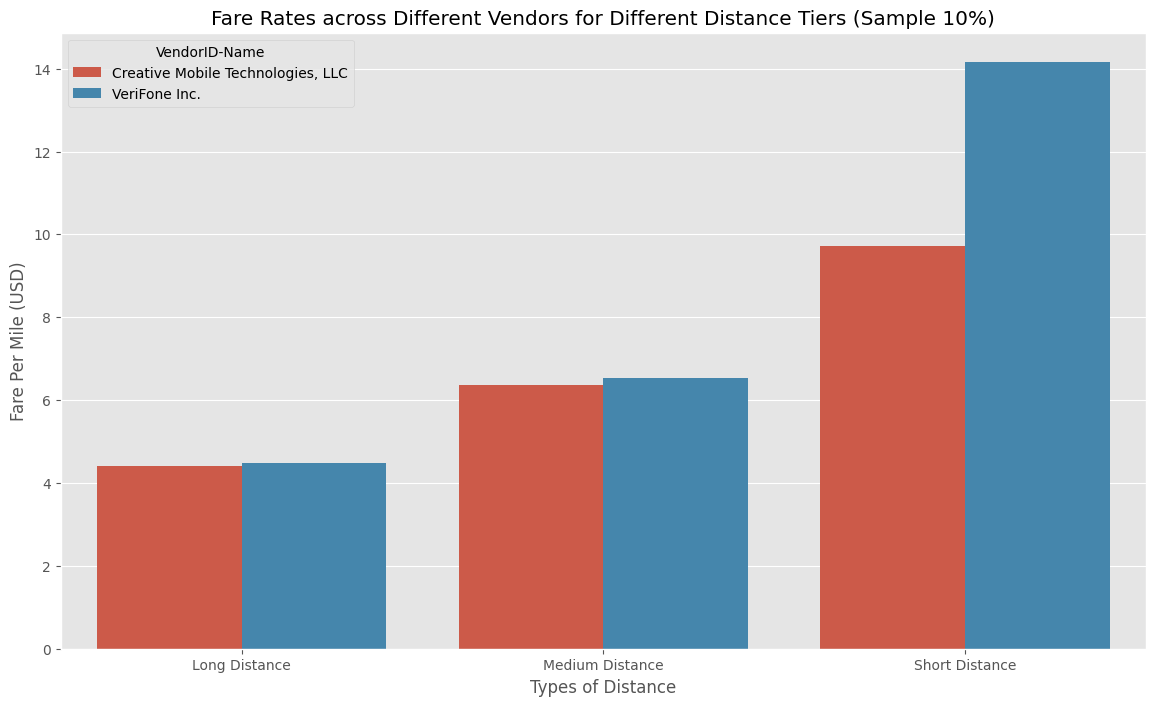

In [281]:
# Comparing how distance tiers affect pricing across vendors.
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
plt.figure(figsize = (14, 8))
sns.barplot(
            data = grouped_vendor_distance_fare,
            x =  "Distance Tiers",
            y = "Fare Per Mile",
            hue = "VendorID-Name"
)
plt.xlabel("Types of Distance")
plt.ylabel("Fare Per Mile (USD)")
plt.title("Fare Rates across Different Vendors for Different Distance Tiers (Sample 10%)")
plt.show()


---
### Customer Experience and Other Factors
---

#### **3.2.13** Tip Percentage Analysis

Average tip percentages were analyzed based on trip distance, passenger count, and pickup time. This helped identify patterns in tipping behavior and understand factors associated with lower tip percentages.


In [282]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

In [283]:
# Making a column / derived metric for tip percentage.

merged_df ["Tip_Percentage"] = np.round (merged_df ["TipAmount"] / merged_df ["FareAmount"] * 100, 2)


In [284]:
# Relation between tip percentage and distance.

merged_df.groupby (["Distance Tiers"])["Tip_Percentage"].mean().round(2)


Distance Tiers
Long Distance      15.74
Medium Distance    18.55
Short Distance     22.13
Name: Tip_Percentage, dtype: float64

In [285]:
# Relation between tip percentage and passenger count.

merged_df.groupby (["PassengerCount"])["Tip_Percentage"].mean().round(2)


PassengerCount
1    20.32
2    19.56
3    18.94
4    17.24
5    20.41
6    20.38
Name: Tip_Percentage, dtype: float64

In [286]:
# Bucketing Time for better analysis in groups
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def time_bucket (hour_row):
    
    night_list = [23,0,1,2,3,4]
    day_list = [5,6,7,8,9,10,11]
    afternoon_list = [12,13,14,15,16]
    evening_list = [17,18,19,20,21,22]
    
    if hour_row in night_list:
        return "Night Time"
    elif hour_row in day_list:
        return "Day Time"
    elif hour_row in afternoon_list:
        return "Afternoon"
    elif hour_row in evening_list:
        return "Evening"

# Deriving a column with the help of our function

merged_df ["Time_Bucket"] = merged_df ["PickUp Hours"].apply(time_bucket)


In [287]:
# Relation between tip percentage and time.

merged_df.groupby (["Time_Bucket"])["Tip_Percentage"].mean().round(2)


Time_Bucket
Afternoon     19.15
Day Time      19.16
Evening       21.46
Night Time    19.94
Name: Tip_Percentage, dtype: float64

In [288]:
# Average tip percentages based on trip distances, passenger counts and time of pickup.
merged_df.groupby (["Distance Tiers","PassengerCount","Time_Bucket"])["Tip_Percentage"].mean().unstack()


Time_Bucket                     Afternoon   Day Time    Evening  Night Time
Distance Tiers  PassengerCount                                             
Long Distance   1               15.904801  15.376534  16.799198   15.435865
                2               14.903439  15.245443  15.418648   15.402521
                3               14.117352  14.466788  14.595179   14.631973
                4               12.663502  13.114381  12.581632   13.435600
                5               15.975549  15.764493  16.948976   15.592551
                6               16.109251  15.851875  16.531482   15.448750
Medium Distance 1               17.657506  17.604467  19.863361   18.785725
                2               17.199918  17.131978  19.616289   19.193026
                3               16.621448  16.303062  18.763678   18.611884
                4               15.130393  15.639537  16.876218   18.001584
                5               17.703596  17.585912  19.718496   19.067175
                6               17.813780  17.747992  20.621047   19.735718
Short Distance  1               21.090258  21.205374  24.096735   22.884757
                2               19.991500  20.046181  23.048055   23.259721
                3               19.504504  20.115859  22.093021   22.517425
                4               17.621605  18.873975  20.034167   21.751971
                5               21.151166  21.309932  24.007172   22.938300
                6               20.848718  21.336256  24.215409   23.478693

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [289]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
low_tips_df = merged_df [merged_df ["Tip_Percentage"] < 10].copy()
high_tips_df = merged_df [merged_df ["Tip_Percentage"] > 25].copy()


In [290]:
# Relation between Low and High Tip Percentage and Distance Tiers.
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
low_tip_distance_df = pd.DataFrame (low_tips_df.groupby (["Distance Tiers"])["Tip_Percentage"].mean().round(2))
low_tip_distance_df.rename (columns= {"Tip_Percentage" : "Average Low Tip Percent"}, inplace= True)

high_tip_distance_df = pd.DataFrame (high_tips_df.groupby (["Distance Tiers"])["Tip_Percentage"].mean().round(2))
high_tip_distance_df.rename (columns= {"Tip_Percentage" : "Average High Tip Percent"}, inplace= True)

final_tip_distance_compare = low_tip_distance_df.join(high_tip_distance_df)
final_tip_distance_compare


Average Low Tip Percent  Average High Tip Percent
Distance Tiers                                                    
Long Distance                       1.23                     29.02
Medium Distance                     1.61                     28.82
Short Distance                      0.76                     32.79

In [291]:
# Relation between Low and High Tip Percentage and Passenger Count.
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
low_tip_passenger_df = pd.DataFrame (low_tips_df.groupby (["PassengerCount"])["Tip_Percentage"].mean().round(2))
low_tip_passenger_df.rename (columns= {"Tip_Percentage" : "Average Low Tip Percent"}, inplace= True)

high_tip_passenger_df = pd.DataFrame (high_tips_df.groupby (["PassengerCount"])["Tip_Percentage"].mean().round(2))
high_tip_passenger_df.rename (columns= {"Tip_Percentage" : "Average High Tip Percent"}, inplace= True)

final_tip_passenger_compare = low_tip_passenger_df.join(high_tip_passenger_df)
final_tip_passenger_compare


Average Low Tip Percent  Average High Tip Percent
PassengerCount                                                   
1                                  1.14                     31.70
2                                  0.97                     31.49
3                                  0.84                     31.37
4                                  0.61                     31.32
5                                  1.07                     31.66
6                                  1.07                     31.62

In [292]:
# Relation between Low and High Tip Percentage and Time.
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
low_tip_time_bucket_df = pd.DataFrame (low_tips_df.groupby (["Time_Bucket"])["Tip_Percentage"].mean().round(2))
low_tip_time_bucket_df.rename (columns= {"Tip_Percentage" : "Average Low Tip Percent"}, inplace= True)

high_tip_time_bucket_df = pd.DataFrame (high_tips_df.groupby (["Time_Bucket"])["Tip_Percentage"].mean().round(2))
high_tip_time_bucket_df.rename (columns= {"Tip_Percentage" : "Average High Tip Percent"}, inplace= True)

final_tip_time_bucket_compare = low_tip_time_bucket_df.join(high_tip_time_bucket_df)
final_tip_time_bucket_compare


Average Low Tip Percent  Average High Tip Percent
Time_Bucket                                                   
Afternoon                       0.95                     31.19
Day Time                        1.04                     30.90
Evening                         1.20                     32.34
Night Time                      1.24                     31.66

---

#### **3.2.14** Passenger Count Variation Analysis

Passenger count patterns were analyzed across different hours of the day and days of the week to observe how rider occupancy varies over time.


In [293]:
# See how passenger count varies across hours and days of the week
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Total passengers based on hour of the day

total_passengers_by_hour = pd.DataFrame (merged_df.groupby(["PickUp Hours"])["PassengerCount"].sum())
total_passengers_by_hour.reset_index (inplace=True)
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Total passengers based on day of the week

total_passengers_by_day_of_week = pd.DataFrame (merged_df.groupby(["PickUp Day of Week"])["PassengerCount"].sum())
total_passengers_by_day_of_week.reset_index (inplace=True)
total_passengers_by_day_of_week ["PickUp Day of Week"] = total_passengers_by_day_of_week ["PickUp Day of Week"].map(day_of_week)


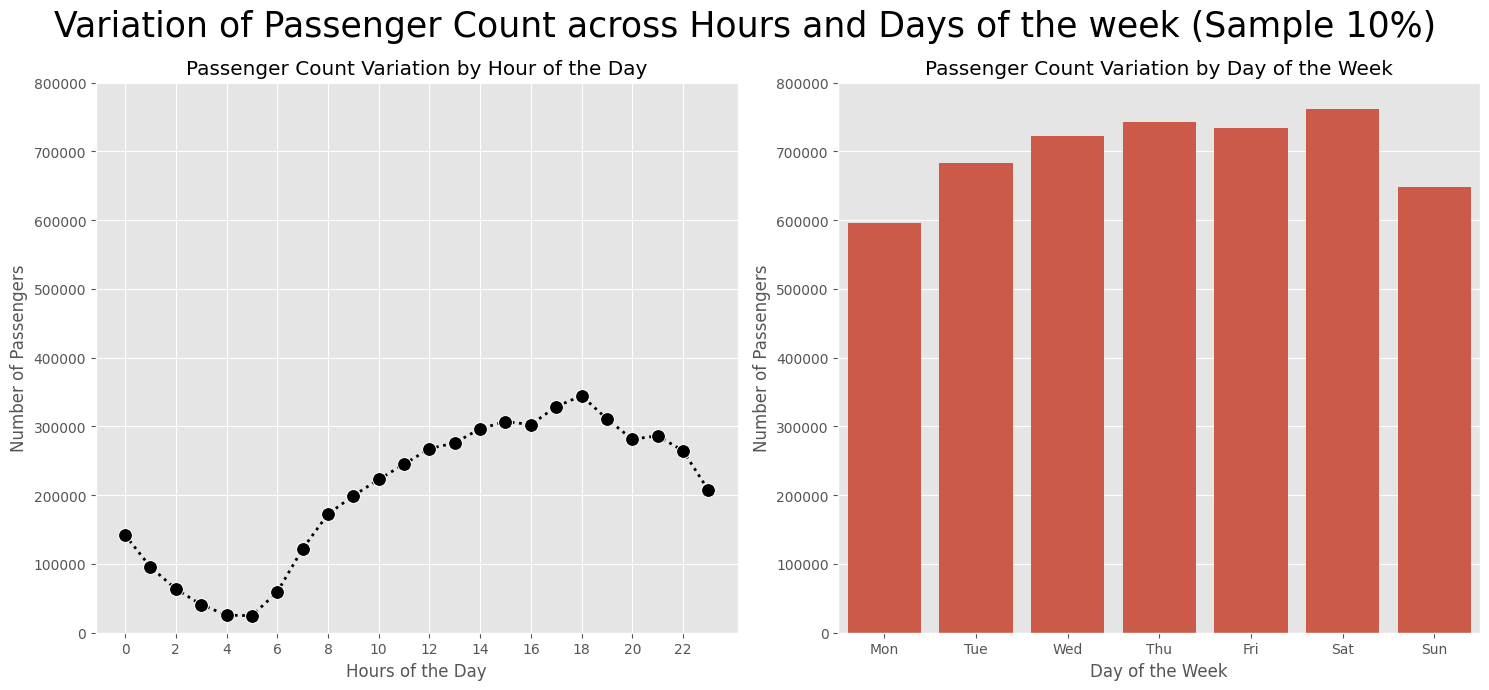

In [294]:
# Passenger Count by Hour of the day

plt.figure (figsize=(15,7))
ax1 = plt.subplot (1,2,1)
sns.lineplot (
            total_passengers_by_hour, 
            x = "PickUp Hours", y = "PassengerCount", 
            marker = "o", ls= ":", color = "black",
            markersize = 10, lw = 2
)
plt.title ("Passenger Count Variation by Hour of the Day")
plt.xlabel ("Hours of the Day")
plt.xticks (range(0,24,2))
plt.ylabel ("Number of Passengers")

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Passenger Count by Day of the Week

ax2 = plt.subplot (1,2,2, sharey= ax1)
sns.barplot (
            total_passengers_by_day_of_week, 
            x = "PickUp Day of Week", y = "PassengerCount",
)
plt.title ("Passenger Count Variation by Day of the Week")
plt.xlabel ("Day of the Week")
plt.ylabel ("Number of Passengers")

plt.suptitle("Variation of Passenger Count across Hours and Days of the week (Sample 10%)", fontsize=25) 
plt.tight_layout() 
plt.show()


---
#### **3.2.15** Passenger Count Variation Across Zones

Passenger counts were analyzed across different zones to understand how rider volume varies by location.


In [295]:
# How does passenger count vary across zones
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Total number of Passenger's by Pickup Zone

total_passengers_by_pickup_zones = pd.DataFrame (merged_df.groupby(["PickUp_Zone"])["PassengerCount"].sum())
total_passengers_by_pickup_zones.reset_index (inplace=True)
total_passengers_by_pickup_zones.sort_values (by= "PassengerCount", inplace= True)
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Total number of Passenger's by Drop-Off Zone

total_passengers_by_dropoff_zones = pd.DataFrame (merged_df.groupby(["DropOff_Zone"])["PassengerCount"].sum())
total_passengers_by_dropoff_zones.reset_index (inplace=True)
total_passengers_by_dropoff_zones.sort_values (by= "PassengerCount", inplace= True)


In [296]:
# Creating subsets of our data for better visualization
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Top ten pickup zones with highest and lowest count
top_ten_pickup_zones_lowest_count = total_passengers_by_pickup_zones[:10].copy()
top_ten_pickup_zones_highest_count = total_passengers_by_pickup_zones.tail(10).copy()

# Top ten drop off zones with highest and lowest count
top_ten_dropoff_zones_lowest_count = total_passengers_by_dropoff_zones [:10].copy()
top_ten_dropoff_zones_highest_count = total_passengers_by_dropoff_zones.tail(10).copy()


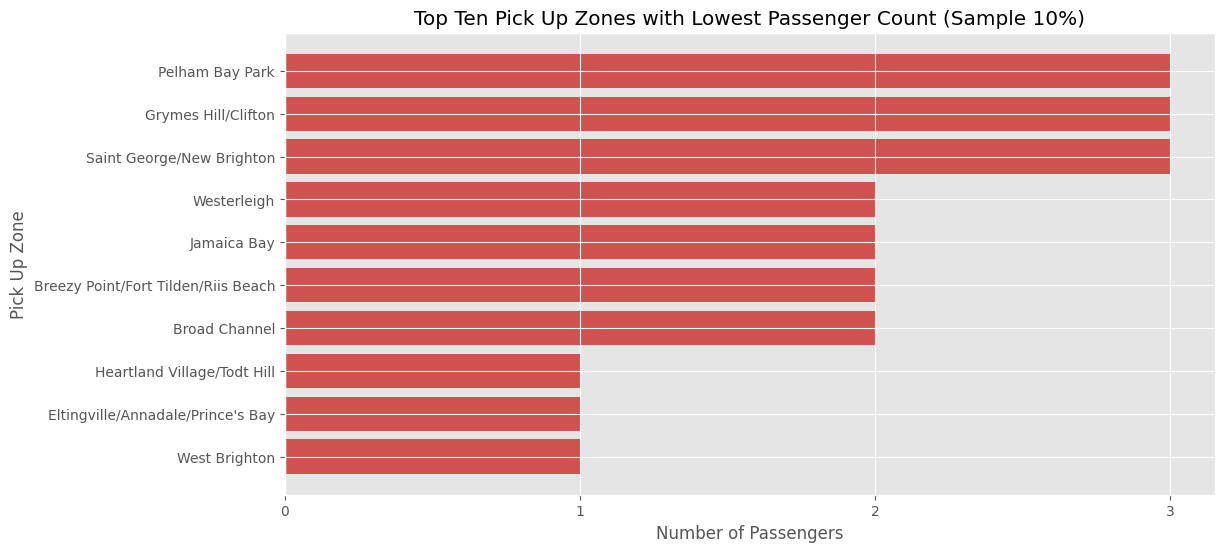

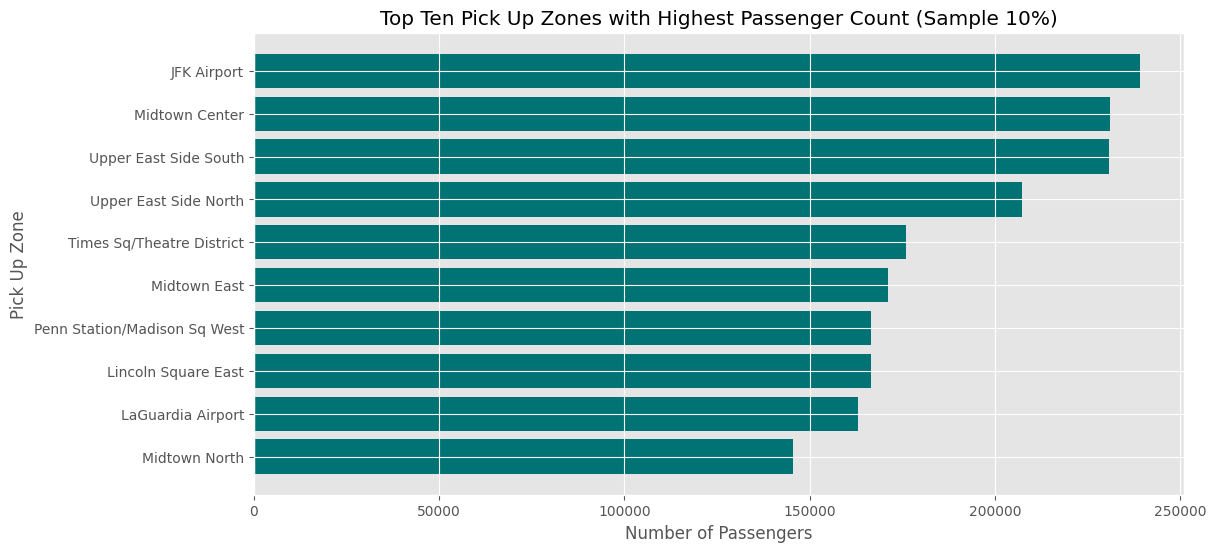

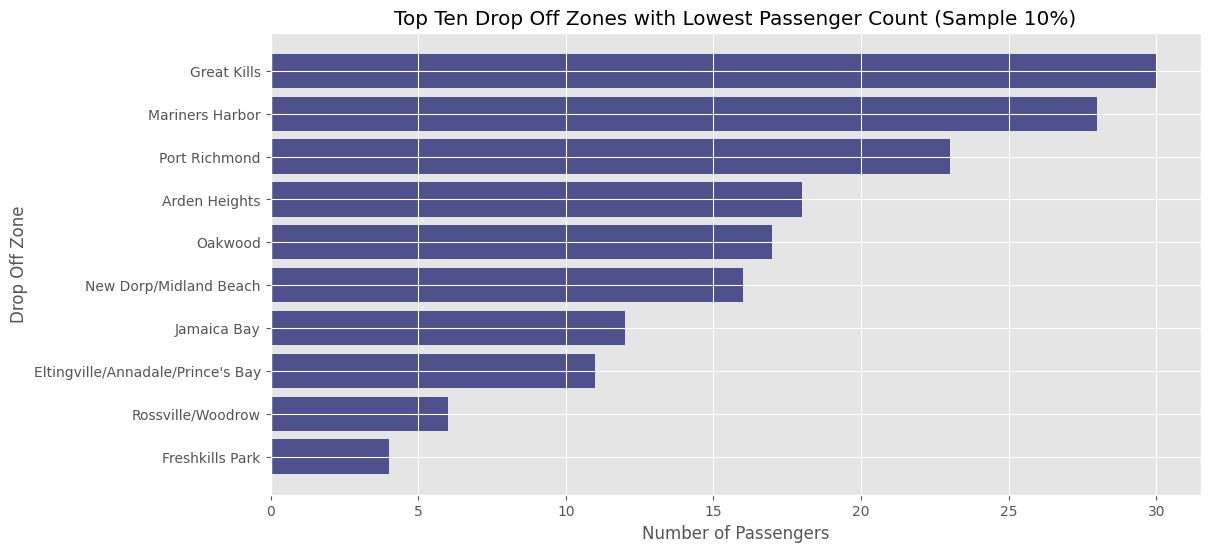

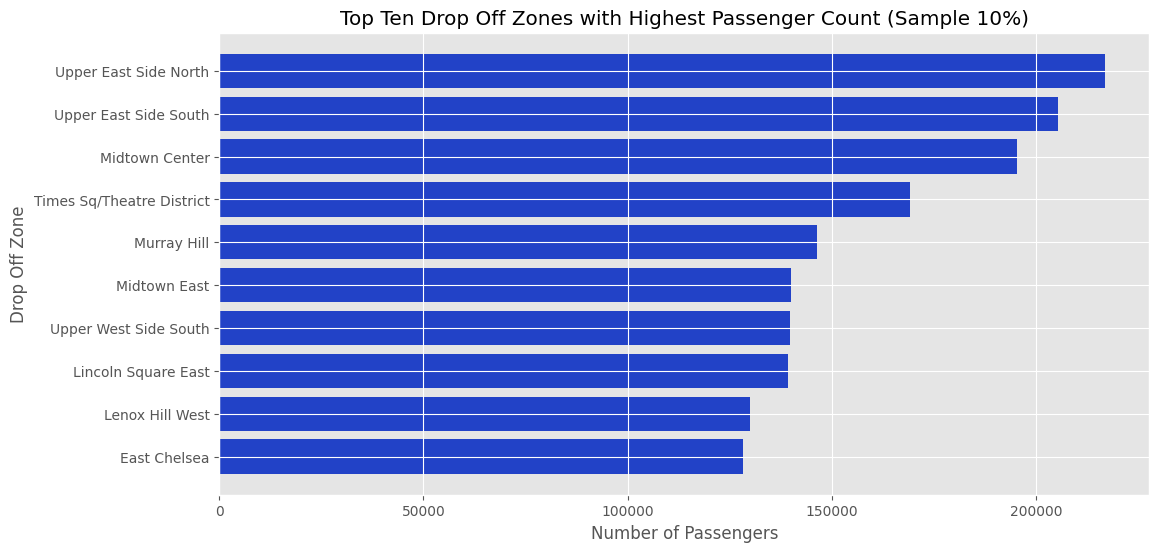

In [297]:
# Note : These analysis are based on our sample data that is 10% but will hold true for the population
# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Top Ten Pick Up Zones with Lowest Passenger Count

plt.figure (figsize=(12,6))
plt.barh(
    top_ten_pickup_zones_lowest_count ["PickUp_Zone"], 
    top_ten_pickup_zones_lowest_count ["PassengerCount"],
    height = 0.8,
    zorder = 0,
    color = "xkcd:dark coral"
)
plt.title ("Top Ten Pick Up Zones with Lowest Passenger Count (Sample 10%)")
plt.xlabel("Number of Passengers")
plt.xticks(range(0,4))
plt.ylabel("Pick Up Zone")
plt.show()

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Top Ten Pick Up Zones with Highest Passenger Count

plt.figure (figsize=(12,6))
plt.barh(
    top_ten_pickup_zones_highest_count ["PickUp_Zone"], 
    top_ten_pickup_zones_highest_count ["PassengerCount"],
    height = 0.8,
    zorder = 0,
    color = "xkcd:deep turquoise"
)
plt.title ("Top Ten Pick Up Zones with Highest Passenger Count (Sample 10%)")
plt.xlabel("Number of Passengers")
plt.ylabel("Pick Up Zone")
plt.ticklabel_format(style= "plain", axis="x")
plt.show()

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Top Ten Drop Off Zones with Lowest Passenger Count

plt.figure (figsize=(12,6))
plt.barh(
    top_ten_dropoff_zones_lowest_count ["DropOff_Zone"], 
    top_ten_dropoff_zones_lowest_count ["PassengerCount"],
    height = 0.8,
    zorder = 0,
    color = "xkcd:twilight"
)
plt.title ("Top Ten Drop Off Zones with Lowest Passenger Count (Sample 10%)")
plt.xlabel("Number of Passengers")
plt.ylabel("Drop Off Zone")
plt.ticklabel_format(style= "plain", axis="x")
plt.show()

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Top Ten Drop Off Zones with Highest Passenger Count

plt.figure (figsize=(12,6))
plt.barh(
    top_ten_dropoff_zones_highest_count ["DropOff_Zone"], 
    top_ten_dropoff_zones_highest_count ["PassengerCount"],
    height = 0.8,
    zorder = 0,
    color = "xkcd:blue blue"
)
plt.title ("Top Ten Drop Off Zones with Highest Passenger Count (Sample 10%)")
plt.xlabel("Number of Passengers")
plt.ylabel("Drop Off Zone")
plt.ticklabel_format(style= "plain", axis="x")
plt.show()


#### **3.2.16** Extra Charge Frequency Analysis

The frequency of surcharges and extra charges was analyzed to understand their prevalence. Pickup and drop-off zones with higher occurrences of extra charges were identified to determine where these charges are applied more frequently.


In [298]:
# Creating a copy with only the columns we need to perform a surcharge analysis.
surcharge_df = merged_df [["PickUp_Zone", "DropOff_Zone", "PickUp Hours", "PickUp Day of Week", "Miscellaneous/Extras", "TollAmount", "ImprovementSurcharge", "CongestionSurcharge", "Airport Fee"]].copy()


In [299]:
# Statistical summary of our surcharge df
surcharge_df.describe().round(2).T


count   mean   std  min   25%   50%   75%    max
PickUp Hours          3545647.0  14.29  5.81  0.0  11.0  15.0  19.0  23.00
PickUp Day of Week    3545647.0   3.00  1.93  0.0   1.0   3.0   5.0   6.00
Miscellaneous/Extras  3545647.0   1.57  1.80  0.0   0.0   1.0   2.5  14.25
TollAmount            3545647.0   0.47  1.72  0.0   0.0   0.0   0.0  14.75
ImprovementSurcharge  3545647.0   1.00  0.01  0.3   1.0   1.0   1.0   1.00
CongestionSurcharge   3545647.0   2.35  0.59  0.0   2.5   2.5   2.5   2.50
Airport Fee           3545647.0   0.13  0.44  0.0   0.0   0.0   0.0   1.75

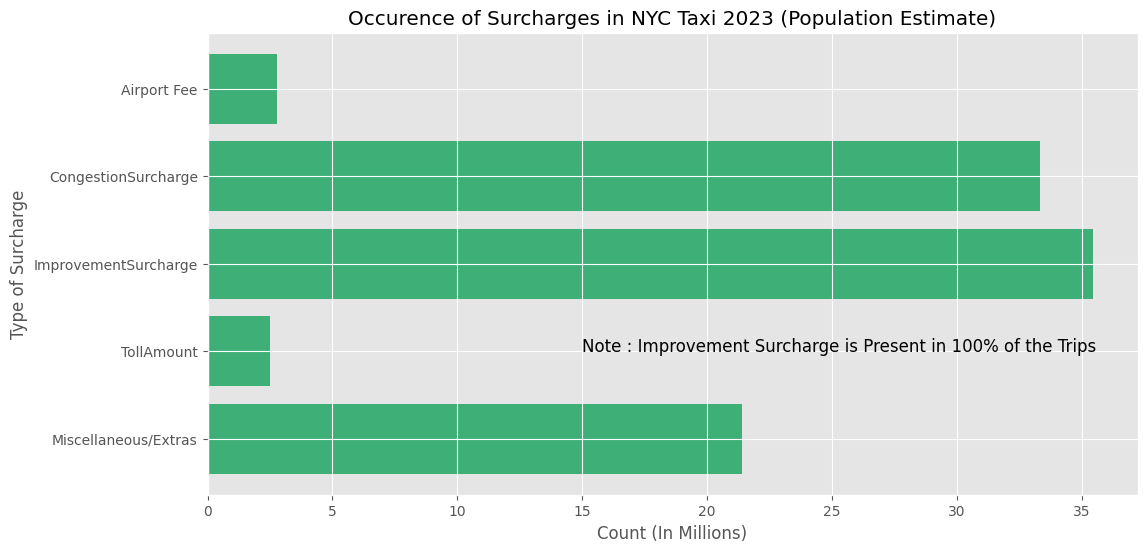

In [300]:
# How often is each surcharge applied?
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Most Commonly Occuring Surcharge
commonly_occuring = surcharge_df [surcharge_df != 0][["Miscellaneous/Extras", "TollAmount", "ImprovementSurcharge", "CongestionSurcharge", "Airport Fee"]].count()

# Estimating Population count
sample_ratio = 1 / 0.10

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
plt.figure (figsize=(12,6))
plt.barh(
    commonly_occuring.index, 
    (commonly_occuring.values * sample_ratio) / 1_000_000,
    height = 0.8,
    zorder = 0,
    color = "xkcd:dark seafoam green"
)
plt.title ("Occurence of Surcharges in NYC Taxi 2023 (Population Estimate)")
plt.xlabel("Count (In Millions)")
plt.ticklabel_format(style= "plain", axis="x")
plt.ylabel("Type of Surcharge")
plt.text(15, 1, "Note : Improvement Surcharge is Present in 100% of the Trips", fontsize = 12)
plt.show()


In [301]:
# Creating a copy where surcharge isn't zero
subset_surcharge_df = surcharge_df[surcharge_df != 0].copy()


In [302]:
# Note : Improvement surcharge isn't going to be a part of our further analysis since it is present in all the trips.
# Percentage Form : Count of Surcharge's for each zone  / Total Count of Trips for each zone 
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Analyzing surcharge based on Pickup and Drop-off zones
pickup_zone_surcharge_frequency = round (subset_surcharge_df.groupby (["PickUp_Zone"])[["Miscellaneous/Extras", "TollAmount", "CongestionSurcharge", "Airport Fee"]].count() / surcharge_df.groupby (["PickUp_Zone"])[["Miscellaneous/Extras", "TollAmount", "CongestionSurcharge", "Airport Fee"]].count() * 100, 2)
dropoff_zone_surcharge_frequency = round (subset_surcharge_df.groupby (["DropOff_Zone"])[["Miscellaneous/Extras", "TollAmount", "CongestionSurcharge", "Airport Fee"]].count() / surcharge_df.groupby (["DropOff_Zone"])[["Miscellaneous/Extras", "TollAmount", "CongestionSurcharge", "Airport Fee"]].count() * 100, 2)

# Subset for Airport Zones -- Airport Fees only applied at PickUp
airport_surcharge_pickup_zone_frequency = pickup_zone_surcharge_frequency [pickup_zone_surcharge_frequency ["Airport Fee"] != 0]


In [303]:
# Only 2 zones have Airport Fees.
airport_surcharge_pickup_zone_frequency 


Miscellaneous/Extras  TollAmount  CongestionSurcharge  \
PickUp_Zone                                                                
JFK Airport                       47.18       46.65                49.55   
LaGuardia Airport                 98.81       64.68                64.98   

                   Airport Fee  
PickUp_Zone                     
JFK Airport              100.0  
LaGuardia Airport        100.0

In [304]:
# Note : Airport Fee isn't going to be a part of our further analysis since it isn't present in all the trips.
# Percentage Form : Count of Surcharge's for each zone  / Total Count of Trips for each zone 
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
pickup_zone_surcharge_frequency = round (subset_surcharge_df.groupby (["PickUp_Zone"])[["Miscellaneous/Extras", "TollAmount", "CongestionSurcharge"]].count() / surcharge_df.groupby (["PickUp_Zone"])[["Miscellaneous/Extras", "TollAmount", "CongestionSurcharge"]].count() * 100, 2)
dropoff_zone_surcharge_frequency = round (subset_surcharge_df.groupby (["DropOff_Zone"])[["Miscellaneous/Extras", "TollAmount", "CongestionSurcharge"]].count() / surcharge_df.groupby (["DropOff_Zone"])[["Miscellaneous/Extras", "TollAmount", "CongestionSurcharge"]].count() * 100, 2)


In [305]:
# Analyzing Congestion Surcharge
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
top_congestion_list = pickup_zone_surcharge_frequency ["CongestionSurcharge"] [pickup_zone_surcharge_frequency ["CongestionSurcharge"] > 90].index.tolist()

borough_congestion = merged_df [merged_df["DropOff_Zone"].isin(top_congestion_list)]["DropOff_Borough"].unique()

for names in borough_congestion:
    print (f"The Top Congestion Zones are From these Boroughs : {borough_congestion}")
    break
    

The Top Congestion Zones are From these Boroughs : ['Manhattan' 'Queens' 'Staten Island']


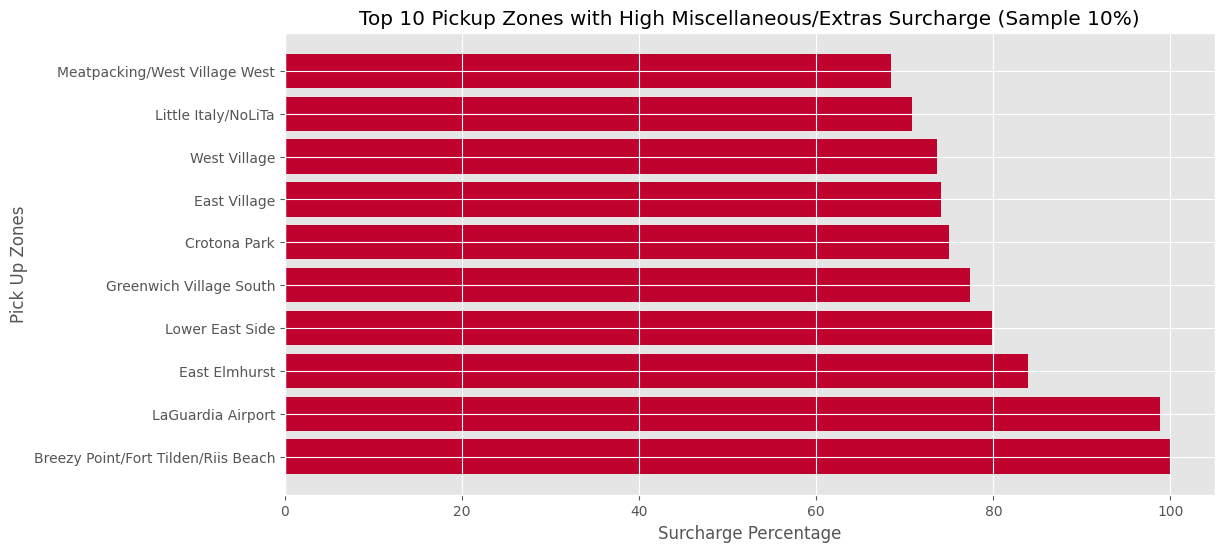

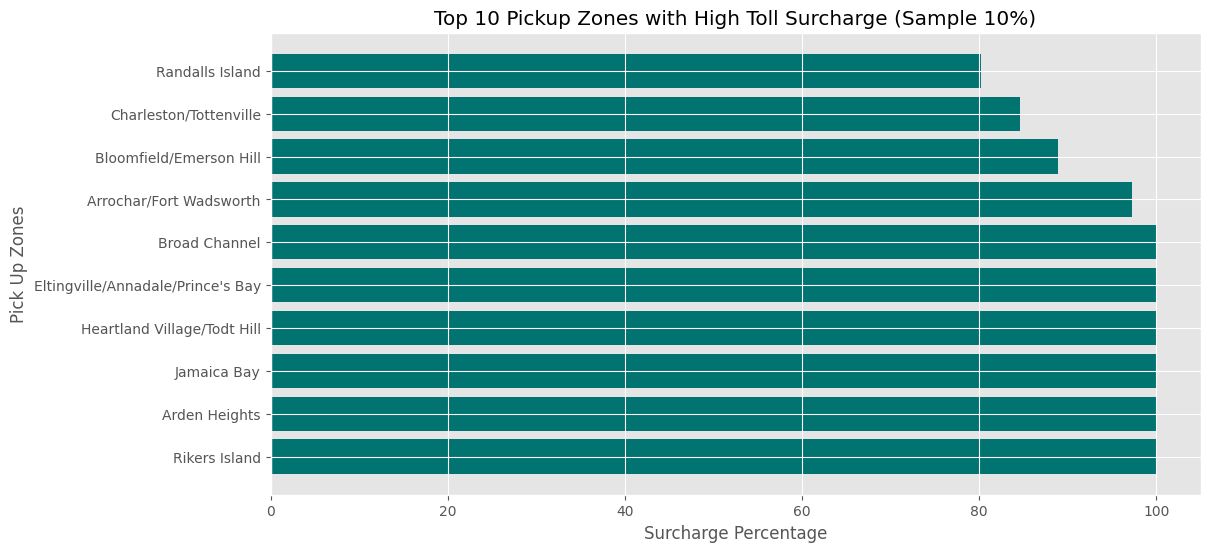

In [306]:
# Top 10 Pickup Zones with High Miscellaneous/Extras Surcharge Frequency

pickup_top_10_extra_surcharge = pickup_zone_surcharge_frequency ["Miscellaneous/Extras"].sort_values(ascending=False)[:10]

plt.figure (figsize=(12,6))
plt.barh(
    pickup_top_10_extra_surcharge.index, 
    pickup_top_10_extra_surcharge.values,
    height = 0.8,
    zorder = 0,
    color = "xkcd:lipstick red"
)
plt.title ("Top 10 Pickup Zones with High Miscellaneous/Extras Surcharge (Sample 10%)")
plt.xlabel("Surcharge Percentage")
plt.ticklabel_format(style= "plain", axis="x")
plt.ylabel("Pick Up Zones")
plt.show()

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Top 10 Pickup Zones with High Congestion Surcharge Frequency

pickup_top_10_toll_surcharge = pickup_zone_surcharge_frequency["TollAmount"].sort_values(ascending=False)[:10]

plt.figure (figsize=(12,6))
plt.barh(
    pickup_top_10_toll_surcharge.index, 
    pickup_top_10_toll_surcharge.values,
    height = 0.8,
    zorder = 0,
    color = "xkcd:dark aquamarine"
)
plt.title ("Top 10 Pickup Zones with High Toll Surcharge (Sample 10%)")
plt.xlabel("Surcharge Percentage")
plt.ticklabel_format(style= "plain", axis="x")
plt.ylabel("Pick Up Zones")
plt.show()


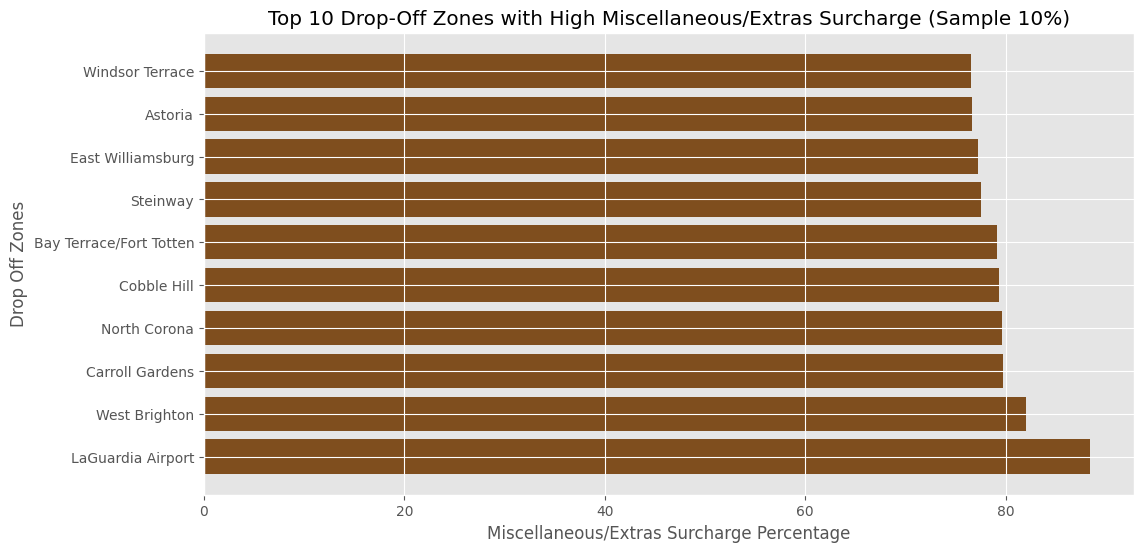

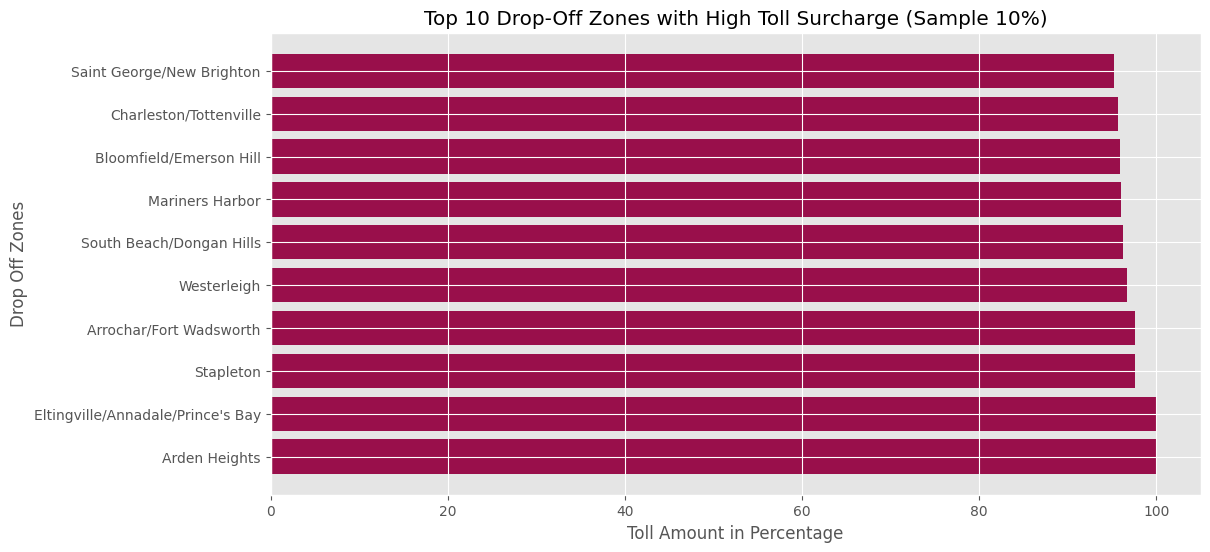

In [307]:
# Top 10 Drop Off Zones with High Miscellaneous/Extras Surcharge Frequency

dropoff_top_10_extra_surcharge = dropoff_zone_surcharge_frequency ["Miscellaneous/Extras"].sort_values(ascending=False)[:10]

plt.figure (figsize=(12,6))
plt.barh(
    dropoff_top_10_extra_surcharge.index, 
    dropoff_top_10_extra_surcharge.values,
    height = 0.8,
    zorder = 0,
    color = "xkcd:milk chocolate"
)
plt.title ("Top 10 Drop-Off Zones with High Miscellaneous/Extras Surcharge (Sample 10%)")
plt.xlabel("Miscellaneous/Extras Surcharge Percentage")
plt.ticklabel_format(style= "plain", axis="x")
plt.ylabel("Drop Off Zones")
plt.show()

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Top 10 Drop Off Zones with High Congestion Surcharge Frequency

dropoff_top_10_toll_surcharge = dropoff_zone_surcharge_frequency ["TollAmount"].sort_values(ascending=False)[:10]

plt.figure (figsize=(12,6))
plt.barh(
    dropoff_top_10_toll_surcharge.index, 
    dropoff_top_10_toll_surcharge.values,
    height = 0.8,
    zorder = 0,
    color = "xkcd:berry"
)
plt.title ("Top 10 Drop-Off Zones with High Toll Surcharge (Sample 10%)")
plt.xlabel("Toll Amount in Percentage")
plt.ticklabel_format(style= "plain", axis="x")
plt.ylabel("Drop Off Zones")
plt.show()


---

### Extra Analysis :

In [308]:
# List of columns which are (In Monetary Value)
amount_cols = ["FareAmount", "Miscellaneous/Extras", "TaxOnMeter", "TipAmount", "TollAmount", "ImprovementSurcharge", "TotalAmount", "CongestionSurcharge", "Airport Fee"]


In [309]:
# Dropping unnecessary column
df_abnormality.drop (columns= "Total Amount Recalculated", inplace=True)


In [310]:
# Let's view the columns
df_abnormality.columns


Index(['VendorID', 'PickupDateTime', 'DropoffDateTime', 'PassengerCount',
       'TripDistance', 'RateCodeID-EndofTrip', 'PULocationID', 'DOLocationID',
       'PaymentType', 'FareAmount', 'Miscellaneous/Extras', 'TaxOnMeter',
       'TipAmount', 'TollAmount', 'ImprovementSurcharge', 'TotalAmount',
       'CongestionSurcharge', 'Airport Fee'],
      dtype='object')

In [311]:
# Deriving Columns for our anomalies data frame.
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Negative Amount
df_abnormality ["Negative_Amount"] = (df_abnormality [amount_cols] < 0).any(axis=1)

# Passenger Count Zero
df_abnormality ["Passenger_Count_is_Zero"] = df_abnormality ["PassengerCount"] == 0

# Passenger Count Greater Than 6
df_abnormality ["Passenger_Count_Greater_Than_Six"] = df_abnormality ["PassengerCount"] > 6

# Not Present in Data Dictionary (Invalid Vendor)
df_abnormality ["Invalid_Vendor_ID"] = ~df_abnormality ["VendorID"].isin([1,2])

# Trip Distance (Too High or Too Low)
df_abnormality ["Trip_Distance_Too_High_Too_Low"] = (df_abnormality ["TripDistance"] == 0) | (df_abnormality ["TripDistance"] > 250)

# Invalid Location IDs [57, 105, 264, 265], not present in shape file
df_abnormality ["Invalid_Location_IDs"] = df_abnormality["PULocationID"].isin([57, 105, 264, 265]) | df_abnormality["DOLocationID"].isin([57, 105, 264, 265]) 

# Pickup Year is not 2023
df_abnormality ["PickUp_Year_Not_2023"] = df_abnormality ["PickupDateTime"].dt.year != 2023

# MTA Tax 0.5$ not triggered
df_abnormality ["MTA_Tax_Not_Present"] = df_abnormality ["TaxOnMeter"] != 0.5

# Improvement Surcharge not $0.3 or $1.0
df_abnormality ["Incorrect_Improvement_Surcharge"] = ~df_abnormality ["ImprovementSurcharge"].isin([0.3,1.0])

# Tip Amount greater than Fare Amount
df_abnormality ["TipAmount_Greater_Than_FareAmount"] = df_abnormality ["TipAmount"] > df_abnormality ["FareAmount"]

# Airport Fee Applied to Non Airport Zones
df_abnormality ["Airport_Fee_Applied_To_Non_AirportZones"] = ~(df_abnormality["PULocationID"].isin([132,138])) & (df_abnormality["Airport Fee"] != 0)


In [312]:
# Anomalies / Abnormality Count
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
for cols in df_abnormality.columns [18:]:
    abnormal_counts = df_abnormality [cols].sum()
    print (f"Column Name : {cols} was present in {abnormal_counts:,} Trips. (In Our Sample Data 10%)")
    print ()
    

Column Name : Negative_Amount was present in 192 Trips. (In Our Sample Data 10%)

Column Name : Passenger_Count_is_Zero was present in 59,469 Trips. (In Our Sample Data 10%)

Column Name : Passenger_Count_Greater_Than_Six was present in 42 Trips. (In Our Sample Data 10%)

Column Name : Invalid_Vendor_ID was present in 884 Trips. (In Our Sample Data 10%)

Column Name : Trip_Distance_Too_High_Too_Low was present in 75,014 Trips. (In Our Sample Data 10%)

Column Name : Invalid_Location_IDs was present in 62,772 Trips. (In Our Sample Data 10%)

Column Name : PickUp_Year_Not_2023 was present in 10 Trips. (In Our Sample Data 10%)

Column Name : MTA_Tax_Not_Present was present in 36,109 Trips. (In Our Sample Data 10%)

Column Name : Incorrect_Improvement_Surcharge was present in 1,930 Trips. (In Our Sample Data 10%)

Column Name : TipAmount_Greater_Than_FareAmount was present in 4,926 Trips. (In Our Sample Data 10%)

Column Name : Airport_Fee_Applied_To_Non_AirportZones was present in 137 Tri

---

## **4** Conclusion

### **4.1** Final Insights and Recommendations

#### **4.1.1** Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

- `Forecasting of the demand pattern` could lead to better dispatching and use of resources.

- `Incentives` to drivers complete trips in Higher Demand and Slower Routes. Drivers who work during peak hours or week-offs should be given an incentive. `Bonuses and Incentives` for drivers who meet the demand at zones with a higher demand.

- `Avoid over supplying drivers` to routes with lower demand and higher traffic.

- `Zone-wise targeting and transportation planning and dispatch` based on our pickups and drop-offs ratio analysis. A higher ratio indicates that a zone has more pickups than drop-offs while a low ratio indicates the opposite.

- `Nightlife`: Based on our analysis, dispatching driver's to zones where the nightlife is higher compared to other zones.

- `Long-term resource management` strategies can be implemented on the basis of the Monthly trends.

- `Tracking Idle Time of Drivers` Analyzing this metric if more information was provided could help us draw more insights into operational inefficiencies.

- `Vendors can make deals with companies to provide transport`. Since, Evening Commute time is likely to be associated with office staff.

- `Seasonal Dispatch / Monthly Dispatch` to meet the months with higher demand, we can ensure that drivers are available.

#### **4.1.2** Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

- Our staffing / dispatching model should be focused on `deploying drivers during peak hours, peak days and peak months`.

- `Airport Zones` were identified as a major source of revenue, and it is a high in demand zone for pick-ups. Airport Fees are levied as well.

- Presence of Midtown Center, Midtown East, Murray Hill, Upper East Side North, Upper East Side South appear in both Pickup and Drop Top 10 High Demand Zones. Indicating the need for `strategic dispatchment of taxis in these areas`.

- `Strategic Planning based on Plots` : The high demand zone has a unique hourly trend which must be taken into account. The demand is usually from 6AM to 6PM but the demand need varies across zones.

- `Slower Routes but High Demand` : Penn Station/Madison Sq West, Times Sq/Theatre District, Midtown Center appear in the Top 10 Pickup Zones however, we must take into account that these are slower routes while planning a strategy.

- `Night-Time Analysis` : This kind of analysis is useful to strategically place driver’s in zone’s with strong nightlife. Surge Prices / Nighttime charges could be applied at these zones.

- `Driver Recruiting and Training and Vehicle Maintenance` can be done during months like February and August when the demand is low.

- `Utilizing Pickup and Drop-off Ratio Analysis for Strategic Positioning of Cabs` : The zones which have a higher ratio are high demand zones and the ones with a lower ratio are lower demand zones. A higher ratio also indicates that a zone has more pickups than drop-offs while a low ratio indicates the opposite.

#### **4.1.3** Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

- `Dynamic Pricing Model` can be introduced on the basis of frequent occuring tolls and miscellaneous surcharge.

- `Short Distance Trips` attract a base fare, focusing on these trips can drive revenue significantly. Our reports suggest that Short distance trips are more profitable than medium and long-distance trips.

- From a business point of view, we have an option to `adapt VeriFone Inc. pricing model`. An alternative way would be to `use a more competitive rate` to attract customers who care about their spending habit.

- `Focus on Quarter 2 and Quarter 4`, these are the months that generate the maximum revenue. Planning should be done accordingly.

- We could use a `competitive marketing strategy by promoting group rides` without any extra fees or strings attached. Or we could `implement a small surcharge on group rides` to increase the revenue from our trip without impacting the customers.

- `Reducing the staff` when the demand is low will save us on operational costs which in short leads to better `revenue management`.

- `Surge Prices / Night-time charges` could be applied to zones with a higher nightlife.

- `Surge Pricing` could be implemented on Slow Routes having Higher Demand. To meet the demand.

- `Based on our hourly analysis :` companies can leverage this information and `adjust fare prices` based on the hour of the day. It can be used to identify new opportunities which would lead to maximizing revenue.

- `Targeted marketing` promotions can be done for the low demand months or seasons with the intention of maximizing revenue.

- We could make an informed decision regarding the `Congestion Pricing Strategy` as per the congestion prone zones with higher demand.

---

### Author : Russel Anthony Reynold Chandanshiv

---